<a href="https://colab.research.google.com/github/lniles216/shared_portfolio/blob/main/RIC_Research_PPPLoans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hypothesis:** The objective of this project is to understand what lead to some of the gaps is allocated funding for individual businesses of color, as well as, LLC and Sole Proritiers who operate within communities of color, which saw a large reduction in revenues during the pandemic. Based on the analysis conduted I should be able to understand if there was a difference in allocated funding of businesses with similar revenue and industry types. Treatments will be proximity to the banking intitution, the type of banking institution that they applied through, the total number of district banks in the area, and the demographics of the census tracts.

The interaction Affect Between CDFI and Main Branch within communities of color.




* **Objectives:**
    + Review the districts with high concentrations of people of color and evaluate how many PPP loans went to businesses in these areas
    + Determine if black and minority ownered businesses in the same industry had faster access to capital if they worked with CDFIs
    + Conduct a spatial analysis to determine how the proximity to banks impacted the relationships for Small Business Owners and their ability to access
    + Conduct a spatial analysis to determine how the proximity to banks impacted the relationships for Small Business Owners and their ability to access
    Evaluating whether the business get an approved loan (yes or no)


* **Datasets (5 total):**
    + Dateframe: total number of businesses, total number of businesses by race category, and total number of businesses by business type category (csv)
    + Total banks by zipcode, sub categories of CDFI, Non-CDFI, and top five banks with the most branches in NYC, and potentially the 5 banks with the lowest number of branches across by zipcode. (shapefile)
    + Dateframe: Percentage of banks to recieve a PPP loan per zipcode by categories listed above (Shapefile)

* **Process:**
    + Import data from a variety of sources
    + Data cleaning and conversion to necessary types
    + Regroup data to develp a dataframe with the necessary inforamtion
    + Merge non-spatial data with spatial data.
    + Geospatial data visulization.
    + Conduct correlation and regression analysis of consolidated variables
    + Conduct PCA testing to determine leading variables
    + Develop regression coefficient to predict potential utilization, especially by caregivers
    + Use predicted values to categorize UPZs into high, medium, and low benefit based on quartiles of leading variables
    + Develop clusters for the high, medium, and low areas
    + Select top 45 clusters
    + Review census blocks in those areas to develop demographic profile
    + Create female population density per block

* **Database Links:**
    + https://www.census.gov/data/datasets.html
    https://www.census.gov/programs-surveys/abs.html
    https://www.census.gov/programs-surveys/susb/data/datasets.html
    https://advocacy.sba.gov/wp-content/uploads/2022/08/Small-Business-Economic-Profile-NY.pdf
    https://data.sba.gov/dataset/covid-19-eidl-advance
    https://data.sba.gov/dataset/covid-19-eidl
    https://www.fdic.gov/news/financial-institution-letters/2022/fil22025.html
    https://data.sba.gov/dataset/ppp-foia
    https://www.sba.gov/funding-programs/loans/covid-19-relief-options/paycheck-protection-program/ppp-data#section-header-2
    https://www.sba.gov/funding-programs/loans/covid-19-relief-options/paycheck-protection-program/ppp-data#section-header-6
    https://www.sba.gov/article/2021/mar/09/fact-sheet-changes-paycheck-protection-program-biden-harris-administration-increase-equitable-access
    https://www.sba.gov/funding-programs/loans/covid-19-relief-options/paycheck-protection-program/second-draw-ppp-loan
    https://www.sba.gov/document/report-sba-covid-relief-program-report
    https://www.sba.gov/article/2021/mar/09/fact-sheet-changes-paycheck-protection-program-biden-harris-administration-increase-equitable-access


##Installing packages

In [ ]:
%%time
!pip install --upgrade geopandas
!pip install mapclassify --quiet
# Install rtree - Geopandas requirment
!apt install libspatialindex-dev
!pip install rtree
# Install descartes - Geopandas requirment
!pip install descartes
!pip install geopy
!pip install pygeos
!pip install contextily

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
CPU times: user 796 ms, sys: 131 ms, total: 927 ms
Wall time: 1min 10s


In [ ]:
#include packages
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt
import os
import statsmodels.formula.api as smf
import urllib.request
import rtree
import pygeos
import geopy
import statsmodels.formula.api as smf    # for OLS regression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
import urllib

from sklearn import tree
from sklearn import datasets
from sklearn.datasets import make_moons ## sklearn functions for synthetic data
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA  ## sklearn PCA classes
from sklearn.decomposition import KernelPCA
from sklearn import linear_model    ## sklearn linear model
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier ## sklearn decision trees
from sklearn.ensemble import RandomForestClassifier ## sklearn random forests
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%pylab inline

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#include the distributions
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto
import statsmodels.formula.api as smf


##Overview

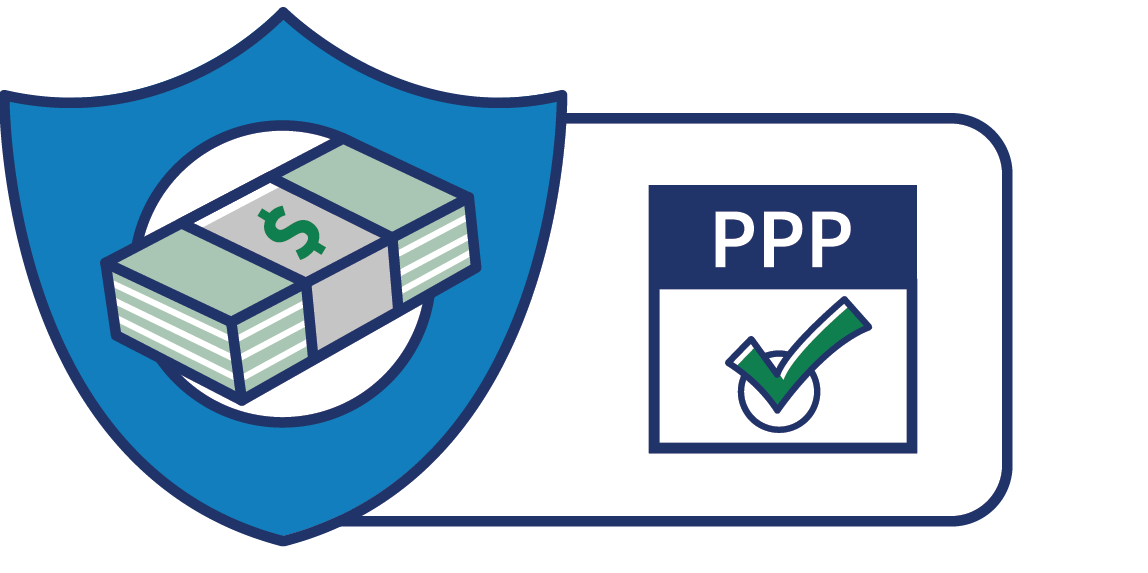

In [ ]:
from IPython.display import Image

from io import BytesIO
url_image = 'https://www.sba.gov/sites/default/files/2020-04/CON-SBA_Pandemic_Icon-Left-Aligned-09.png'

Image(urllib.request.urlopen(url_image).read())

## Data Download & Pre-processing

####NYC Zipcodes

In [ ]:
manhattan_zipcodes = [
    '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010',
    '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020',
    '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029',
    '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038',
    '10039', '10040', '10044', '10065', '10069', '10075', '10103', '10110', '10111',
    '10112', '10115', '10119', '10128', '10152', '10153', '10154', '10162', '10165',
    '10167', '10168', '10169', '10170', '10171', '10172', '10173', '10174', '10177',
    '10199', '10271', '10278', '10279', '10280', '10282'
]

bronx_zipcodes = [
    '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459',
    '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468',
    '10469', '10470', '10471', '10472', '10473', '10474', '10475'
]

brooklyn_zipcodes = [
    '11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210',
    '11211', '11212', '11213', '11214', '11215', '11216', '11217', '11218', '11219',
    '11220', '11221', '11222', '11223', '11224', '11225', '11226', '11228', '11229',
    '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11237', '11238',
    '11239'
]

queens_zipcodes = [
    '11001', '11004', '11005', '11101', '11102', '11103', '11104', '11105', '11106',
    '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11361', '11362',
    '11363', '11364', '11365', '11366', '11367', '11368', '11369', '11370', '11371',
    '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385', '11411',
    '11412', '11413', '11414', '11415', '11416', '11417', '11418', '11419', '11420',
    '11421', '11422', '11423', '11426', '11427', '11428', '11429', '11430', '11432',
    '11433', '11434', '11435', '11436', '11691', '11692', '11693', '11694', '11697'
]

staten_island_zipcodes = [
    '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309',
    '10310', '10312', '10314'
]

# Combine all the boroughs' zipcodes into one list
nyc_zipcodes = manhattan_zipcodes + bronx_zipcodes + brooklyn_zipcodes + queens_zipcodes + staten_island_zipcodes

In [ ]:
majority_minority_zips = ['10001', '10002', '10003', '10005', '10006', '10007', '10009', '10011', '10013',
                          '10016', '10018', '10022', '10023', '10025', '10027', '10029', '10032', '10036',
                          '10038', '10040', '10306', '10451', '10452', '10453', '10454', '10455', '10456',
                          '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466',
                          '10467', '10468', '10469', '10471', '10475', '11101', '11201', '11203', '11212',
                          '11224', '11226', '11354', '11368', '11372', '11375', '11418', '11419', '11420',
                          '11427', '11432', '11434', '11798']

In [ ]:
less_than_25perc_minority_zips = ['10004', '10010', '10012', '10014', '10017', '10019', '10020', '10021',
                                  '10024', '10026', '10028', '10030', '10031', '10033', '10034', '10035',
                                  '10037', '10039', '10044', '10045', '10065', '10115', '10119', '10128',
                                  '10154', '10278', '10280', '10301', '10302', '10303', '10304', '10305',
                                  '10307', '10309', '10310', '10312', '10314', '10457', '10472', '10473',
                                  '10474', '10514', '10543', '10553', '10573', '10701', '10705', '10911',
                                  '10965', '10977', '11001', '11021', '11050', '11102', '11103', '11104',
                                  '11105', '11106', '11111', '11112', '11202', '11204', '11205', '11206',
                                  '11207', '11208', '11209', '11210', '11211', '11213', '11215', '11216',
                                  '11217', '11218', '11219', '11221', '11222', '11223', '11225', '11228',
                                  '11229', '11230', '11231', '11232', '11237', '11238', '11239', '11252',
                                  '11355', '11356', '11357', '11358', '11360', '11361', '11362', '11364',
                                  '11365', '11366', '11367', '11369', '11370', '11371', '11373', '11377',
                                  '11378', '11379', '11385', '11411', '11412', '11413', '11414', '11415',
                                  '11416', '11417', '11421', '11422', '11423', '11424', '11425', '11426',
                                  '11428', '11429', '11430', '11431', '11433', '11435', '11436', '11439',
                                  '11451', '11471', '11548', '11566', '11577', '11580', '11598', '11629',
                                  '11691', '11692', '11693', '11694', '11695', '11731', '11968', '12423',
                                  '12428', '12435', '12458', '12466', '12473', '12528', '12701', '12733',
                                  '12734', '12737', '12750', '12751', '12754', '12758', '12759', '12763',
                                  '12764', '12768', '12779', '12783', '12786', '12788', '12789', '13731',
                                  '16091', '20459']

In [ ]:
majority_immigrantpop = ['10001', '10002', '10003', '10005', '10006', '10007', '10009', '10011', '10013', '10016', '10018',
                         '10022', '10023', '10024', '10025', '10027', '10029', '10032', '10036', '10038', '10040', '10306',
                         '10451', '10452', '10453', '10454', '10455', '10456', '10458', '10459', '10460', '10461', '10462',
                         '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10471', '10475', '11101', '11201',
                         '11203', '11204', '11205', '11206', '11210', '11211', '11212', '11213', '11214', '11218', '11219',
                         '11220', '11223', '11224', '11225', '11226', '11229', '11230', '11233', '11234', '11235', '11236',
                         '11354', '11368', '11372', '11373', '11374', '11375', '11415', '11418', '11419', '11420', '11427',
                         '11432', '11434', '11510', '11691', '11798', '12423', '12428', '12435', '12466', '12528', '12701',
                         '12733', '12734', '12737', '12750', '12751', '12754', '12758', '12759', '12763', '12764', '12768',
                         '12779', '12783', '12786', '12788', '12789', '13731']

In [ ]:
zips_demographics_high_Hispanic_BLK = ['10001', '10006', '10016', '10023', '10025', '10029', '10032', '10040', '10451', '10452',
 '10453', '10454', '10455', '10458', '10459', '10460', '10461', '10462', '10463', '10464',
 '10465', '10466', '10467', '10468', '10469', '10471', '10475', '11212', '11224', '11226',
 '11372', '11375', '11419', '11427', '11434', '11798']

In [ ]:
less_than_25perc_Hispanic_BLK_zips = ['10002', '10003', '10004', '10007', '10009', '10010', '10012', '10013', '10014', '10017', '10018', '10019',
                                      '10020', '10021', '10022', '10024', '10026', '10028', '10030', '10031', '10033', '10034', '10035', '10037',
                                      '10039', '10044', '10045', '10065', '10115', '10119', '10128', '10154', '10278', '10280', '10301', '10302',
                                      '10303', '10304', '10305', '10306', '10307', '10309', '10310', '10312', '10314', '10457', '10472', '10473',
                                      '10474', '10514', '10543', '10553', '10573', '10701', '10705', '10911', '10965', '10977', '11001', '11021',
                                      '11050', '11101', '11102', '11103', '11104', '11105', '11106', '11111', '11112', '11202', '11204', '11205',
                                      '11206', '11207', '11208', '11209', '11210', '11211', '11213', '11214', '11215', '11216', '11217', '11218',
                                      '11219', '11220', '11221', '11222', '11223', '11225', '11228', '11229', '11230', '11231', '11232', '11235',
                                      '11237', '11238', '11239', '11252', '11355', '11356', '11357', '11358', '11360', '11361', '11362', '11364',
                                      '11365', '11366', '11367', '11369', '11370', '11371', '11373', '11377', '11378', '11379', '11385', '11411',
                                      '11412', '11413', '11414', '11415', '11416', '11417', '11421', '11422', '11423', '11424', '11425', '11426',
                                      '11428', '11429', '11430', '11431', '11433', '11435', '11436', '11439', '11451', '11471', '11548', '11566',
                                      '11577', '11580', '11598', '11629', '11691', '11692', '11693', '11694', '11695', '11731', '11968', '12423',
                                      '12428', '12435', '12458', '12466', '12473', '12528', '12701', '12733', '12734', '12737', '12750', '12751',
                                      '12754', '12758', '12759', '12763', '12764', '12768', '12779', '12783', '12786', '12788', '12789', '13731',
                                      '16091', '20459']

###Data Download and Cleaning

####Upload Data from Computer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving zbp21detail.txt to zbp21detail (1).txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NY_2022_Data.csv to NY_2022_Data (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CDFI_Cert_List_11-14-2022_Final.xlsx to CDFI_Cert_List_11-14-2022_Final (1).xlsx


#### CDFIs

In [ ]:
cdfis = pd.read_excel('CDFI_Cert_List_11-14-2022_Final.xlsx')

In [ ]:
cdfis = cdfis.iloc[5:]
cdfis.columns = cdfis.iloc[0]
cdfis = cdfis.iloc[1:]
cdfis = cdfis.reset_index(drop=True)

In [ ]:
#cdfis.columns

In [ ]:
#print(cdfis['Native CDFI (Y/N)'].value_counts().to_string())

In [ ]:
keep1 = ['Organization Name', 'Financial Institution Type','City','State','Zipcode', 'Address']

In [ ]:
cdfis = cdfis[keep1]

In [ ]:
cdfis['Zipcode'] = cdfis['Zipcode'].str[:5]
cdfis = cdfis.loc[cdfis['Zipcode'].isin(nyc_zipcodes)]

In [ ]:
cdfis_total_byzip = cdfis.groupby(['Zipcode'], as_index= False).agg({'State': 'count'})
cdfis_total_byzip['Zipcode'] = cdfis_total_byzip['Zipcode'].astype(int)

In [ ]:
cdfis_total_byzip = cdfis_total_byzip.rename(columns={'State': 'Total_CDFIs'})
cdfis_total_byzip = cdfis_total_byzip.rename(index=str, columns={'Zipcode':'ZipCode'})

In [ ]:
mlist = cdfis['Organization Name'].unique().tolist()
pt = '.*?({}).*?'.format('|'.join(mlist))

In [ ]:
mlist

['1199 SEIU FCU',
 'AAFE Community Development Fund',
 'Abyssinian Baptist Church Federal Credit Union',
 'Accompany Capital, Inc.',
 'Ascendus Inc.',
 'BOC Capital Corp.',
 'Brooklyn Cooperative Federal Credit Union',
 'BUSINESS RESOURCE AND INVESTMENT SERVICE CENTER, INC.',
 'CAMBA Economic Development Corporation',
 'Carver Federal Savings Bank',
 'CheckSpring Community Corporation',
 'Community Development Trust, LP, The',
 'Community Development Venture Capital Alliance, The',
 'Community Preservation Corporation',
 'Concord Federal Credit Union',
 'Corporation for Supportive Housing',
 'Credit, Inc.',
 'Entertainment Industries FCU',
 'Fidelis Federal Credit Union',
 'Finest Federal Credit Union, The',
 'Grameen America, Inc.',
 'Greater Jamaica Local Development Company, Inc.',
 'Habitat for Humanity NYC Fund, Inc.',
 'Harlem Entrepreneurial Fund, LLC',
 'Homeownership Lending LLC',
 'Inclusiv Inc',
 "IRC's Center For Economic Opportunity, Inc. (CEO)",
 'Local Initiatives Suppor

####Branch Banks

In [ ]:
branch_dataNY = pd.read_csv('NY_2022_Data.csv')

In [ ]:
branch_dataNY['ZIPBR'] = branch_dataNY['ZIPBR'].astype(str).replace('\.0', '', regex=True)
branch_dataNY = branch_dataNY.loc[branch_dataNY['ZIPBR'].isin(nyc_zipcodes)]

In [ ]:
branch_dataNY

CERT                                 NAMEFULL  BRNUM  \
37      588  Manufacturers and Traders Trust Company   78.0   
90      588  Manufacturers and Traders Trust Company  239.0   
92      588  Manufacturers and Traders Trust Company  241.0   
93      588  Manufacturers and Traders Trust Company  242.0   
94      588  Manufacturers and Traders Trust Company  243.0   
...     ...                                      ...    ...   
4263  59017                      First Republic Bank   87.0   
4264  59017                      First Republic Bank   90.0   
4266  59113                   Grasshopper Bank, N.A.    0.0   
4268  59154                            Piermont Bank    0.0   
4269  91325              Cibc National Trust Company   12.0   

                                    ADDRESBR   CITY2BR  \
37                350 Park Avenue, 6th Floor  New York   
90                      2664 Atlantic Avenue  Brooklyn   
92                      401 East 55th Street  New York   
93                          397 First Avenue  New York   
94                       11 West 42nd Street  New York   
...                                      ...       ...   
4263                        163 Canal Street  New York   
4264                            420 10th Ave  New York   
4266                 915 Broadway, 7th Floor  New York   
4268                4 Bryant Park, 3rd Floor  New York   
4269  1177 Avenue Of The Americas 42nd Floor  New York   

                          CSANAMBR  CSABR  CNTYNAMB   DEPSUMBR  SIMS_LATITUDE  \
37    New York-Newark, NY-NJ-CT-PA  408.0  New York  2937958.0      40.758171   
90    New York-Newark, NY-NJ-CT-PA  408.0     Kings    80805.0      40.675390   
92    New York-Newark, NY-NJ-CT-PA  408.0  New York    77778.0      40.757023   
93    New York-Newark, NY-NJ-CT-PA  408.0  New York   105453.0      40.737455   
94    New York-Newark, NY-NJ-CT-PA  408.0  New York    96217.0      40.754007   
...                            ...    ...       ...        ...            ...   
4263  New York-Newark, NY-NJ-CT-PA  408.0  New York   168425.0      40.716482   
4264  New York-Newark, NY-NJ-CT-PA  408.0  New York   388567.0      40.754332   
4266  New York-Newark, NY-NJ-CT-PA  408.0  New York   411545.0      40.739714   
4268  New York-Newark, NY-NJ-CT-PA  408.0  New York   370057.0      40.754136   
4269  New York-Newark, NY-NJ-CT-PA  408.0  New York        0.0      40.757277   

      SIMS_LONGITUDE  STNAMEBR  ZIPBR  
37        -73.973397  New York  10022  
90        -73.895991  New York  11207  
92        -73.963764  New York  10022  
93        -73.978237  New York  10010  
94        -73.982137  New York  10036  
...              ...       ...    ...  
4263      -73.996743  New York  10013  
4264      -73.999259  New York  10001  
4266      -73.989658  New York  10010  
4268      -73.984857  New York  10018  
4269      -73.982384  New York  10036  

[1487 rows x 13 columns]

In [ ]:
branch_dataNY_byzip_name = branch_dataNY.groupby(['ZIPBR','NAMEFULL'], as_index= False).agg({'STNAMEBR': 'count'})
branch_dataNY_byzip = branch_dataNY.groupby(['ZIPBR'], as_index= False).agg({'STNAMEBR': 'count'})
branch_dataNY_by_name_zip = branch_dataNY.groupby(['NAMEFULL','ZIPBR'], as_index= False).agg({'STNAMEBR': 'count'})
branch_dataNY_by_name = branch_dataNY.groupby(['NAMEFULL'], as_index= False).agg({'STNAMEBR': 'count'})

In [ ]:
branch_dataNY_byzip_name['ZIPBR'] = branch_dataNY_byzip_name['ZIPBR'].astype(int)
branch_dataNY_byzip['ZIPBR'] = branch_dataNY_byzip['ZIPBR'].astype(int)
branch_dataNY_by_name_zip['ZIPBR'] = branch_dataNY_by_name_zip['ZIPBR'].astype(int)

In [ ]:
branch_dataNY_byzip = branch_dataNY_byzip.rename(columns={'STNAMEBR': 'Total_Bank_Branches'})

In [ ]:
branch_dataNY_byzip = branch_dataNY_byzip.rename(columns={'ZIPBR': 'ZipCode'})

In [ ]:
branch_dataNY_by_name

NAMEFULL  STNAMEBR
0               Abacus Federal Savings Bank         4
1                                 Alma Bank         9
2                       Alpine Capital Bank         1
3                          Amalgamated Bank         4
4                             Amerasia Bank         3
..                                      ...       ...
100                    Valley National Bank        27
101      Webster Bank, National Association        22
102  Wells Fargo Bank, National Association        29
103  Wilmington Trust, National Association         2
104                      Woori America Bank         5

[105 rows x 2 columns]

In [ ]:
branches_in_majority_minority_zips = branch_dataNY.loc[branch_dataNY['ZIPBR'].isin(majority_minority_zips)]

In [ ]:
branches_in_majority_minority_zips

CERT                                 NAMEFULL  BRNUM  \
37      588  Manufacturers and Traders Trust Company   78.0   
92      588  Manufacturers and Traders Trust Company  241.0   
94      588  Manufacturers and Traders Trust Company  243.0   
96      588  Manufacturers and Traders Trust Company  245.0   
98      588  Manufacturers and Traders Trust Company  248.0   
...     ...                                      ...    ...   
4262  59017                      First Republic Bank   80.0   
4263  59017                      First Republic Bank   87.0   
4264  59017                      First Republic Bank   90.0   
4268  59154                            Piermont Bank    0.0   
4269  91325              Cibc National Trust Company   12.0   

                                    ADDRESBR       CITY2BR  \
37                350 Park Avenue, 6th Floor      New York   
92                      401 East 55th Street      New York   
94                       11 West 42nd Street      New York   
96                     470 Park Avenue South      New York   
98                   101-25 Queens Boulevard  Forest Hills   
...                                      ...           ...   
4262                            225 Broadway      New York   
4263                        163 Canal Street      New York   
4264                            420 10th Ave      New York   
4268                4 Bryant Park, 3rd Floor      New York   
4269  1177 Avenue Of The Americas 42nd Floor      New York   

                          CSANAMBR  CSABR  CNTYNAMB   DEPSUMBR  SIMS_LATITUDE  \
37    New York-Newark, NY-NJ-CT-PA  408.0  New York  2937958.0      40.758171   
92    New York-Newark, NY-NJ-CT-PA  408.0  New York    77778.0      40.757023   
94    New York-Newark, NY-NJ-CT-PA  408.0  New York    96217.0      40.754007   
96    New York-Newark, NY-NJ-CT-PA  408.0  New York    65076.0      40.745672   
98    New York-Newark, NY-NJ-CT-PA  408.0    Queens    60398.0      40.720668   
...                            ...    ...       ...        ...            ...   
4262  New York-Newark, NY-NJ-CT-PA  408.0  New York   329437.0      40.711819   
4263  New York-Newark, NY-NJ-CT-PA  408.0  New York   168425.0      40.716482   
4264  New York-Newark, NY-NJ-CT-PA  408.0  New York   388567.0      40.754332   
4268  New York-Newark, NY-NJ-CT-PA  408.0  New York   370057.0      40.754136   
4269  New York-Newark, NY-NJ-CT-PA  408.0  New York        0.0      40.757277   

      SIMS_LONGITUDE  STNAMEBR  ZIPBR  
37        -73.973397  New York  10022  
92        -73.963764  New York  10022  
94        -73.982137  New York  10036  
96        -73.982602  New York  10016  
98        -73.846326  New York  11375  
...              ...       ...    ...  
4262      -74.008276  New York  10007  
4263      -73.996743  New York  10013  
4264      -73.999259  New York  10001  
4268      -73.984857  New York  10018  
4269      -73.982384  New York  10036  

[630 rows x 13 columns]

In [ ]:
branches_in_majority_HIS_BLK_zips = branch_dataNY.loc[branch_dataNY['ZIPBR'].isin(zips_demographics_high_Hispanic_BLK)]

In [ ]:
branches_in_majority_HIS_BLK_zips

CERT                                 NAMEFULL   BRNUM  \
96      588  Manufacturers and Traders Trust Company   245.0   
98      588  Manufacturers and Traders Trust Company   248.0   
246     588  Manufacturers and Traders Trust Company  1431.0   
371     622                         Amalgamated Bank     0.0   
372     622                         Amalgamated Bank     2.0   
...     ...                                      ...     ...   
4232  58668                              Spring Bank     0.0   
4235  58675                   Hanover Community Bank     1.0   
4251  58979         Bankunited, National Association   121.0   
4261  59017                      First Republic Bank    76.0   
4264  59017                      First Republic Bank    90.0   

                            ADDRESBR       CITY2BR  \
96             470 Park Avenue South      New York   
98           101-25 Queens Boulevard  Forest Hills   
246             2460 Grand Concourse         Bronx   
371                      275 7th Ave      New York   
372               2067 Bartow Avenue         Bronx   
...                              ...           ...   
4232            69 East 167th Street         Bronx   
4235             71-15 Austin Street  Forest Hills   
4251  960 6th Avenue Of The Americas      New York   
4261           443 Park Avenue South      New York   
4264                    420 10th Ave      New York   

                          CSANAMBR  CSABR  CNTYNAMB   DEPSUMBR  SIMS_LATITUDE  \
96    New York-Newark, NY-NJ-CT-PA  408.0  New York    65076.0      40.745672   
98    New York-Newark, NY-NJ-CT-PA  408.0    Queens    60398.0      40.720668   
246   New York-Newark, NY-NJ-CT-PA  408.0     Bronx    20901.0      40.861393   
371   New York-Newark, NY-NJ-CT-PA  408.0  New York  3756736.0      40.745610   
372   New York-Newark, NY-NJ-CT-PA  408.0     Bronx   190830.0      40.869639   
...                            ...    ...       ...        ...            ...   
4232  New York-Newark, NY-NJ-CT-PA  408.0     Bronx   244459.0      40.835467   
4235  New York-Newark, NY-NJ-CT-PA  408.0    Queens    35362.0      40.719938   
4251  New York-Newark, NY-NJ-CT-PA  408.0  New York   118163.0      40.750480   
4261  New York-Newark, NY-NJ-CT-PA  408.0  New York   470098.0      40.744701   
4264  New York-Newark, NY-NJ-CT-PA  408.0  New York   388567.0      40.754332   

      SIMS_LONGITUDE  STNAMEBR  ZIPBR  
96        -73.982602  New York  10016  
98        -73.846326  New York  11375  
246       -73.897473  New York  10458  
371       -73.994312  New York  10001  
372       -73.828061  New York  10475  
...              ...       ...    ...  
4232      -73.920304  New York  10452  
4235      -73.844071  New York  11375  
4251      -73.986861  New York  10001  
4261      -73.982966  New York  10016  
4264      -73.999259  New York  10001  

[287 rows x 13 columns]

####PPP Loan Information

In [ ]:
public_150k_plus_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/4b3c3e7a-1286-4883-b857-d37058f9693c/download/public_150k_plus_230630.csv')
public_up_to_150k_8_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6ada73a2-8176-4e71-8689-30490d9f8a2f/download/public_up_to_150k_8_230630.csv')
public_up_to_150k_9_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/985f0c28-e799-4940-94a9-96a7c5c604a6/download/public_up_to_150k_9_230630.csv')

In [ ]:
#public_up_to_150k_1_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/137436c9-408e-47e9-a7f3-b9a1871c4e11/download/public_up_to_150k_1_230331.csv')
#public_up_to_150k_2_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/67b6b208-7116-4e8d-9a56-7168b42cda4a/download/public_up_to_150k_2_230331.csv')
#public_up_to_150k_3_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/8765decb-9f66-4d7a-b11f-59c3e57420f7/download/public_up_to_150k_3_230331.csv')

In [ ]:
#public_up_to_150k_4_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/9c90a564-c63f-4796-bd09-b107aa5559f8/download/public_up_to_150k_4_230331.csv')
#public_up_to_150k_5_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/cd2dd797-b78d-40b5-9783-c75afdf140cb/download/public_up_to_150k_5_230331.csv')

In [ ]:
#public_up_to_150k_6_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/61721d18-2116-4d22-9a3c-287f9bcd6a31/download/public_up_to_150k_6_230331.csv')
#public_up_to_150k_7_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6410069a-3b69-4891-8d4d-1b267749b8cd/download/public_up_to_150k_7_230331.csv')

In [ ]:
#public_up_to_150k_10_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/0bad5972-6f71-49b6-913f-f2d80934309f/download/public_up_to_150k_10_230331.csv')
#public_up_to_150k_11_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/cb9b638d-c1dd-4c16-bf42-258b06c52c66/download/public_up_to_150k_11_230331.csv')
#public_up_to_150k_12_230331 = pd.read_csv('https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7371d1ca-57e8-4efb-9993-780cea937449/download/public_up_to_150k_12_230331.csv')

In [ ]:
#len(public_150k_plus_230331)

In [ ]:
#print(public_150k_plus_230331['BorrowerState'].value_counts().to_string())

In [ ]:
#for col in public_up_to_150k_1_230331.columns:
#    print(col)

In [ ]:
#public_up_to_150k_1_230331.dtypes

In [ ]:
#print(public_up_to_150k_8_230331['BorrowerState'].value_counts().to_string())

In [ ]:
frames = [public_up_to_150k_8_230331, public_up_to_150k_9_230331]

In [ ]:
public_up_to_150k_8_9_230331 = pd.concat(frames)

In [ ]:
#print(public_up_to_150k_1_230331['BorrowerState'].value_counts().to_string())

In [ ]:
#public_up_to_150k_NY_230331 = public_up_to_150k_8_9_230331.loc['Kennedy']

In [ ]:
public_up_to_150k_8_9_230331['BorrowerZip'] = public_up_to_150k_8_9_230331['BorrowerZip'].str[:5]
public_150k_plus_230331['BorrowerZip'] = public_150k_plus_230331['BorrowerZip'].str[:5]
public_up_to_150k_8_9_230331['ServicingLenderZip'] = [x[:5] for x in public_up_to_150k_8_9_230331['ServicingLenderZip']]
public_150k_plus_230331['ServicingLenderZip'] = [x[:5] for x in public_150k_plus_230331['ServicingLenderZip']]


In [ ]:
public_up_to_150k_nyc = public_up_to_150k_8_9_230331.loc[public_up_to_150k_8_9_230331['BorrowerZip'].isin(nyc_zipcodes)]
public_150k_plus_nyc = public_150k_plus_230331.loc[public_150k_plus_230331['BorrowerZip'].isin(nyc_zipcodes)]

In [ ]:
keep = ['BorrowerName','NAICSCode', 'FranchiseName','BorrowerAddress', 'BorrowerCity', 'BorrowerState','BorrowerZip',
        'InitialApprovalAmount','LoanNumber', 'CurrentApprovalAmount', 'UndisbursedAmount',
       'ServicingLenderName','ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip',
       'HubzoneIndicator','LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip',
       'JobsReported','Race', 'Ethnicity','Gender', 'Veteran', 'NonProfit','BusinessType',
        'OriginatingLenderLocationID','OriginatingLender', 'OriginatingLenderCity', 'OriginatingLenderState']

In [ ]:
#options = ['NY', 'NJ']
#public_up_to_150k_NY_230331 = public_up_to_150k_8_9_230331.loc[public_up_to_150k_8_9_230331['BorrowerState'].isin(options)]
#public_150k_plus_NY_230331 = public_150k_plus_230331.loc[public_150k_plus_230331['BorrowerState'].isin(options)]

In [ ]:
frames2 = [public_up_to_150k_nyc, public_150k_plus_nyc]

In [ ]:
all_ppp_NYC = pd.concat(frames2)

In [ ]:
del public_up_to_150k_nyc
del public_150k_plus_nyc

In [ ]:
all_ppp_NYC = all_ppp_NYC[keep]

In [ ]:
#all_ppp_NYC

In [ ]:
print(all_ppp_NYC['BorrowerCity'].value_counts().to_string())

Brooklyn                                79085
New York                                78913
Bronx                                   40324
NEW YORK                                39057
BROOKLYN                                23916
Staten Island                            9448
Jamaica                                  8742
Flushing                                 7458
BRONX                                    6842
Astoria                                  5265
STATEN ISLAND                            3563
Woodside                                 3556
FLUSHING                                 3246
Long Island City                         3143
Elmhurst                                 3060
Jackson Heights                          2401
Queens Village                           2139
brooklyn                                 2106
Corona                                   1983
South Richmond Hill                      1946
East Elmhurst                            1862
JAMAICA                           

In [ ]:
all_ppp_NYC['ServicingLenderName'].unique().tolist()

['Cross River Bank',
 'TD Bank, National Association',
 'Square Capital, LLC',
 'JPMorgan Chase Bank, National Association',
 'Loan Source Incorporated',
 'Bank of America, National Association',
 'Signature Bank',
 'Liberty SBF Holdings LLC',
 'Magyar Bank',
 'East West Bank',
 'Haddon Savings Bank',
 'Readycap Lending, LLC',
 'Santander Bank, National Association',
 'Community Federal Savings Bank',
 'Cathay Bank',
 'Ponce Bank',
 'Dime Community Bank',
 'Blue Ridge Bank, National Association',
 'MVB Bank, Inc.',
 'City National Bank',
 'FC Marketplace, LLC (dba Funding Circle)',
 'Newtek Small Business Finance, Inc.',
 'Customers Bank',
 'NewBank',
 'Capital One, National Association',
 'Citibank, N.A.',
 'Shinhan Bank America',
 'WebBank',
 'Flushing Bank',
 'Fed – Kabbage',
 'Harvest Small Business Finance, LLC',
 'Hanover Community Bank',
 'Flagstar Bank National Association',
 'Amalgamated Bank',
 'Lendistry SBLC, LLC',
 'Itria Ventures LLC',
 'Wells Fargo Bank, National Associa

In [ ]:
def categorise(row):
    if row['JobsReported'] > 0 and row['JobsReported'] <= 5:
        return 'j<5'
    elif row['JobsReported'] > 5 and row['JobsReported'] <= 9:
        return 'j5_9'
    elif row['JobsReported'] > 10  and row['JobsReported'] <= 19:
        return 'j10_19'
    elif row['JobsReported'] > 20  and row['JobsReported'] <= 49:
        return 'j20_49'
    elif row['JobsReported'] > 50  and row['JobsReported'] <= 99:
        return 'j50_99'
    elif row['JobsReported'] > 100  and row['JobsReported'] <= 249:
        return 'j100_249'
    elif row['JobsReported'] > 250  and row['JobsReported'] <= 499:
        return 'j250_499'
    elif row['JobsReported'] > 500  and row['JobsReported'] <= 999:
        return 'j500_999'
    elif row['JobsReported'] >= 1000:
        return 'j1000'
    return 'uknown'

#'n<5', 'n5_9', 'n10_19', 'n20_49','n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000'

In [ ]:
all_ppp_NYC['JobsReported'] = all_ppp_NYC.apply(lambda row: categorise(row), axis=1)

In [ ]:
#print(public_up_to_150k_NY_230331['BorrowerCity'].value_counts().to_string())

In [ ]:
#print(public_up_to_150k_NY_230331.columns)

In [ ]:
#print(public_up_to_150k_NY_230331['ProjectZip'].value_counts().to_string())

In [ ]:
#print(public_up_to_150k_NY_230331['ProjectZip'].astype(str).str.len())

In [ ]:
#public_up_to_150k_NY_230331.dtypes

In [ ]:
#public_up_to_150k_NY_230331.head()

In [ ]:
#public_up_to_150k_NY_230331['BorrowerZip'] = public_up_to_150k_NY_230331['BorrowerZip'].str[:5]

In [ ]:
#public_150k_plus_NY_230331['BorrowerZip'] = public_150k_plus_NY_230331['BorrowerZip'].str[:5]

In [ ]:
#all_ppp_NY['BorrowerZip'] = all_ppp_NY['BorrowerZip'].str[:5]

In [ ]:
#public_up_to_150k_NY_230331['ServicingLenderZip'] = [x[:5] for x in public_up_to_150k_NY_230331['ServicingLenderZip']]

In [ ]:
#public_150k_plus_NY_230331['ServicingLenderZip'] = [x[:5] for x in public_150k_plus_NY_230331['ServicingLenderZip']]

In [ ]:
#all_ppp_NY['ServicingLenderZip'] = [x[:5] for x in all_ppp_NY['ServicingLenderZip']]

In [ ]:
#all_ppp_NYC = all_ppp_NY.loc[all_ppp_NY['BorrowerZip'].isin(nyc_zipcodes)]

In [ ]:
#public_up_to_150k_nyc_select = public_up_to_150k_nyc[keep]
#public_up_to_150k_nyc_select.head()

In [ ]:
#all_ppp_NYC.head()

In [ ]:
#public_up_to_150k_ppp_by_zip = public_up_to_150k_nyc_select.groupby(['BorrowerZip','BusinessAgeDescription'], as_index= False).agg({'BorrowerState': 'count'})
#public_up_to_150k_ppp_by_zip.head()

In [ ]:
all_ppp_NYC_by_zip = all_ppp_NYC.groupby(['BorrowerZip','BusinessAgeDescription'], as_index= False).agg({'BorrowerState': 'count'})
all_ppp_NYC_by_zip_loanamount = all_ppp_NYC.groupby(['BorrowerZip','BusinessAgeDescription'], as_index= False).agg({'InitialApprovalAmount': 'sum'})

In [ ]:
all_ppp_NYC_by_zip_LMI = all_ppp_NYC.groupby(['BorrowerZip','LMIIndicator'], as_index= False).agg({'BorrowerState': 'count'})
all_ppp_NYC_by_zip_LMI

BorrowerZip LMIIndicator  BorrowerState
0         10001            N           8482
1         10001            Y              6
2         10002            N            257
3         10002            Y           3393
4         10003            N           4784
..          ...          ...            ...
358       11693            N             30
359       11693            Y            260
360       11694            N            480
361       11694            Y              1
362       11697            N             57

[363 rows x 3 columns]

In [ ]:
all_ppp_NYC_by_zip_LMI = all_ppp_NYC_by_zip_LMI.pivot(index='BorrowerZip', columns='LMIIndicator', values='BorrowerState')
all_ppp_NYC_by_zip_LMI['Total'] = all_ppp_NYC_by_zip_LMI.sum(axis=1, numeric_only=True)
all_ppp_NYC_by_zip_LMI = all_ppp_NYC_by_zip_LMI.reset_index()
all_ppp_NYC_by_zip_LMI['BorrowerZip'] = all_ppp_NYC_by_zip_LMI['BorrowerZip'].astype(int)
all_ppp_NYC_by_zip_LMI = all_ppp_NYC_by_zip_LMI.add_suffix('_totalpppLMI')
all_ppp_NYC_by_zip_LMI = all_ppp_NYC_by_zip_LMI.rename(index=str, columns={'BorrowerZip_totalpppLMI':'ZipCode'})

In [ ]:
#public_up_to_150k_ppp_by_zip = public_up_to_150k_ppp_by_zip.pivot(index='BorrowerZip', columns='BusinessAgeDescription', values='BorrowerState')
#public_up_to_150k_ppp_by_zip['TotalBusinesses'] = public_up_to_150k_ppp_by_zip.sum(axis=1, numeric_only=True)
#public_up_to_150k_ppp_by_zip = public_up_to_150k_ppp_by_zip.reset_index()


In [ ]:
all_ppp_NYC_by_zip = all_ppp_NYC_by_zip.pivot(index='BorrowerZip', columns='BusinessAgeDescription', values='BorrowerState')
all_ppp_NYC_by_zip['Total'] = all_ppp_NYC_by_zip.sum(axis=1, numeric_only=True)
all_ppp_NYC_by_zip = all_ppp_NYC_by_zip.reset_index()
all_ppp_NYC_by_zip['BorrowerZip'] = all_ppp_NYC_by_zip['BorrowerZip'].astype(int)

In [ ]:
#public_up_to_150k_ppp_by_zip['BorrowerZip'] = public_up_to_150k_ppp_by_zip['BorrowerZip'].astype(int)

In [ ]:
all_ppp_NYC_by_zip_loanamount = all_ppp_NYC_by_zip_loanamount.pivot(index='BorrowerZip', columns='BusinessAgeDescription', values='InitialApprovalAmount')
all_ppp_NYC_by_zip_loanamount['Total'] = all_ppp_NYC_by_zip_loanamount.sum(axis=1, numeric_only=True)
all_ppp_NYC_by_zip_loanamount = all_ppp_NYC_by_zip_loanamount.reset_index()
all_ppp_NYC_by_zip_loanamount['BorrowerZip'] = all_ppp_NYC_by_zip_loanamount['BorrowerZip'].astype(int)

In [ ]:
all_ppp_NYC_by_zip_bizsize = all_ppp_NYC.groupby(['BorrowerZip','JobsReported'], as_index= False).agg({'BorrowerState': 'count'})

In [ ]:
all_ppp_NYC_by_zip_bizsize = all_ppp_NYC_by_zip_bizsize.pivot(index='BorrowerZip', columns='JobsReported', values='BorrowerState')
all_ppp_NYC_by_zip_bizsize['Total'] = all_ppp_NYC_by_zip_bizsize.sum(axis=1, numeric_only=True)
all_ppp_NYC_by_zip_bizsize = all_ppp_NYC_by_zip_bizsize.reset_index()
all_ppp_NYC_by_zip_bizsize['BorrowerZip'] = all_ppp_NYC_by_zip_bizsize['BorrowerZip'].astype(int)

In [ ]:
all_ppp_NYC_by_zip_loanamount = all_ppp_NYC_by_zip_loanamount.add_suffix('_loanamount')
all_ppp_NYC_by_zip_loanamount = all_ppp_NYC_by_zip_loanamount.rename(index=str, columns={'BorrowerZip_loanamount':'BorrowerZip'})

all_ppp_NYC_by_zip = all_ppp_NYC_by_zip.add_suffix('_totalppp')
all_ppp_NYC_by_zip = all_ppp_NYC_by_zip.rename(index=str, columns={'BorrowerZip_totalppp':'BorrowerZip'})

all_ppp_NYC_by_zip_bizsize = all_ppp_NYC_by_zip_bizsize.add_suffix('_bizsize')
all_ppp_NYC_by_zip_bizsize = all_ppp_NYC_by_zip_bizsize.rename(index=str, columns={'BorrowerZip_bizsize':'ZipCode'})

all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_loanamount.merge(all_ppp_NYC_by_zip, on='BorrowerZip')
all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.rename(index=str, columns={'BorrowerZip':'ZipCode'})

all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.merge(all_ppp_NYC_by_zip_bizsize, on='ZipCode')
#all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.rename(index=str, columns={'BorrowerZip':'ZipCode'})

In [ ]:
all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.merge(all_ppp_NYC_by_zip_LMI, on='ZipCode')

In [ ]:
#all_ppp_NYC_by_zip_combined = all_ppp_NYC_by_zip_loanamount.join(all_ppp_NYC_by_zip.set_index('BorrowerZip').reindex(all_ppp_NYC_by_zip_loanamount['BorrowerZip'], fill_value=0), on='BorrowerZip')

<Axes: >

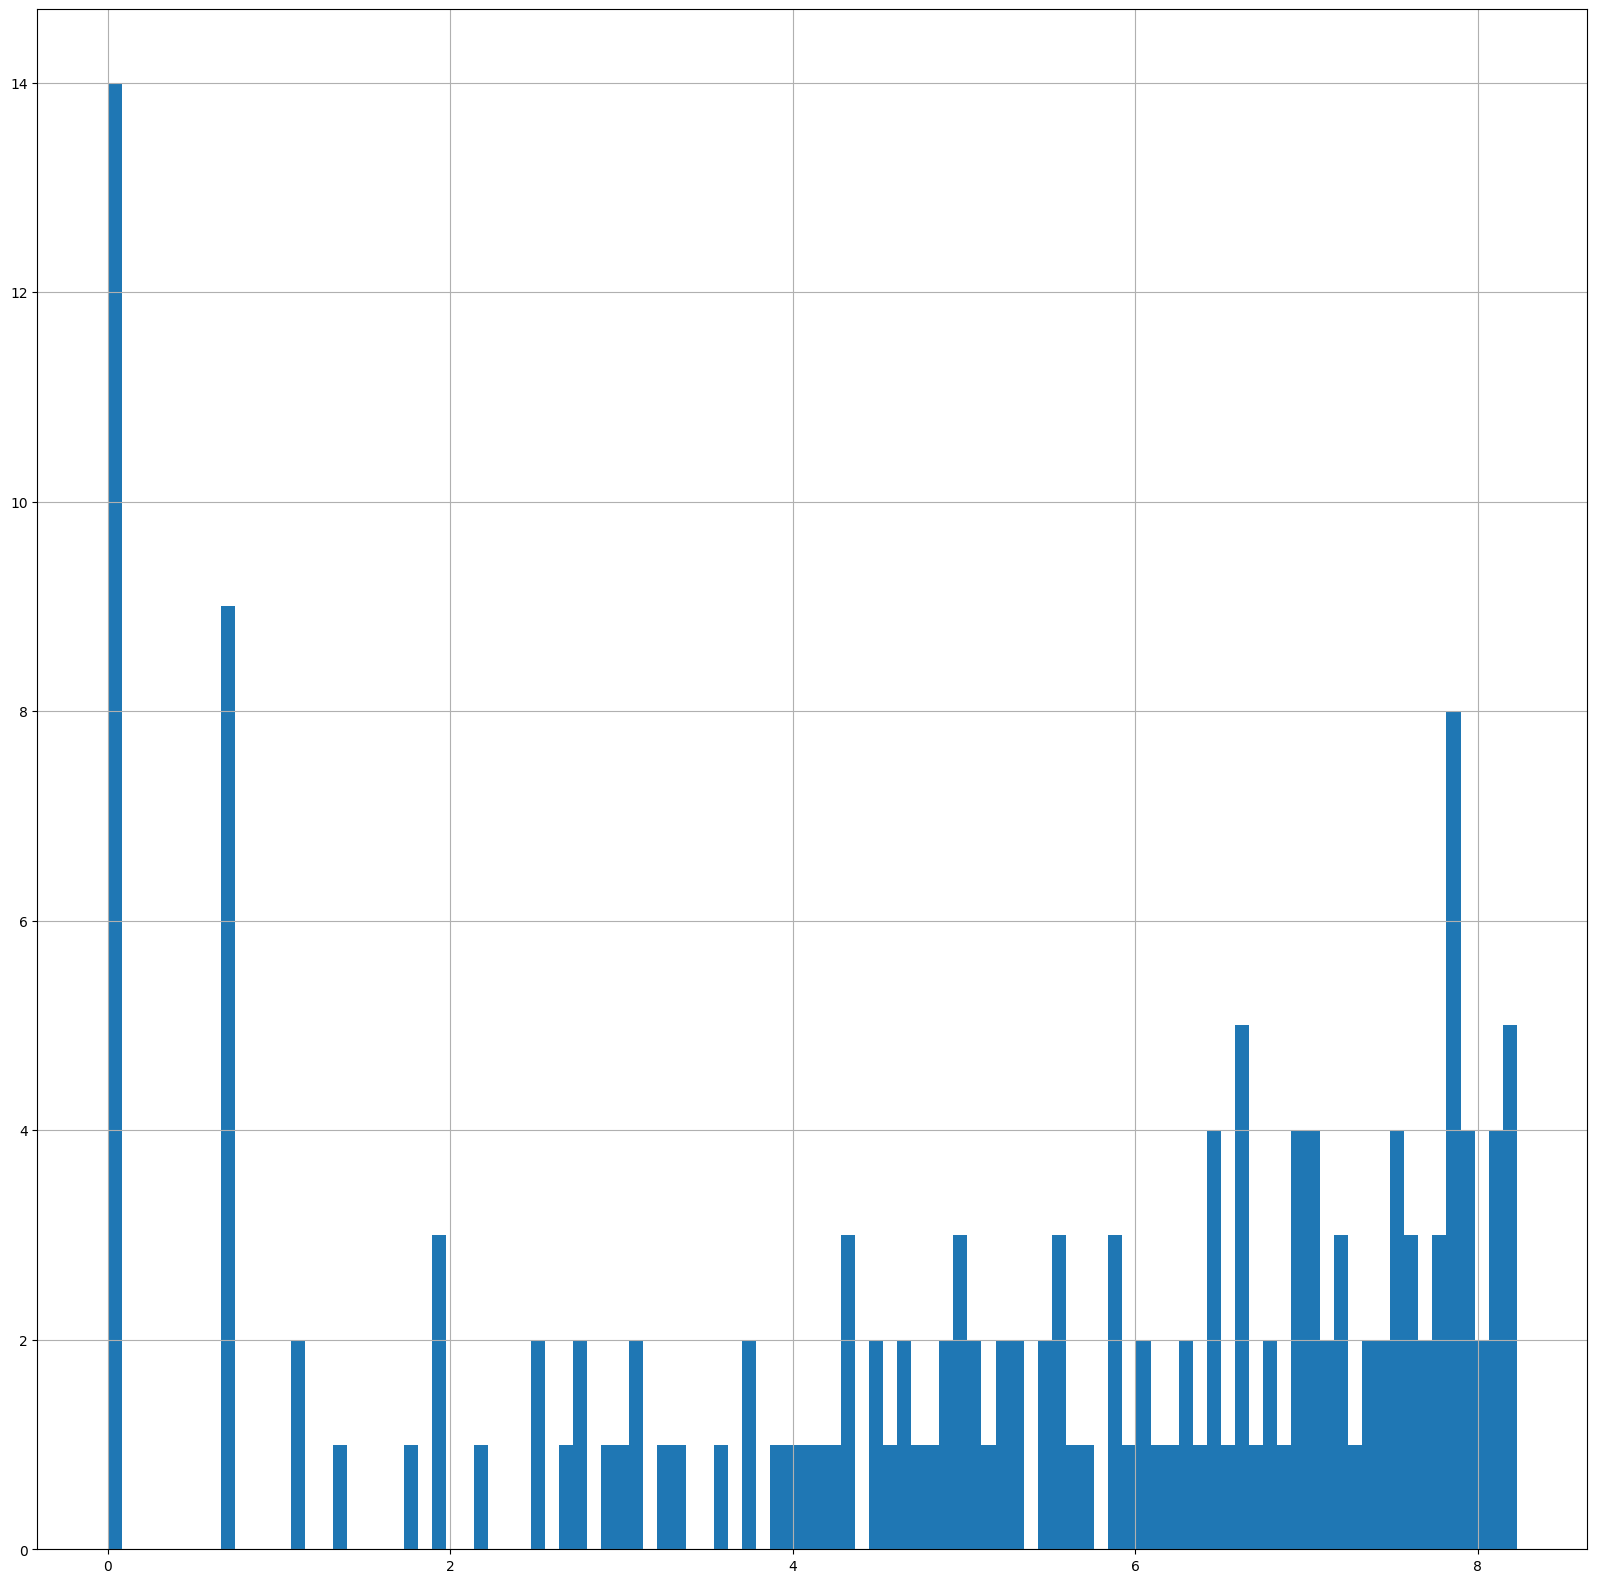

In [ ]:
np.log(all_ppp_NYC_by_zip_merged['Y_totalpppLMI']).hist(bins=100)

<Axes: >

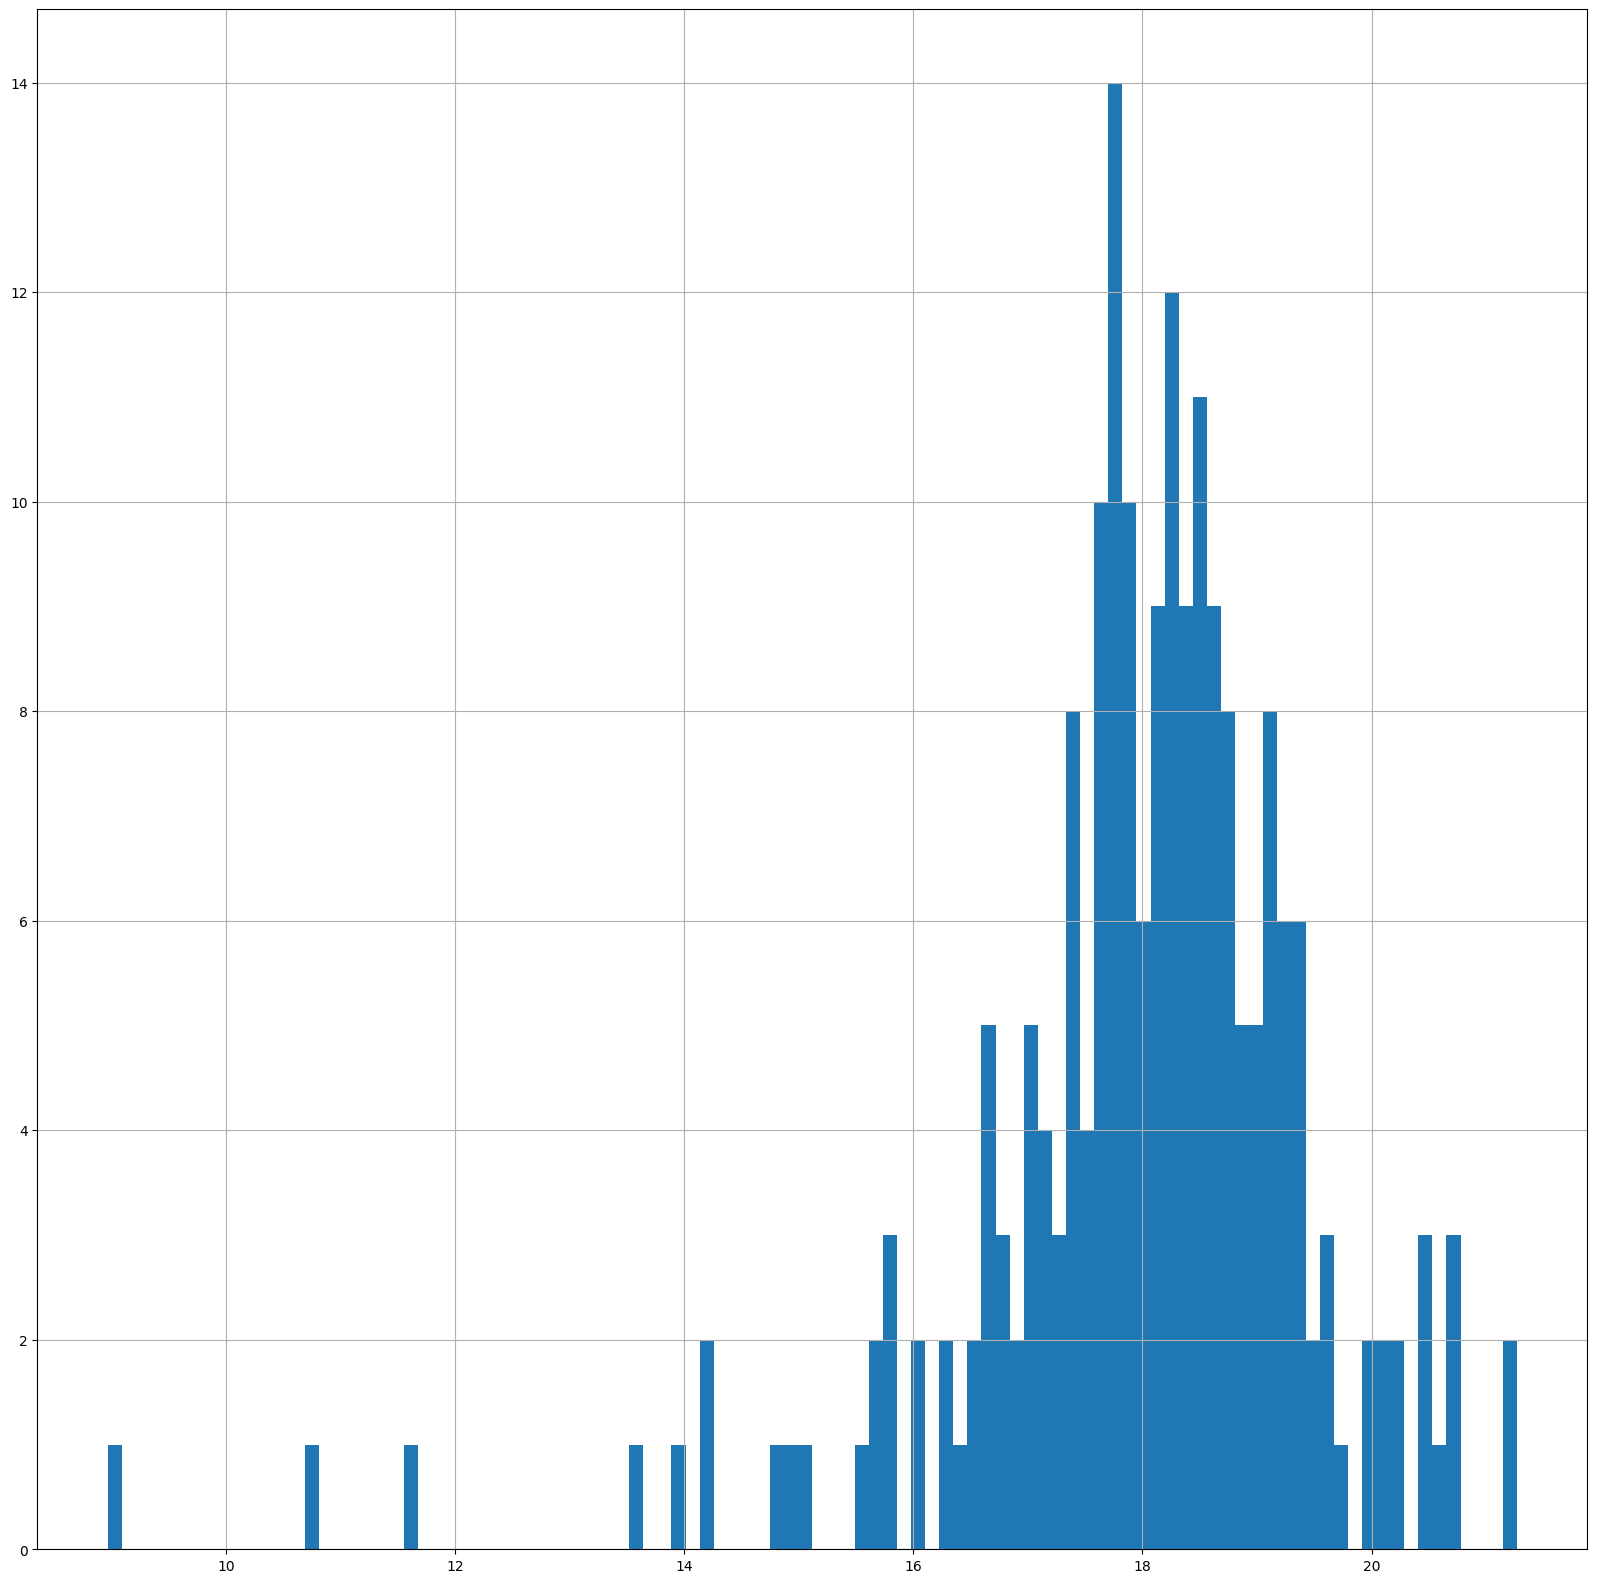

In [ ]:
np.log(all_ppp_NYC_by_zip_merged['Total_loanamount']).hist(bins=100)

####PPP Loans Adminstered by CDFIs

In [ ]:
all_ppp_NYC.dtypes

BorrowerName                    object
NAICSCode                      float64
FranchiseName                   object
BorrowerAddress                 object
BorrowerCity                    object
BorrowerState                   object
BorrowerZip                     object
InitialApprovalAmount          float64
LoanNumber                       int64
CurrentApprovalAmount          float64
UndisbursedAmount              float64
ServicingLenderName             object
ServicingLenderAddress          object
ServicingLenderCity             object
ServicingLenderState            object
ServicingLenderZip              object
HubzoneIndicator                object
LMIIndicator                    object
BusinessAgeDescription          object
ProjectCity                     object
ProjectCountyName               object
ProjectState                    object
ProjectZip                      object
JobsReported                    object
Race                            object
Ethnicity                

In [ ]:
#pt2 = ['Fund','FCU','Credit Union', 'BOC Capital', 'Economic Development Corporation','Carver', 'Community Corporation', 'Trust', 'Lending', 'Credit, Inc.', 'Community Development',]

In [ ]:
large_banks = ['JPMorgan Chase Bank, National Association', 'TD Bank, National Association', 'Bank of America, National Association',
               'Citibank, N.A.', 'Capital One, National Association', 'HSBC Bank USA, National Association', 'Santander Bank, National Association',
               'Wells Fargo Bank, National Association', 'American Express National Bank', 'PNC Bank, National Association']

In [ ]:
def is_large_bank(lender_name):
    return 'Yes' if lender_name in large_banks else 'No'

all_ppp_NYC['Large_Bank'] = all_ppp_NYC['ServicingLenderName'].apply(is_large_bank)

In [ ]:
def is_minorityzip(zip):
    return 'Yes' if zip in majority_minority_zips else 'No'

# Apply the function to create the 'Minority' column in DataFrame one
all_ppp_NYC['High_Minority'] = all_ppp_NYC['BorrowerZip'].apply(is_minorityzip)

In [ ]:
def is_blk_latin(zip):
    return 'Yes' if zip in zips_demographics_high_Hispanic_BLK else 'No'

# Apply the function to create the 'Minority' column in DataFrame one
all_ppp_NYC['High_BLK_Latin'] = all_ppp_NYC['BorrowerZip'].apply(is_blk_latin)

In [ ]:
def is_immigrantpop(zip):
    return 'Yes' if zip in majority_immigrantpop else 'No'

# Apply the function to create the 'CDFI' column in DataFrame one
all_ppp_NYC['NonUS_Citizen'] = all_ppp_NYC['BorrowerZip'].apply(is_immigrantpop)

In [ ]:
all_ppp_NYC

BorrowerName  NAICSCode  \
190440                                     SI WAX 3, LLC   812112.0   
196869            PRINT PROMOTIONS INC-SBA SMALL 7A TERM   541990.0   
203418              25 43RD DONUTS LLC-SBA SMALL 7A TERM        NaN   
218721           JEFFREY AINSPAN MD PC-SBA SMALL 7A TERM        NaN   
225727                                     SRINIDHHI INC   999990.0   
...                                                  ...        ...   
677403                            URBAN ELECTRICAL CORP.   238210.0   
677404                      YO!BRACES ORTHODONTICS, PLLC   621210.0   
677405              NATIONWIDE PROPERTIES MANAGEMENT LLC   551112.0   
677406  PATRIOT FIRST PROFESSIONAL SERVICES INCORPORATED   721310.0   
677409                        ALT BUSINESS PLATFORMS INC   236115.0   

              FranchiseName          BorrowerAddress      BorrowerCity  \
190440  European Wax Center  2935 Veterans Road West     Staten island   
196869                  NaN    330 Sprint Street 1-W          New York   
203418                  NaN             25 W 43RD ST          NEW YORK   
218721                  NaN             308A E 15 ST          NEW YORK   
225727                  NaN             1884 3RD AVE          NEW YORK   
...                     ...                      ...               ...   
677403                  NaN           13020 129th St  South Ozone Park   
677404                  NaN     322 Stockholm Street          Brooklyn   
677405                  NaN       87-87 113th Street     RICHMOND HILL   
677406                  NaN        570 Edgegrove Ave     Staten Island   
677409                  NaN           13159 224th St         Laurelton   

       BorrowerState BorrowerZip  InitialApprovalAmount  LoanNumber  \
190440            NJ       10309               127922.0  8913307710   
196869            NJ       10013               107990.0  4311017700   
203418            NJ       10036                92580.0  4254437700   
218721            NJ       10003                67077.0  4187087701   
225727            NJ       10029                58620.0  3535237701   
...              ...         ...                    ...         ...   
677403            NY       11420               150000.0  9735908307   
677404            NY       11237               150000.0  9776037306   
677405            NY       11418               150000.0  9783318606   
677406            NY       10312               150000.0  9798147207   
677409            NY       11413               150000.0  9808878607   

        CurrentApprovalAmount  ...  NonProfit  \
190440               127922.0  ...        NaN   
196869               107990.0  ...        NaN   
203418                92580.0  ...        NaN   
218721                67077.0  ...        NaN   
225727                58620.0  ...        NaN   
...                       ...  ...        ...   
677403               150000.0  ...        NaN   
677404               150000.0  ...        NaN   
677405               150000.0  ...        NaN   
677406               150000.0  ...        NaN   
677409               150000.0  ...        NaN   

                           BusinessType OriginatingLenderLocationID  \
190440  Limited  Liability Company(LLC)                      456756   
196869                      Corporation                       29805   
203418  Limited  Liability Company(LLC)                       29805   
218721                      Corporation                       29805   
225727                      Corporation                       29805   
...                                 ...                         ...   
677403         Subchapter S Corporation                       48270   
677404  Limited  Liability Company(LLC)                      122043   
677405                      Corporation                      456756   
677406         Subchapter S Corporation                      224478   
677409         Subchapter S Corporation                      456756   

       

In [ ]:
all_ppp_NYC_CDFI = all_ppp_NYC[all_ppp_NYC['ServicingLenderName'].str.contains(pt, regex= True)]

In [ ]:
len(all_ppp_NYC_CDFI), len(all_ppp_NYC)

(7296, 384325)

In [ ]:
all_ppp_NYC_CDFI_by_zip = all_ppp_NYC_CDFI.groupby(['BorrowerZip','BusinessAgeDescription'], as_index= False).agg({'BorrowerState': 'count'})
all_ppp_NYC_CDFI_by_zip_loanamount = all_ppp_NYC_CDFI.groupby(['BorrowerZip','BusinessAgeDescription'], as_index= False).agg({'InitialApprovalAmount': 'sum'})

In [ ]:
all_ppp_NYC_CDFI_by_zip = all_ppp_NYC_CDFI_by_zip.pivot(index='BorrowerZip', columns='BusinessAgeDescription', values='BorrowerState')
all_ppp_NYC_CDFI_by_zip['Total'] = all_ppp_NYC_CDFI_by_zip.sum(axis=1, numeric_only=True)
all_ppp_NYC_CDFI_by_zip = all_ppp_NYC_CDFI_by_zip.reset_index()
all_ppp_NYC_CDFI_by_zip['BorrowerZip'] = all_ppp_NYC_CDFI_by_zip['BorrowerZip'].astype(int)

In [ ]:
all_ppp_NYC_CDFI_by_zip_loanamount = all_ppp_NYC_CDFI_by_zip_loanamount.pivot(index='BorrowerZip', columns='BusinessAgeDescription', values='InitialApprovalAmount')
all_ppp_NYC_CDFI_by_zip_loanamount['Total'] = all_ppp_NYC_CDFI_by_zip.sum(axis=1, numeric_only=True)
all_ppp_NYC_CDFI_by_zip_loanamount = all_ppp_NYC_CDFI_by_zip_loanamount.reset_index()
all_ppp_NYC_CDFI_by_zip_loanamount['BorrowerZip'] = all_ppp_NYC_CDFI_by_zip_loanamount['BorrowerZip'].astype(int)

In [ ]:
jp_morgan_chase_ppp = all_ppp_NYC.loc[all_ppp_NYC['ServicingLenderName'] == "JPMorgan Chase Bank, National Association"]

In [ ]:
jp_morgan_chase_ppp_zip = jp_morgan_chase_ppp.groupby(['BorrowerZip','High_BLK_Latin'], as_index= False).agg({'BorrowerState': 'count','InitialApprovalAmount':'mean'})

In [ ]:
jp_morgan_chase_ppp_zip_highBLKLatin = jp_morgan_chase_ppp_zip.pivot(index='BorrowerZip', columns='High_BLK_Latin', values='BorrowerState')
jp_morgan_chase_ppp_zip_highBLKLatin['Total'] = jp_morgan_chase_ppp_zip_highBLKLatin.sum(axis=1, numeric_only=True)
jp_morgan_chase_ppp_zip_highBLKLatin = jp_morgan_chase_ppp_zip_highBLKLatin.reset_index()
jp_morgan_chase_ppp_zip_highBLKLatin['BorrowerZip'] = jp_morgan_chase_ppp_zip_highBLKLatin['BorrowerZip'].astype(int)
jp_morgan_chase_ppp_zip_highBLKLatin

High_BLK_Latin  BorrowerZip       0       1   Total
0                     10001     NaN  2270.0  2270.0
1                     10002   849.0     NaN   849.0
2                     10003  1173.0     NaN  1173.0
3                     10004   518.0     NaN   518.0
4                     10005   330.0     NaN   330.0
..                      ...     ...     ...     ...
197                   11691   100.0     NaN   100.0
198                   11692    25.0     NaN    25.0
199                   11693    48.0     NaN    48.0
200                   11694   115.0     NaN   115.0
201                   11697    14.0     NaN    14.0

[202 rows x 4 columns]

In [ ]:
jp_morgan_chase_ppp_zip_highBLKLatin.columns

Index(['BorrowerZip', 0, 1, 'Total'], dtype='object', name='High_BLK_Latin')

In [ ]:
jp_morgan_chase_pppamount_zip_highBLKLatin = jp_morgan_chase_ppp_zip.pivot(index='BorrowerZip', columns='High_BLK_Latin', values='InitialApprovalAmount')
jp_morgan_chase_pppamount_zip_highBLKLatin['Total'] = jp_morgan_chase_pppamount_zip_highBLKLatin.sum(axis=1, numeric_only=True)
jp_morgan_chase_pppamount_zip_highBLKLatin = jp_morgan_chase_pppamount_zip_highBLKLatin.reset_index()
jp_morgan_chase_pppamount_zip_highBLKLatin['BorrowerZip'] = jp_morgan_chase_pppamount_zip_highBLKLatin['BorrowerZip'].astype(int)
jp_morgan_chase_pppamount_zip_highBLKLatin

High_BLK_Latin  BorrowerZip              0              1          Total
0                     10001            NaN  198351.766727  198351.766727
1                     10002   94408.159246            NaN   94408.159246
2                     10003  169413.049369            NaN  169413.049369
3                     10004  272917.670965            NaN  272917.670965
4                     10005  259557.451788            NaN  259557.451788
..                      ...            ...            ...            ...
197                   11691   80840.370000            NaN   80840.370000
198                   11692   53794.800000            NaN   53794.800000
199                   11693  173200.320417            NaN  173200.320417
200                   11694   92289.078261            NaN   92289.078261
201                   11697   96351.153571            NaN   96351.153571

[202 rows x 4 columns]

In [ ]:
print((jp_morgan_chase_ppp_zip_highBLKLatin[0].sum()),(jp_morgan_chase_ppp_zip_highBLKLatin[1].sum()))

51182.0 10763.0


####Small Business Information

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
## zip codes map
## Data Dictionary: https://www2.census.gov/programs-surveys/cbp/technical-documentation/records-layouts/2019_record_layouts/zip_code_industry_detail_record_layout_2019.txt
biz_by_zip = pd.read_csv('zbp21detail.txt', sep=',', encoding='latin-1')

In [ ]:
#biz_by_zip.head()

In [ ]:
options = ['NY']
biz_by_zip_NY = biz_by_zip.loc[biz_by_zip['stabbr'].isin(options)]

In [ ]:
biz_by_zip_NY['zip'] = biz_by_zip_NY['zip'].astype(str)
#biz_bybiz_by_zip_NYNJ_zip['zip'] = biz_by_zip_NYNJ['zip'].astype(str).zfill(5)
#biz_by_zip['zip'] = biz_by_zip['zip'].astype(int)

<ipython-input-374-32f45b620c79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_by_zip_NY['zip'] = biz_by_zip_NY['zip'].astype(str)


In [ ]:
width = 5

biz_by_zip_NY['zip']= biz_by_zip_NY['zip'].str.zfill(width)

#biz_bybiz_by_zip_NYNJ['zip'] = biz_by_zip_NYNJ['zip'].zfill(5)
#biz_by_zip_NYNJ['zip'] = biz_by_zip_NYNJ['zip'].astype(int)
biz_by_zip_NY.dtypes

<ipython-input-375-9f308d74dbea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_by_zip_NY['zip']= biz_by_zip_NY['zip'].str.zfill(width)


zip         object
name        object
naics       object
est          int64
n<5         object
n5_9        object
n10_19      object
n20_49      object
n50_99      object
n100_249    object
n250_499    object
n500_999    object
n1000       object
city        object
stabbr      object
cty_name    object
dtype: object

In [ ]:
biz_by_zip_nyc = biz_by_zip_NY.loc[biz_by_zip_NY['zip'].isin(nyc_zipcodes)]

In [ ]:
biz_by_zip_nyc.dtypes

zip         object
name        object
naics       object
est          int64
n<5         object
n5_9        object
n10_19      object
n20_49      object
n50_99      object
n100_249    object
n250_499    object
n500_999    object
n1000       object
city        object
stabbr      object
cty_name    object
dtype: object

In [ ]:
cols = ['n<5', 'n5_9', 'n10_19', 'n20_49','n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000']
biz_by_zip_nyc[cols] = biz_by_zip_nyc[cols].apply(pd.to_numeric, errors='coerce').fillna(0)

#biz_by_zip_NYNJ[['n<5', 'n5_9', 'n10_19', 'n20_49',
#       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000']] = biz_by_zip_NYNJ[['n<5', 'n5_9', 'n10_19', 'n20_49',
#       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000']], errors='coerce').fillna(0).astype(int)

<ipython-input-378-8ca845da97fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_by_zip_nyc[cols] = biz_by_zip_nyc[cols].apply(pd.to_numeric, errors='coerce').fillna(0)


In [ ]:
biz_by_zip_nyc['zip'] = biz_by_zip_nyc['zip'].astype(int)

<ipython-input-379-b124c2768619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_by_zip_nyc['zip'] = biz_by_zip_nyc['zip'].astype(int)


In [ ]:
biz_by_zip_nyc = biz_by_zip_nyc.groupby(['zip'], as_index= False).agg({'est': 'sum','n<5': 'sum', 'n5_9': 'sum', 'n10_19': 'sum', 'n20_49': 'sum',
       'n50_99': 'sum', 'n100_249': 'sum', 'n250_499': 'sum', 'n500_999': 'sum', 'n1000': 'sum'})

In [ ]:
biz_by_zip_nyc = biz_by_zip_nyc.rename(index=str, columns={'zip':'ZipCode'})

In [ ]:
all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.merge(biz_by_zip_nyc, on='ZipCode')

In [ ]:
all_ppp_NYC_by_zip_merged.columns

Index(['ZipCode', 'Change of Ownership_loanamount',
       'Existing or more than 2 years old_loanamount',
       'New Business or 2 years or less_loanamount',
       'Startup, Loan Funds will Open Business_loanamount',
       'Unanswered_loanamount', 'Total_loanamount',
       'Change of Ownership_totalppp',
       'Existing or more than 2 years old_totalppp',
       'New Business or 2 years or less_totalppp',
       'Startup, Loan Funds will Open Business_totalppp',
       'Unanswered_totalppp', 'Total_totalppp', 'j100_249_bizsize',
       'j10_19_bizsize', 'j20_49_bizsize', 'j250_499_bizsize',
       'j50_99_bizsize', 'j5_9_bizsize', 'j<5_bizsize', 'uknown_bizsize',
       'Total_bizsize', 'N_totalpppLMI', 'Y_totalpppLMI', 'Total_totalpppLMI',
       'est', 'n<5', 'n5_9', 'n10_19', 'n20_49', 'n50_99', 'n100_249',
       'n250_499', 'n500_999', 'n1000'],
      dtype='object')

In [ ]:
all_ppp_NYC_by_zip_merged['PercentBizPPP'] = all_ppp_NYC_by_zip_merged['Total_totalppp']/all_ppp_NYC_by_zip_merged['est']
all_ppp_NYC_by_zip_merged

ZipCode  Change of Ownership_loanamount  \
0      10001                          9157.5   
1      10002                             NaN   
2      10003                       2017452.0   
3      10004                             NaN   
4      10005                             NaN   
..       ...                             ...   
201    11691                             NaN   
202    11692                          9692.5   
203    11693                             NaN   
204    11694                             NaN   
205    11697                             NaN   

     Existing or more than 2 years old_loanamount  \
0                                    1.452753e+09   
1                                    2.391930e+08   
2                                    5.301784e+08   
3                                    4.550852e+08   
4                                    3.308564e+08   
..                                            ...   
201                                  9.142563e+07   
202                                  1.996042e+07   
203                                  1.569192e+07   
204                                  2.299351e+07   
205                                  3.786390e+06   

     New Business or 2 years or less_loanamount  \
0                                   70216293.67   
1                                   16215670.90   
2                                   34610480.16   
3                                   25442442.01   
4                                   22224322.38   
..                                          ...   
201                                  3244198.79   
202                                  7068454.54   
203                                   171734.00   
204                                  1510108.08   
205                                   115000.00   

     Startup, Loan Funds will Open Business_loanamount  Unanswered_loanamount  \
0                                             526265.0            72785640.67   
1                                              21600.0             7100308.63   
2                                            1553070.0            40502331.66   
3                                            1010257.0            32835132.45   
4                                             108823.0            22302908.88   
..                                                 ...                    ...   
201                                                NaN             5056898.21   
202                                                NaN             2895851.51   
203                                                NaN              271412.50   
204                                                NaN             2648458.16   
205                                                NaN             2769916.96   

     Total_loanamount  Change of Ownership_totalppp  \
0        1.596290e+09                           1.0   
1        2.625306e+08                           NaN   
2        6.088618e+08                           2.0   
3        5.143731e+08                           NaN   
4        3.754925e+08                           NaN   
..                ...                           ...   
201      9.972672e+07                           NaN   
202      2.993442e+07                           1.0   
203      1.613507e+07                           NaN   
204      2.715207e+07                           NaN   
205      6.671307e+06                           NaN   

     Existing or more than 2 years old_totalppp  \
0                                        7556.0   
1                                        3204.0   
2                                        4216.0   
3                                        1579.0   
4                                        1404.0   
..                                          ...   
201                                      1387.0   
202                                       555.0   
203                                       265.0   
204                               

####Zip Demographic Information

In [ ]:
zip_demographics = pd.read_csv('https://data.cityofnewyork.us/api/views/kku6-nxdu/rows.csv?accessType=DOWNLOAD')

In [ ]:
demographics = ['JURISDICTION NAME', 'COUNT PARTICIPANTS','COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO',
       'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN',
       'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC',
       'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC',
       'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC',
       'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY',
       'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN',
       'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN',
       'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS UNKNOWN', 'COUNT CITIZEN STATUS TOTAL',
       'PERCENT CITIZEN STATUS TOTAL']

In [ ]:
zip_demographics = zip_demographics[demographics]

In [ ]:
zip_demographics['Percent Non White'] = zip_demographics['PERCENT HISPANIC LATINO'] + zip_demographics['PERCENT AMERICAN INDIAN'] + zip_demographics['PERCENT ASIAN NON HISPANIC']  + zip_demographics['PERCENT PACIFIC ISLANDER'] + zip_demographics['PERCENT BLACK NON HISPANIC'] + zip_demographics['PERCENT OTHER ETHNICITY']
zip_demographics['PERCENT Non Us Citizens'] = zip_demographics['PERCENT CITIZEN STATUS TOTAL'] - zip_demographics['PERCENT US CITIZEN']
zip_demographics['Percent Hispanic & Black'] = zip_demographics['PERCENT HISPANIC LATINO'] + zip_demographics['PERCENT BLACK NON HISPANIC']

In [ ]:
zip_demographics = zip_demographics.rename(index=str, columns={'JURISDICTION NAME':'ZipCode'})

In [ ]:
zip_demographics_high_Hispanic_BLK = zip_demographics.loc[zip_demographics['Percent Hispanic & Black'] >= 0.75]
zips_demographics_high_Hispanic_BLK = zip_demographics_high_Hispanic_BLK['ZipCode'].unique().tolist()

In [ ]:
zip_demographics_LOW_Hispanic_BLK = zip_demographics.loc[zip_demographics['Percent Hispanic & Black'] <= 0.25]
zip_demographics_LOW_Hispanic_BLK = zip_demographics_LOW_Hispanic_BLK['ZipCode'].unique().tolist()

In [ ]:
numbers_as_strings = [str(num) for num in zip_demographics_LOW_Hispanic_BLK]
print(numbers_as_strings)

['10002', '10003', '10004', '10007', '10009', '10010', '10012', '10013', '10014', '10017', '10018', '10019', '10020', '10021', '10022', '10024', '10026', '10028', '10030', '10031', '10033', '10034', '10035', '10037', '10039', '10044', '10045', '10065', '10115', '10119', '10128', '10154', '10278', '10280', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10309', '10310', '10312', '10314', '10457', '10472', '10473', '10474', '10514', '10543', '10553', '10573', '10701', '10705', '10911', '10965', '10977', '11001', '11021', '11050', '11101', '11102', '11103', '11104', '11105', '11106', '11111', '11112', '11202', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11225', '11228', '11229', '11230', '11231', '11232', '11235', '11237', '11238', '11239', '11252', '11355', '11356', '11357', '11358', '11360', '11361', '11362', '11364', '11365', '11366', '11367', 

In [ ]:
#zip_demographics_high_Minority = zip_demographics.loc[zip_demographics['Percent Non White'] >= 0.75]
#zip_demographics_high_Minority['JURISDICTION NAME'].unique().tolist()

In [ ]:
#zip_demographics_high_Minority.describe()

In [ ]:
#zip_demographics_low_Minority = zip_demographics.loc[zip_demographics['Percent Non White'] <= 0.25]

In [ ]:
#less_than_25perc_minority_zips_num = zip_demographics_low_Minority['JURISDICTION NAME'].unique().tolist()

In [ ]:
#zip_demographics_low_Minority.describe()

In [ ]:
zip_demographics_high_immigrantpop = zip_demographics.loc[zip_demographics['PERCENT Non Us Citizens'] >= 0.75]

In [ ]:
 #majority_immigrantpop = zip_demographics_high_immigrantpop['ZipCode'].unique().tolist()

In [ ]:
#numbers_as_strings = [str(num) for num in zips_demographics_high_Hispanic_BLK]
#print(numbers_as_strings)

####Statitical Analysis on Full Data Set

In [ ]:
all_ppp_NYC.columns

Index(['BorrowerName', 'NAICSCode', 'FranchiseName', 'BorrowerAddress',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'InitialApprovalAmount',
       'LoanNumber', 'CurrentApprovalAmount', 'UndisbursedAmount',
       'ServicingLenderName', 'ServicingLenderAddress', 'ServicingLenderCity',
       'ServicingLenderState', 'ServicingLenderZip', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'JobsReported',
       'Race', 'Ethnicity', 'Gender', 'Veteran', 'NonProfit', 'BusinessType',
       'OriginatingLenderLocationID', 'OriginatingLender',
       'OriginatingLenderCity', 'OriginatingLenderState', 'Large_Bank',
       'High_Minority', 'High_BLK_Latin', 'NonUS_Citizen'],
      dtype='object')

In [ ]:
print(all_ppp_NYC['JobsReported'].value_counts().to_string())

j<5         297251
j5_9         30358
j10_19       21533
j20_49       16122
uknown        9025
j50_99        5399
j100_249      3558
j250_499      1079


In [ ]:
stats.ttest_ind(all_ppp_NYC.loc[(all_ppp_NYC['Large_Bank'] == "Yes") & (all_ppp_NYC['LMIIndicator'] == "Y")]['InitialApprovalAmount'],
                all_ppp_NYC.loc[(all_ppp_NYC['Large_Bank'] == "No") & (all_ppp_NYC['LMIIndicator'] =='Y')]['InitialApprovalAmount'])

Ttest_indResult(statistic=33.27992374528912, pvalue=6.817046620781482e-242)

In [ ]:
stats.ttest_ind(all_ppp_NYC.loc[(all_ppp_NYC['Large_Bank'] == "Yes") & (all_ppp_NYC['LMIIndicator'] =='Y') & (all_ppp_NYC['JobsReported'] == 'j<5')]['InitialApprovalAmount'],
                all_ppp_NYC.loc[(all_ppp_NYC['Large_Bank'] == "No") & (all_ppp_NYC['LMIIndicator'] =='Y') & (all_ppp_NYC['JobsReported'] == 'j<5')]['InitialApprovalAmount'])

Ttest_indResult(statistic=37.01465482061135, pvalue=3.572132771113588e-298)

In [ ]:
stats.ttest_ind(all_ppp_NYC.loc[(all_ppp_NYC['Large_Bank'] == "Yes") & (all_ppp_NYC['High_BLK_Latin'] =="Yes") & (all_ppp_NYC['JobsReported'] == 'j<5')]['InitialApprovalAmount'],
                all_ppp_NYC.loc[(all_ppp_NYC['Large_Bank'] == "No") & (all_ppp_NYC['High_BLK_Latin'] =="Yes") & (all_ppp_NYC['JobsReported'] == 'j<5')]['InitialApprovalAmount'])

Ttest_indResult(statistic=55.1635472733191, pvalue=0.0)

In [ ]:
all_ppp_NYC.columns

Index(['BorrowerName', 'NAICSCode', 'FranchiseName', 'BorrowerAddress',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'InitialApprovalAmount',
       'LoanNumber', 'CurrentApprovalAmount', 'UndisbursedAmount',
       'ServicingLenderName', 'ServicingLenderAddress', 'ServicingLenderCity',
       'ServicingLenderState', 'ServicingLenderZip', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'JobsReported',
       'Race', 'Ethnicity', 'Gender', 'Veteran', 'NonProfit', 'BusinessType',
       'OriginatingLenderLocationID', 'OriginatingLender',
       'OriginatingLenderCity', 'OriginatingLenderState', 'Large_Bank',
       'High_Minority', 'High_BLK_Latin', 'NonUS_Citizen'],
      dtype='object')

In [ ]:
all_ppp_NYC['Large_Bank'] = all_ppp_NYC['Large_Bank'].map({'Yes': 1, 'No': 0})
all_ppp_NYC['High_BLK_Latin'] = all_ppp_NYC['High_BLK_Latin'].map({'Yes': 1, 'No': 0})
all_ppp_NYC['High_Minority'] = all_ppp_NYC['High_Minority'].map({'Yes': 1, 'No': 0})
all_ppp_NYC['LMIIndicator'] = all_ppp_NYC['LMIIndicator'].map({'Y': 1, 'N': 0})

In [ ]:
all_ppp_NYC

BorrowerName  NAICSCode  \
190440                                     SI WAX 3, LLC   812112.0   
196869            PRINT PROMOTIONS INC-SBA SMALL 7A TERM   541990.0   
203418              25 43RD DONUTS LLC-SBA SMALL 7A TERM        NaN   
218721           JEFFREY AINSPAN MD PC-SBA SMALL 7A TERM        NaN   
225727                                     SRINIDHHI INC   999990.0   
...                                                  ...        ...   
677403                            URBAN ELECTRICAL CORP.   238210.0   
677404                      YO!BRACES ORTHODONTICS, PLLC   621210.0   
677405              NATIONWIDE PROPERTIES MANAGEMENT LLC   551112.0   
677406  PATRIOT FIRST PROFESSIONAL SERVICES INCORPORATED   721310.0   
677409                        ALT BUSINESS PLATFORMS INC   236115.0   

              FranchiseName          BorrowerAddress      BorrowerCity  \
190440  European Wax Center  2935 Veterans Road West     Staten island   
196869                  NaN    330 Sprint Street 1-W          New York   
203418                  NaN             25 W 43RD ST          NEW YORK   
218721                  NaN             308A E 15 ST          NEW YORK   
225727                  NaN             1884 3RD AVE          NEW YORK   
...                     ...                      ...               ...   
677403                  NaN           13020 129th St  South Ozone Park   
677404                  NaN     322 Stockholm Street          Brooklyn   
677405                  NaN       87-87 113th Street     RICHMOND HILL   
677406                  NaN        570 Edgegrove Ave     Staten Island   
677409                  NaN           13159 224th St         Laurelton   

       BorrowerState BorrowerZip  InitialApprovalAmount  LoanNumber  \
190440            NJ       10309               127922.0  8913307710   
196869            NJ       10013               107990.0  4311017700   
203418            NJ       10036                92580.0  4254437700   
218721            NJ       10003                67077.0  4187087701   
225727            NJ       10029                58620.0  3535237701   
...              ...         ...                    ...         ...   
677403            NY       11420               150000.0  9735908307   
677404            NY       11237               150000.0  9776037306   
677405            NY       11418               150000.0  9783318606   
677406            NY       10312               150000.0  9798147207   
677409            NY       11413               150000.0  9808878607   

        CurrentApprovalAmount  ...  NonProfit  \
190440               127922.0  ...        NaN   
196869               107990.0  ...        NaN   
203418                92580.0  ...        NaN   
218721                67077.0  ...        NaN   
225727                58620.0  ...        NaN   
...                       ...  ...        ...   
677403               150000.0  ...        NaN   
677404               150000.0  ...        NaN   
677405               150000.0  ...        NaN   
677406               150000.0  ...        NaN   
677409               150000.0  ...        NaN   

                           BusinessType OriginatingLenderLocationID  \
190440  Limited  Liability Company(LLC)                      456756   
196869                      Corporation                       29805   
203418  Limited  Liability Company(LLC)                       29805   
218721                      Corporation                       29805   
225727                      Corporation                       29805   
...                                 ...                         ...   
677403         Subchapter S Corporation                       48270   
677404  Limited  Liability Company(LLC)                      122043   
677405                      Corporation                      456756   
677406         Subchapter S Corporation                      224478   
677409         Subchapter S Corporation                      456756   

       

In [ ]:
all_ppp_NYC['ServicingLenderName'].unique().tolist()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have loaded the data into a DataFrame called 'df'

# Selecting the relevant columns for the regression
cols_to_include = [
     'High_Minority', 'NonUS_Citizen', 'Large_Bank', 'High_BLK_Latin',
     'InitialApprovalAmount','LMIIndicator',
]

# Dropping any rows with missing values in the selected columns
df_reg = all_ppp_NYC[cols_to_include].dropna()

# Define the dependent variable and the independent variables
Y = df_reg['InitialApprovalAmount']
X = df_reg[['Large_Bank', 'High_BLK_Latin','LMIIndicator']]

# Adding a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Performing the OLS regression
model = sm.OLS(Y, X).fit()

# Printing the summary of the regression results
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     InitialApprovalAmount   R-squared:                       0.010
Model:                               OLS   Adj. R-squared:                  0.010
Method:                    Least Squares   F-statistic:                     1271.
Date:                   Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                           01:42:12   Log-Likelihood:            -5.4089e+06
No. Observations:                 384325   AIC:                         1.082e+07
Df Residuals:                     384321   BIC:                         1.082e+07
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

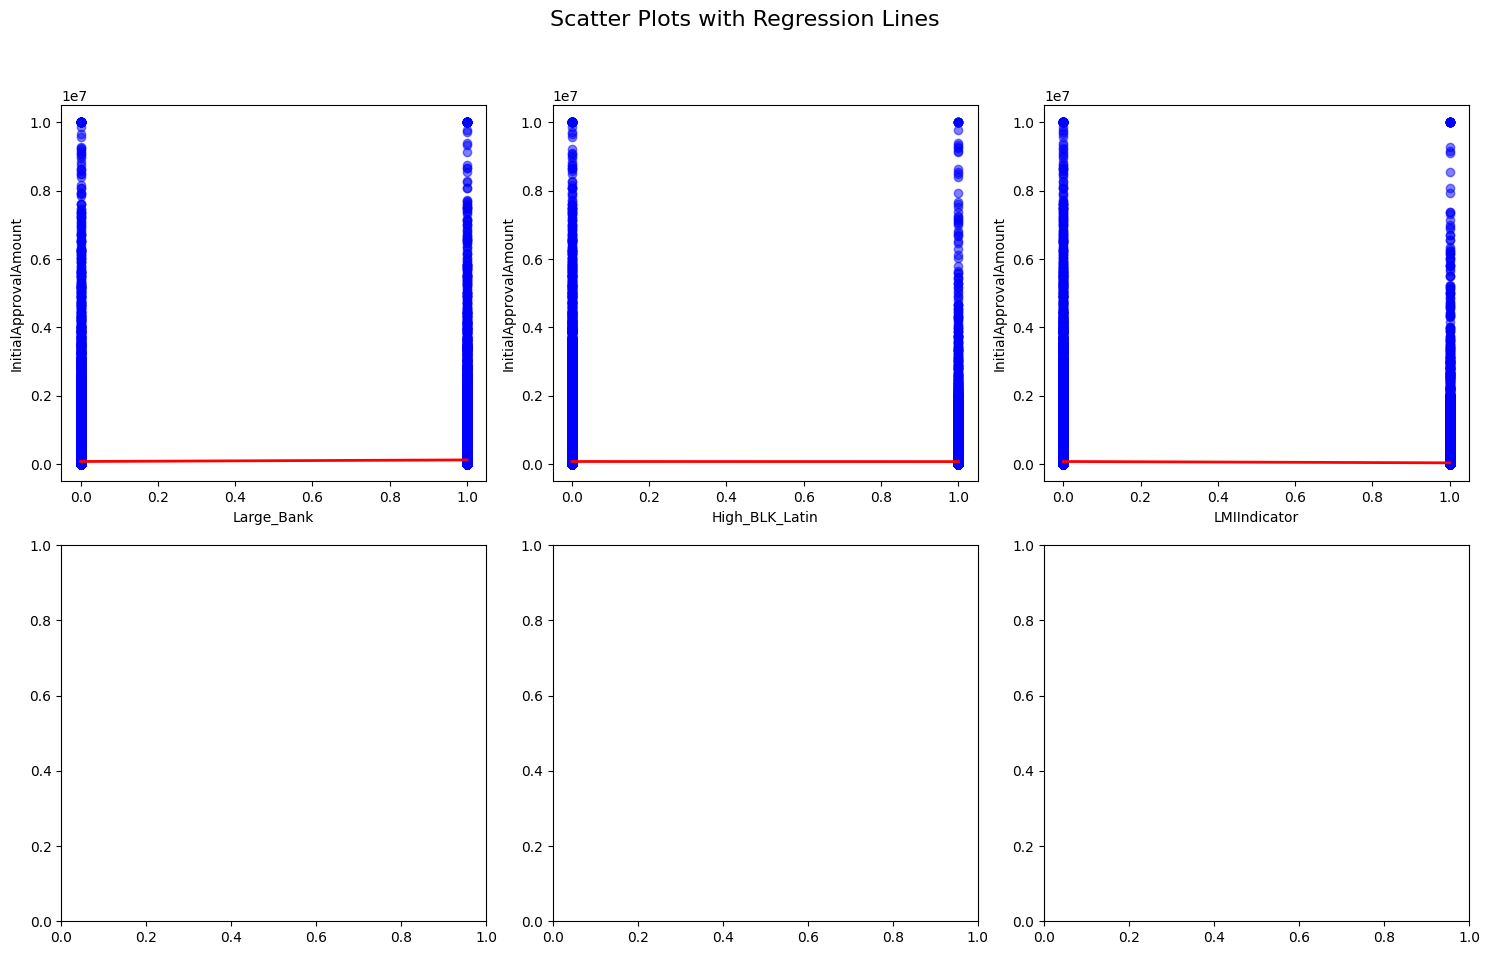

In [ ]:
# Plot scatter plot and regression line for each significant independent variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots with Regression Lines', fontsize=16)

for i, col in enumerate(X.columns[1:]):
    ax = axes[i // 3, i % 3]
    ax.scatter(X[col], Y, color='blue', alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('InitialApprovalAmount')

    # Plot regression line
    xs = np.linspace(X[col].min(), X[col].max(), 100)
    ys = model.params[col] * xs + model.params['const']
    ax.plot(xs, ys, color='red', linewidth=2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

####Statistical Analysis Non-Shape/Mapping

In [ ]:
#strings_list = [str(num) for num in numbers]

# Print the result
#print(strings_list)

In [ ]:
#numbers_as_strings = [str(num) for num in less_than_25perc_minority_zips_num]

# Print the result
#print(numbers_as_strings)

In [ ]:
#numbers_as_strings = [str(num) for num in less_than_25perc_minority_zips_num]


In [ ]:
#majority_minority_zips = ['10001', '10002', '10003', '10005', '10006', '10007', '10009', '10011', '10013',
#                          '10016', '10018', '10022', '10023', '10025', '10027', '10029', '10032', '10036',
#                          '10038', '10040', '10306', '10451', '10452', '10453', '10454', '10455', '10456',
#                          '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466',
#                          '10467', '10468', '10469', '10471', '10475', '11101', '11201', '11203', '11212',
#                          '11224', '11226', '11354', '11368', '11372', '11375', '11418', '11419', '11420',
#                          '11427', '11432', '11434', '11798']


In [ ]:
all_ppp_NYC.columns

Index(['BorrowerName', 'NAICSCode', 'FranchiseName', 'BorrowerAddress',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'InitialApprovalAmount',
       'LoanNumber', 'CurrentApprovalAmount', 'UndisbursedAmount',
       'ServicingLenderName', 'ServicingLenderAddress', 'ServicingLenderCity',
       'ServicingLenderState', 'ServicingLenderZip', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'JobsReported',
       'Race', 'Ethnicity', 'Gender', 'Veteran', 'NonProfit', 'BusinessType',
       'OriginatingLenderLocationID', 'OriginatingLender',
       'OriginatingLenderCity', 'OriginatingLenderState', 'Large_Bank',
       'High_Minority', 'High_BLK_Latin', 'NonUS_Citizen'],
      dtype='object')

In [ ]:
all_ppp_NYC_majorbanks_zip = all_ppp_NYC.groupby(['BorrowerZip','Large_Bank'], as_index= False).agg({'BorrowerState': 'count'})

all_ppp_NYC_majorbanks_zip = all_ppp_NYC_majorbanks_zip.pivot(index='BorrowerZip', columns='Large_Bank', values='BorrowerState')
all_ppp_NYC_majorbanks_zip['Total'] = all_ppp_NYC_majorbanks_zip.sum(axis=1, numeric_only=True)
all_ppp_NYC_majorbanks_zip = all_ppp_NYC_majorbanks_zip.reset_index()
all_ppp_NYC_majorbanks_zip['BorrowerZip'] = all_ppp_NYC_majorbanks_zip['BorrowerZip'].astype(int)
all_ppp_NYC_majorbanks_zip = all_ppp_NYC_majorbanks_zip.add_suffix('_totalpppbylargebanks')

In [ ]:
all_ppp_NYC_majorbanks_zip = all_ppp_NYC_majorbanks_zip.rename(index=str, columns={'BorrowerZip_totalpppbylargebanks':'ZipCode'})
all_ppp_NYC_majorbanks_zip

Large_Bank  ZipCode  0_totalpppbylargebanks  1_totalpppbylargebanks  \
0             10001                  4090.0                  4398.0   
1             10002                  2003.0                  1647.0   
2             10003                  2541.0                  2246.0   
3             10004                   794.0                  1021.0   
4             10005                   841.0                   743.0   
..              ...                     ...                     ...   
201           11691                  1320.0                   228.0   
202           11692                   534.0                    59.0   
203           11693                   217.0                    73.0   
204           11694                   286.0                   195.0   
205           11697                    33.0                    24.0   

Large_Bank  Total_totalpppbylargebanks  
0                               8488.0  
1                               3650.0  
2                               4787.0  
3                               1815.0  
4                               1584.0  
..                                 ...  
201                             1548.0  
202                              593.0  
203                              290.0  
204                              481.0  
205                               57.0  

[206 rows x 4 columns]

In [ ]:
all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.merge(zip_demographics, on='ZipCode',how ="left")

In [ ]:
len(all_ppp_NYC_by_zip_merged)

206

In [ ]:
all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.merge(cdfis_total_byzip, on='ZipCode',how ="left")

In [ ]:
all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.merge(branch_dataNY_byzip, on='ZipCode',how ="left")

In [ ]:
all_ppp_NYC_by_zip_merged = all_ppp_NYC_by_zip_merged.merge(all_ppp_NYC_majorbanks_zip, on='ZipCode',how ="left")

In [ ]:
all_ppp_NYC_by_zip_merged.columns

Index(['ZipCode', 'Change of Ownership_loanamount',
       'Existing or more than 2 years old_loanamount',
       'New Business or 2 years or less_loanamount',
       'Startup, Loan Funds will Open Business_loanamount',
       'Unanswered_loanamount', 'Total_loanamount',
       'Change of Ownership_totalppp',
       'Existing or more than 2 years old_totalppp',
       'New Business or 2 years or less_totalppp',
       'Startup, Loan Funds will Open Business_totalppp',
       'Unanswered_totalppp', 'Total_totalppp', 'j100_249_bizsize',
       'j10_19_bizsize', 'j20_49_bizsize', 'j250_499_bizsize',
       'j50_99_bizsize', 'j5_9_bizsize', 'j<5_bizsize', 'uknown_bizsize',
       'Total_bizsize', 'N_totalpppLMI', 'Y_totalpppLMI', 'Total_totalpppLMI',
       'est', 'n<5', 'n5_9', 'n10_19', 'n20_49', 'n50_99', 'n100_249',
       'n250_499', 'n500_999', 'n1000', 'PercentBizPPP', 'COUNT PARTICIPANTS',
       'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 

In [ ]:
#print(all_ppp_NYC_by_zip_merged['j<5_bizsize'].value_counts().to_string())

In [ ]:
all_ppp_NYC_by_zip_merged['Total_CDFIs'] = all_ppp_NYC_by_zip_merged['Total_CDFIs'].fillna(0)
all_ppp_NYC_by_zip_merged['Total_Bank_Branches'] = all_ppp_NYC_by_zip_merged['Total_Bank_Branches'].fillna(0)

In [ ]:
all_ppp_NYC_by_zip_merged_high_BLK_Latin = all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['ZipCode'].isin(zips_demographics_high_Hispanic_BLK)]

In [ ]:
all_ppp_NYC_by_zip_merged

ZipCode  Change of Ownership_loanamount  \
0      10001                          9157.5   
1      10002                             NaN   
2      10003                       2017452.0   
3      10004                             NaN   
4      10005                             NaN   
..       ...                             ...   
201    11691                             NaN   
202    11692                          9692.5   
203    11693                             NaN   
204    11694                             NaN   
205    11697                             NaN   

     Existing or more than 2 years old_loanamount  \
0                                    1.452753e+09   
1                                    2.391930e+08   
2                                    5.301784e+08   
3                                    4.550852e+08   
4                                    3.308564e+08   
..                                            ...   
201                                  9.142563e+07   
202                                  1.996042e+07   
203                                  1.569192e+07   
204                                  2.299351e+07   
205                                  3.786390e+06   

     New Business or 2 years or less_loanamount  \
0                                   70216293.67   
1                                   16215670.90   
2                                   34610480.16   
3                                   25442442.01   
4                                   22224322.38   
..                                          ...   
201                                  3244198.79   
202                                  7068454.54   
203                                   171734.00   
204                                  1510108.08   
205                                   115000.00   

     Startup, Loan Funds will Open Business_loanamount  Unanswered_loanamount  \
0                                             526265.0            72785640.67   
1                                              21600.0             7100308.63   
2                                            1553070.0            40502331.66   
3                                            1010257.0            32835132.45   
4                                             108823.0            22302908.88   
..                                                 ...                    ...   
201                                                NaN             5056898.21   
202                                                NaN             2895851.51   
203                                                NaN              271412.50   
204                                                NaN             2648458.16   
205                                                NaN             2769916.96   

     Total_loanamount  Change of Ownership_totalppp  \
0        1.596290e+09                           1.0   
1        2.625306e+08                           NaN   
2        6.088618e+08                           2.0   
3        5.143731e+08                           NaN   
4        3.754925e+08                           NaN   
..                ...                           ...   
201      9.972672e+07                           NaN   
202      2.993442e+07                           1.0   
203      1.613507e+07                           NaN   
204      2.715207e+07                           NaN   
205      6.671307e+06                           NaN   

     Existing or more than 2 years old_totalppp  \
0                                        7556.0   
1                                        3204.0   
2                                        4216.0   
3                                        1579.0   
4                                        1404.0   
..                                          ...   
201                                      1387.0   
202                                       555.0   
203                                       265.0   
204                               

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged_high_BLK_Latin.loc[all_ppp_NYC_by_zip_merged_high_BLK_Latin['1_totalpppbylargebanks']>1]['Total_totalppp'],
                all_ppp_NYC_by_zip_merged_high_BLK_Latin.loc[all_ppp_NYC_by_zip_merged_high_BLK_Latin['0_totalpppbylargebanks']>1]['Total_totalppp'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged_high_BLK_Latin.loc[all_ppp_NYC_by_zip_merged_high_BLK_Latin['Total_Bank_Branches']>1]['Total_totalppp'],
                all_ppp_NYC_by_zip_merged_high_BLK_Latin.loc[all_ppp_NYC_by_zip_merged_high_BLK_Latin['Total_Bank_Branches']<1]['Total_totalppp'])

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Non White']>.75]['Total_totalppp'],
                all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Non White']<.25]['Total_totalppp'])

Ttest_indResult(statistic=4.977136073012942, pvalue=1.602910394208396e-06)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Y_totalpppLMI']>0]['Total_totalppp'],
                all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['N_totalpppLMI']>0]['Total_totalppp'])

Ttest_indResult(statistic=2.640923567988188, pvalue=0.008627226500874507)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Non White']>.75]['PercentBizPPP'],
                all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Non White']<.25]['PercentBizPPP'])

Ttest_indResult(statistic=-0.09370689202043944, pvalue=0.9254550014818214)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75]['PercentBizPPP'],
                all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75]['PercentBizPPP'])

Ttest_indResult(statistic=1.299232940515641, pvalue=0.195582878137081)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75]['Total_loanamount'],
                all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75]['Total_loanamount'])

Ttest_indResult(statistic=-0.11942027321434948, pvalue=0.9050801673083845)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75) & (all_ppp_NYC_by_zip_merged['j<5_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'],
                all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75) & (all_ppp_NYC_by_zip_merged['j<5_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'])

Ttest_indResult(statistic=1.4262703978838707, pvalue=0.1652514980015342)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75) & (all_ppp_NYC_by_zip_merged['j5_9_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'],
                all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75) & (all_ppp_NYC_by_zip_merged['j5_9_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'])

Ttest_indResult(statistic=1.4262703978838707, pvalue=0.1652514980015342)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75) & (all_ppp_NYC_by_zip_merged['j10_19_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'],
                all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75) & (all_ppp_NYC_by_zip_merged['j10_19_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'])

Ttest_indResult(statistic=1.4262703978838707, pvalue=0.1652514980015342)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75) & (all_ppp_NYC_by_zip_merged['j50_99_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'],
                all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75) & (all_ppp_NYC_by_zip_merged['j50_99_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'])

Ttest_indResult(statistic=1.4262703978838707, pvalue=0.1652514980015342)

In [ ]:
stats.ttest_ind(all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75) & (all_ppp_NYC_by_zip_merged['j100_249_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'],
                all_ppp_NYC_by_zip_merged.loc[(all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75) & (all_ppp_NYC_by_zip_merged['j100_249_bizsize'] >= 1 ) & (all_ppp_NYC_by_zip_merged['Total_CDFIs'] >= 1 )]['PercentBizPPP'])

Ttest_indResult(statistic=1.4262703978838707, pvalue=0.1652514980015342)

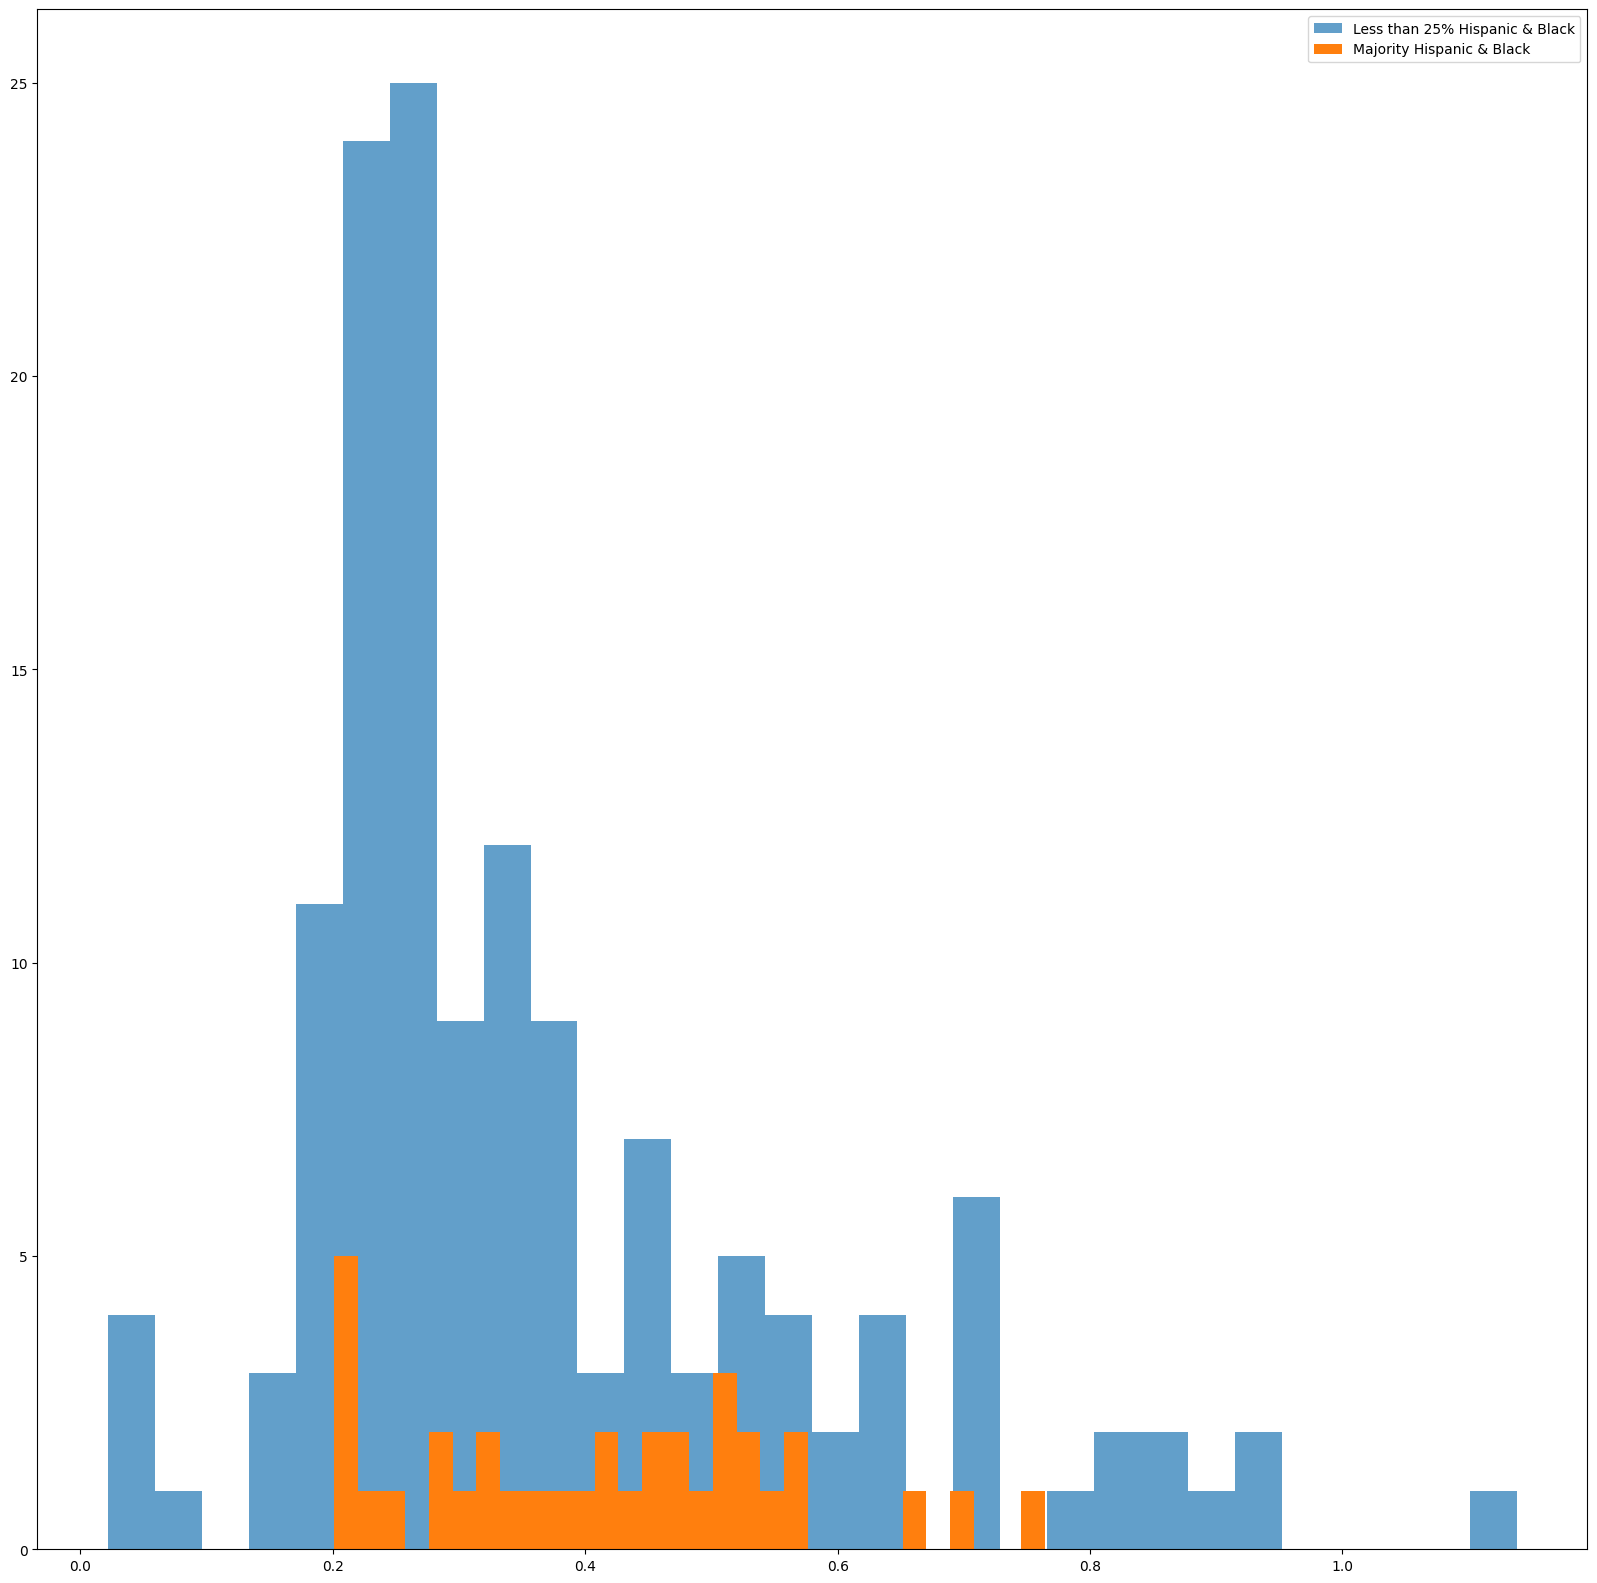

In [ ]:
plt.hist(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] <= 0.75]['PercentBizPPP'].values,bins=30,alpha=0.7,label='Less than 25% Hispanic & Black')
plt.hist(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75]['PercentBizPPP'].values,bins=30,label='Majority Hispanic & Black')
plt.legend()

In [ ]:
def is_normal(x): #check is the distribution is normal using one-sample KS test and sample mean-std
    return stats.kstest(x,'norm',args=(x.mean(),x.std()))

In [ ]:
is_normal(np.log(all_ppp_NYC_by_zip_merged['PercentBizPPP']))

KstestResult(statistic=0.12033213934841205, pvalue=0.004673061687469606, statistic_location=-1.5738356448035302, statistic_sign=-1)

In [ ]:
is_normal(np.log(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Percent Hispanic & Black'] >= 0.75]['PercentBizPPP']))

KstestResult(statistic=0.12127769926088267, pvalue=0.6379927742031289, statistic_location=-0.8701275330176342, statistic_sign=-1)

In [ ]:
 is_normal(np.log(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['j<5_bizsize'] >= 1]['PercentBizPPP']))

KstestResult(statistic=0.12101138827391847, pvalue=0.004494395196758421, statistic_location=-1.5738356448035302, statistic_sign=-1)

In [ ]:
 is_normal(np.log(all_ppp_NYC_by_zip_merged.loc[all_ppp_NYC_by_zip_merged['Y_totalpppLMI']>0]['Total_totalppp']))

KstestResult(statistic=0.07497261447464942, pvalue=0.3243987681504117, statistic_location=7.6246189861593985, statistic_sign=-1)

In [ ]:
corrMatrix = all_ppp_NYC_by_zip_merged.iloc[:,2:].corr().corr()
print (corrMatrix)

                                                   Existing or more than 2 years old_loanamount  \
Existing or more than 2 years old_loanamount                                           1.000000   
New Business or 2 years or less_loanamount                                             0.998977   
Startup, Loan Funds will Open Business_loanamount                                      0.911113   
Unanswered_loanamount                                                                  0.992505   
Total_loanamount                                                                       0.999975   
...                                                                                         ...   
Percent Non White                                                                     -0.040988   
PERCENT Non Us Citizens                                                               -0.173430   
Percent Hispanic & Black                                                              -0.463959   
Total_CDFI

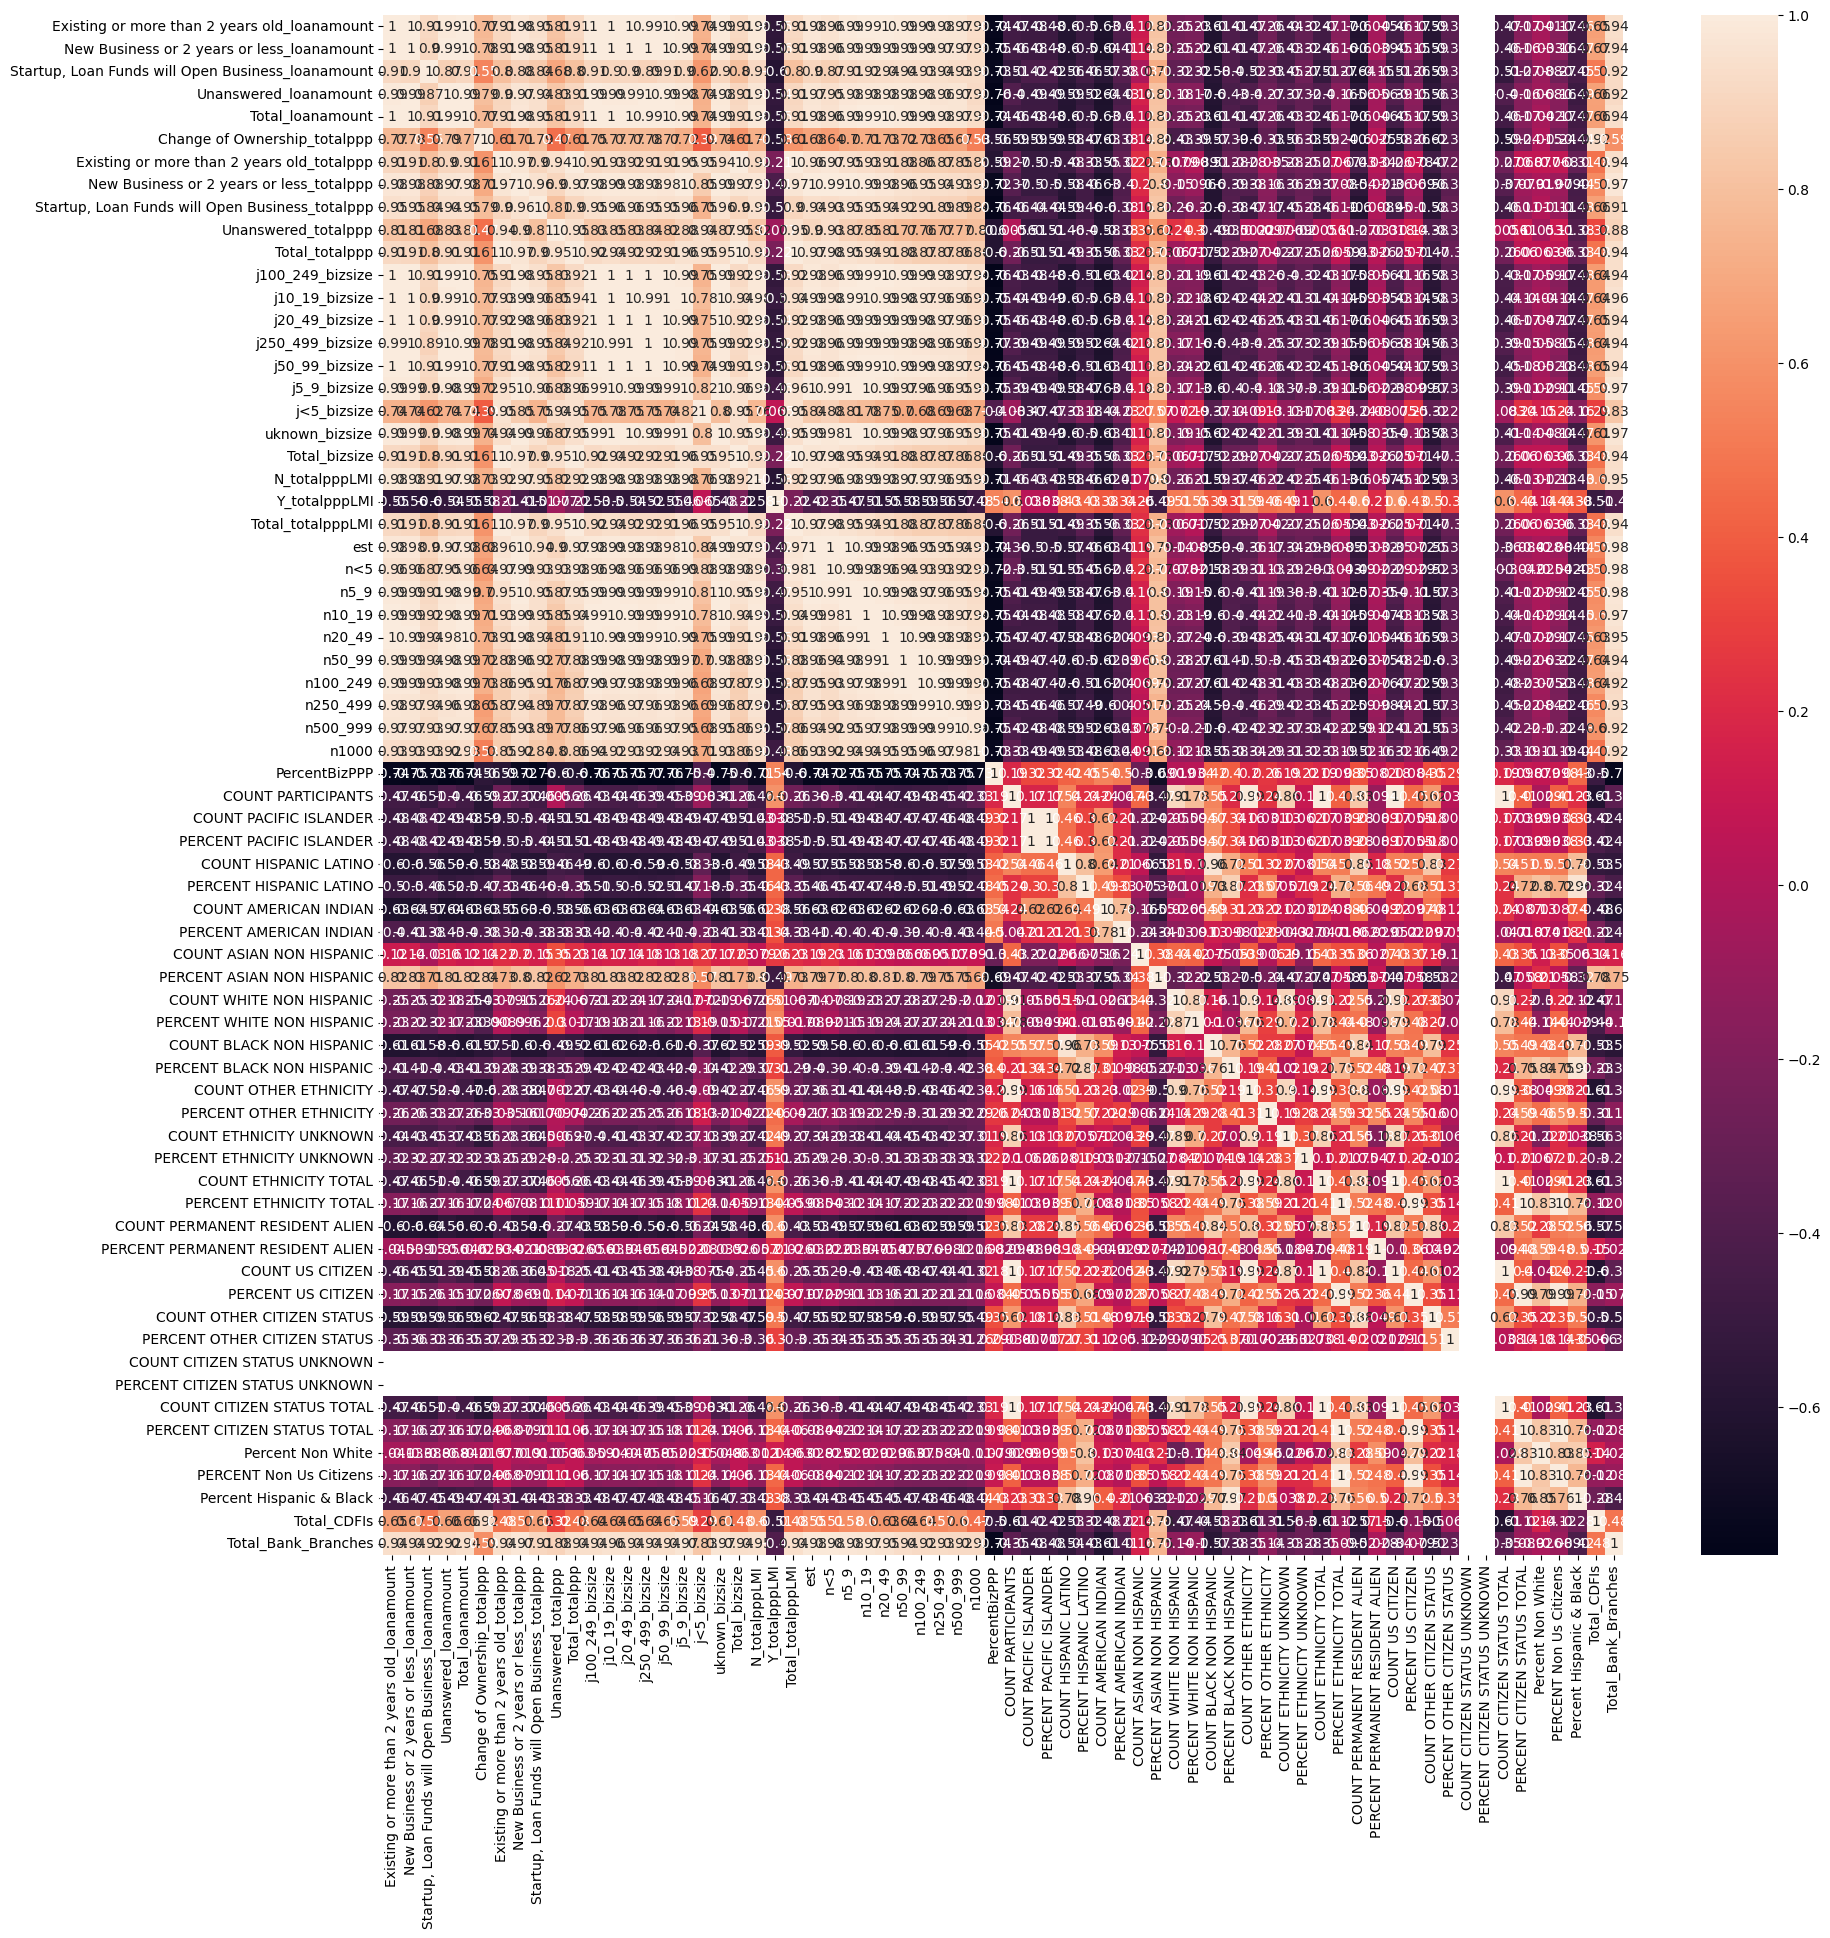

In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (20,20)

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
all_ppp_NYC_by_zip_merged_high_BLK_Latin.columns

Index(['ZipCode', 'Change of Ownership_loanamount',
       'Existing or more than 2 years old_loanamount',
       'New Business or 2 years or less_loanamount',
       'Startup, Loan Funds will Open Business_loanamount',
       'Unanswered_loanamount', 'Total_loanamount',
       'Change of Ownership_totalppp',
       'Existing or more than 2 years old_totalppp',
       'New Business or 2 years or less_totalppp',
       'Startup, Loan Funds will Open Business_totalppp',
       'Unanswered_totalppp', 'Total_totalppp', 'j100_249_bizsize',
       'j10_19_bizsize', 'j20_49_bizsize', 'j250_499_bizsize',
       'j50_99_bizsize', 'j5_9_bizsize', 'j<5_bizsize', 'uknown_bizsize',
       'Total_bizsize', 'N_totalpppLMI', 'Y_totalpppLMI', 'Total_totalpppLMI',
       'est', 'n<5', 'n5_9', 'n10_19', 'n20_49', 'n50_99', 'n100_249',
       'n250_499', 'n500_999', 'n1000', 'PercentBizPPP', 'COUNT PARTICIPANTS',
       'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have loaded the data into a DataFrame called 'df'

# Selecting the relevant columns for the regression
cols_to_include = [
    'PERCENT Non Us Citizens',
    'Percent Non White',
    'Total_CDFIs',
    'Total_Bank_Branches',
    'Total_totalppp',
    'Total_loanamount',
    'j100_249_bizsize','j10_19_bizsize', 'j20_49_bizsize', 'j250_499_bizsize',
       'j50_99_bizsize', 'j5_9_bizsize', 'j<5_bizsize', 'uknown_bizsize',
       'N_totalpppLMI', 'Y_totalpppLMI',
    'PercentBizPPP', 'Percent Hispanic & Black','0_totalpppbylargebanks',
       '1_totalpppbylargebanks'
]

# Dropping any rows with missing values in the selected columns
df_reg_3 = all_ppp_NYC_by_zip_merged_high_BLK_Latin[cols_to_include].dropna()

# Define the dependent variable and the independent variables
Y = df_reg_3['PercentBizPPP']
X = df_reg_3[['PERCENT Non Us Citizens', 'Percent Hispanic & Black', 'Total_CDFIs', 'Total_Bank_Branches','Y_totalpppLMI','N_totalpppLMI','0_totalpppbylargebanks',
       '1_totalpppbylargebanks']]

# Adding a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Performing the OLS regression
model_3 = sm.OLS(Y, X).fit()

# Printing the summary of the regression results
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:          PercentBizPPP   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.01e-06
Time:                        02:26:21   Log-Likelihood:                 42.284
No. Observations:                  27   AIC:                            -68.57
Df Residuals:                      19   BIC:                            -58.20
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have loaded the data into a DataFrame called 'df'

# Selecting the relevant columns for the regression
cols_to_include = [
    'PERCENT Non Us Citizens',
    'Percent Non White',
    'Total_CDFIs',
    'Total_Bank_Branches',
    'Total_totalppp',
    'Total_loanamount',
    'j100_249_bizsize','j10_19_bizsize', 'j20_49_bizsize', 'j250_499_bizsize',
       'j50_99_bizsize', 'j5_9_bizsize', 'j<5_bizsize', 'uknown_bizsize',
       'N_totalpppLMI', 'Y_totalpppLMI',
    'PercentBizPPP', 'Percent Hispanic & Black','0_totalpppbylargebanks',
       '1_totalpppbylargebanks'
]

# Dropping any rows with missing values in the selected columns
df_reg = all_ppp_NYC_by_zip_merged[cols_to_include].dropna()

# Define the dependent variable and the independent variables
Y = df_reg['PercentBizPPP']
X = df_reg[['PERCENT Non Us Citizens', 'Percent Hispanic & Black', 'Total_CDFIs', 'Total_Bank_Branches','Y_totalpppLMI','N_totalpppLMI','0_totalpppbylargebanks',
       '1_totalpppbylargebanks']]

# Adding a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Performing the OLS regression
model_2 = sm.OLS(Y, X).fit()

# Printing the summary of the regression results
print(model_2.summary())


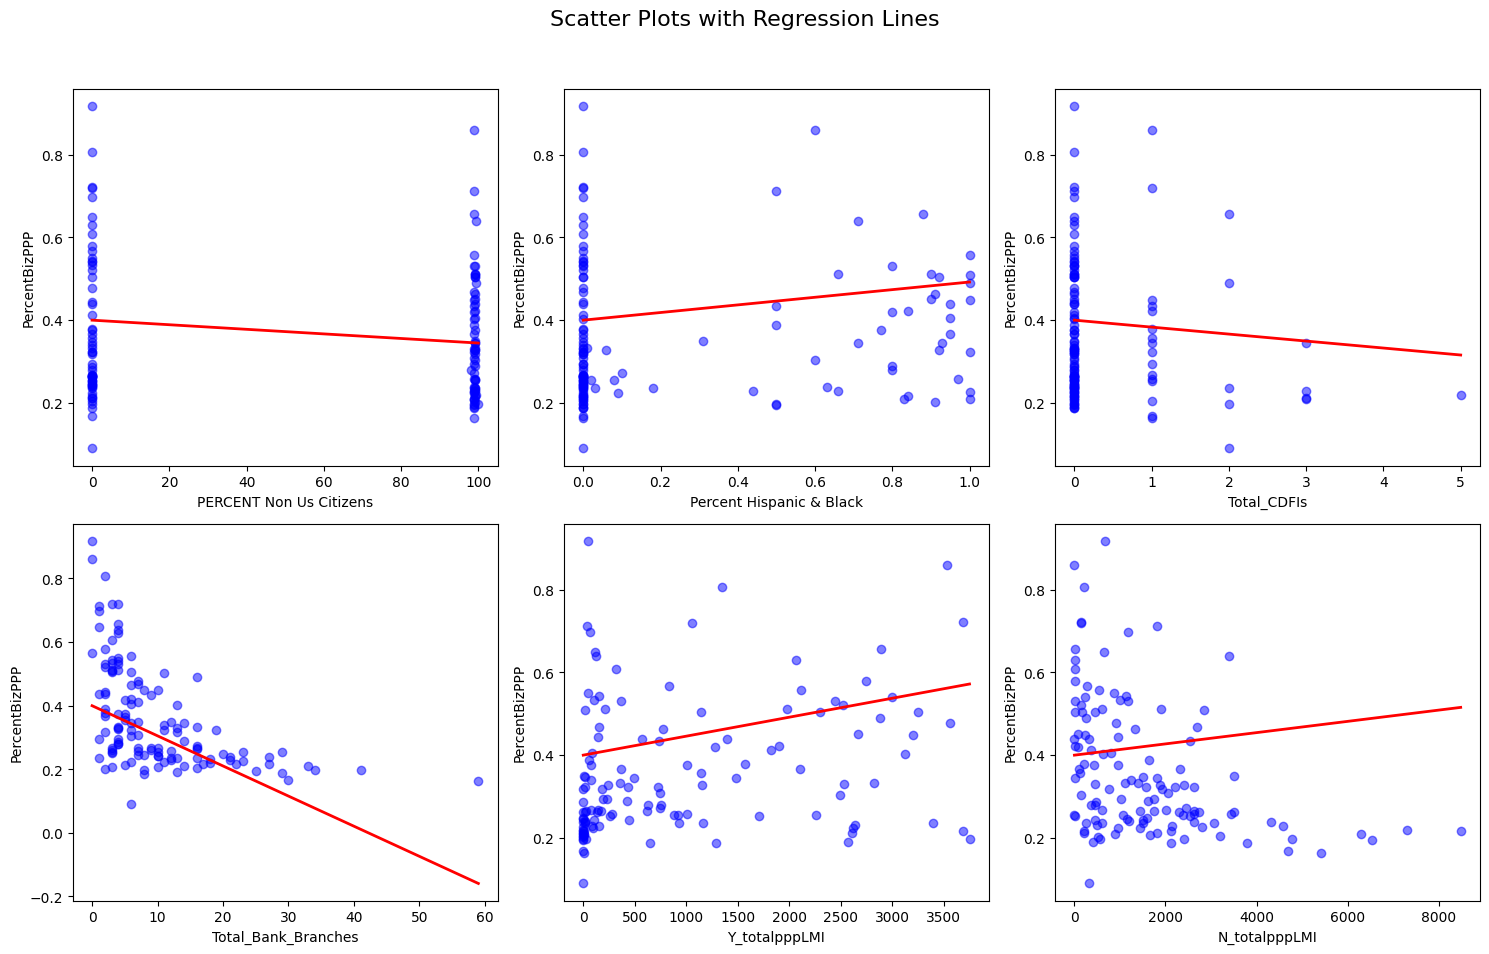

In [ ]:
# Plot scatter plot and regression line for each significant independent variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots with Regression Lines', fontsize=16)

for i, col in enumerate(X.columns[1:]):
    ax = axes[i // 3, i % 3]
    ax.scatter(X[col], Y, color='blue', alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('PercentBizPPP')

    # Plot regression line
    xs = np.linspace(X[col].min(), X[col].max(), 100)
    ys = model_2.params[col] * xs + model_2.params['const']
    ax.plot(xs, ys, color='red', linewidth=2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


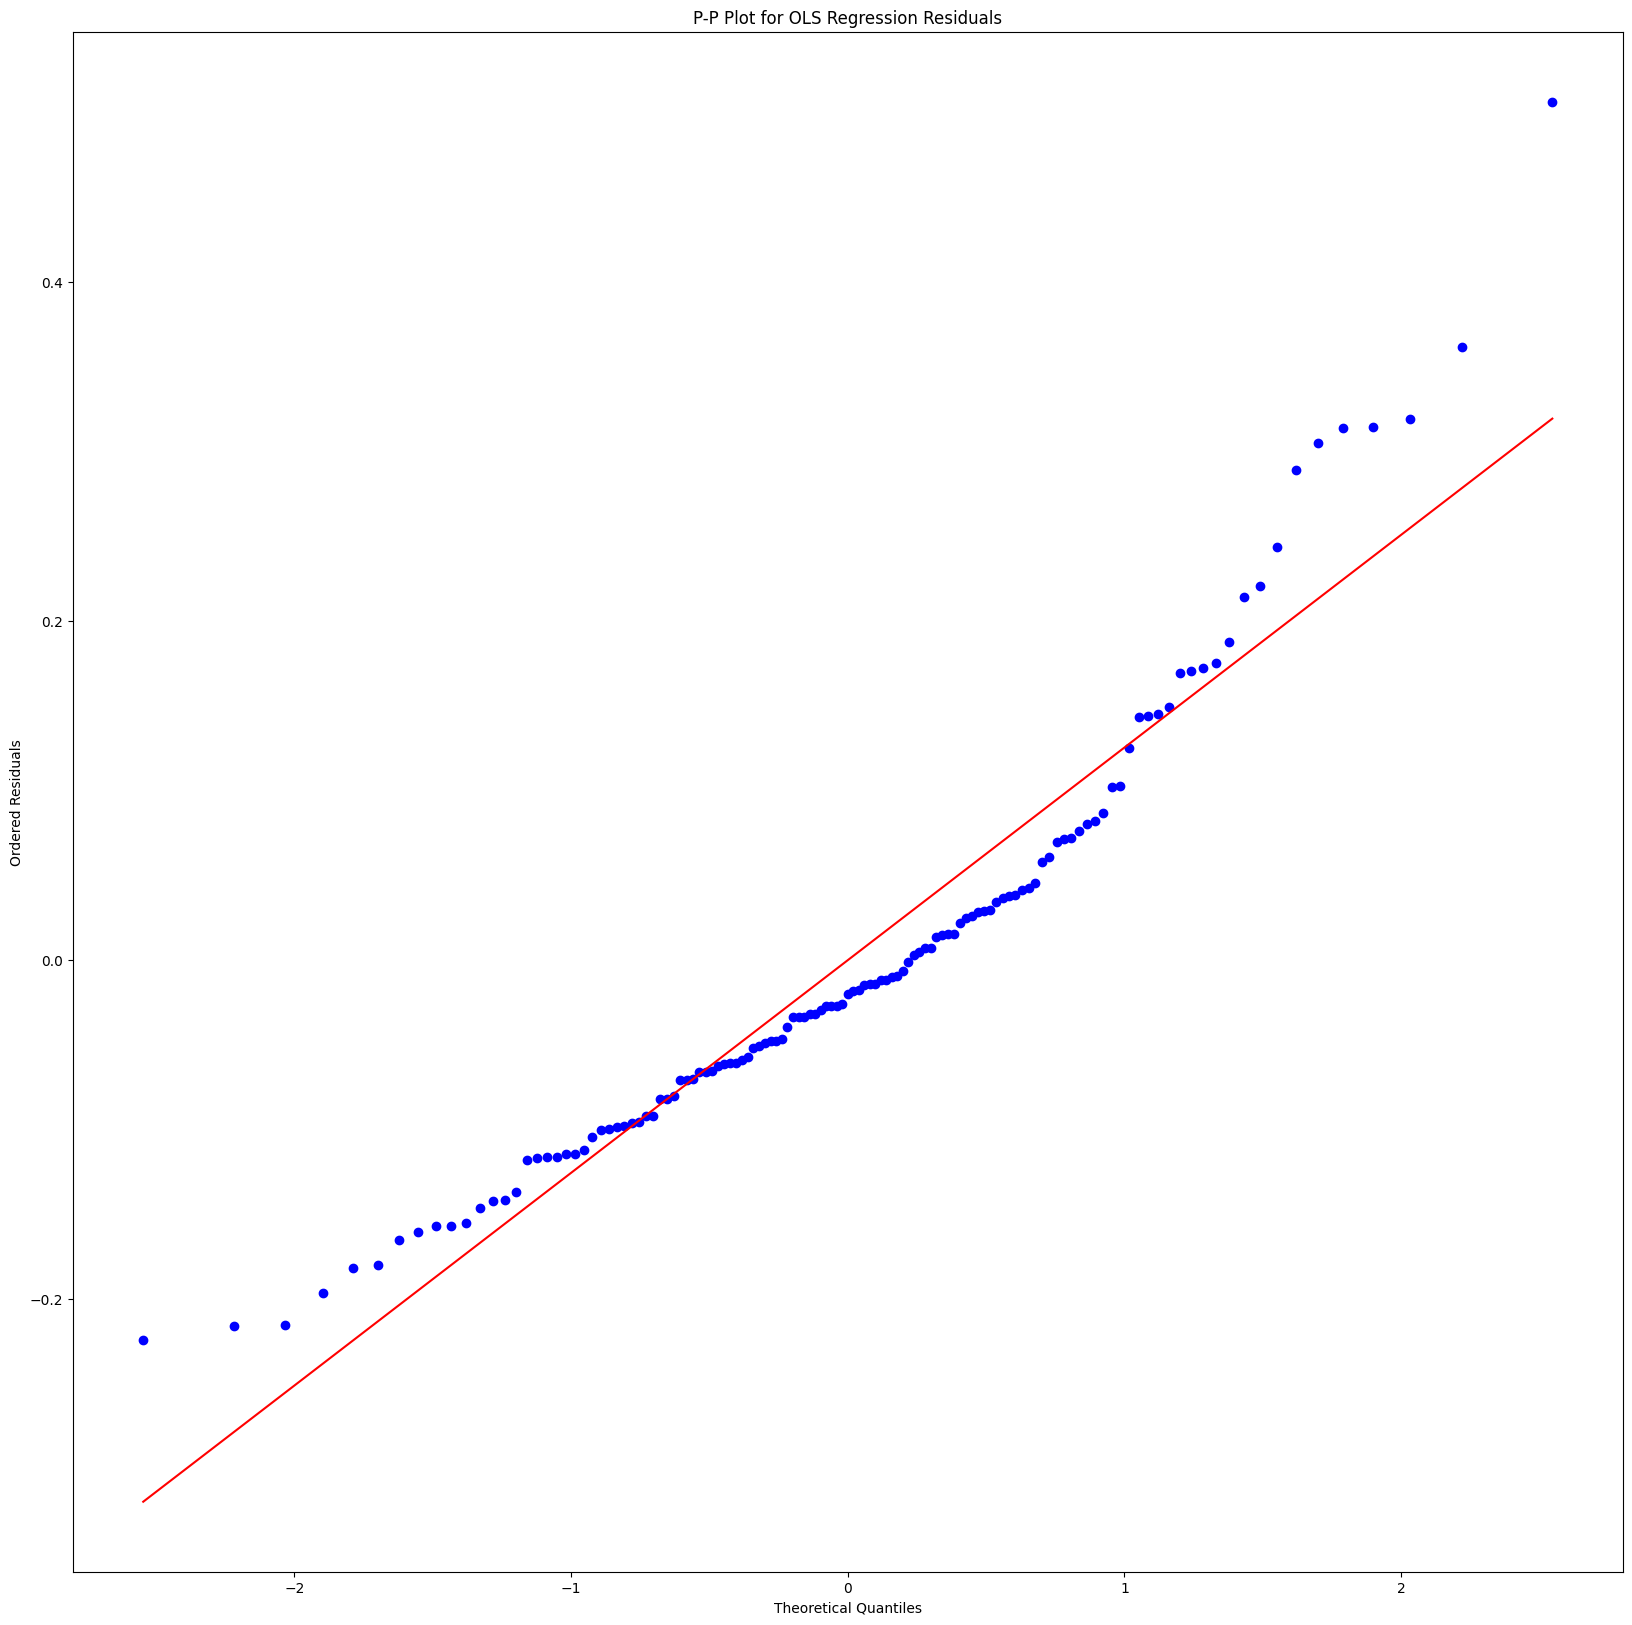

In [ ]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt


# Obtain the residuals from the model
residuals = model_2.resid

# Generate the P-P Plot
stats.probplot(residuals, dist="norm", plot=plt)

# Add title and labels
plt.title("P-P Plot for OLS Regression Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Residuals")

# Show the plot
plt.show()


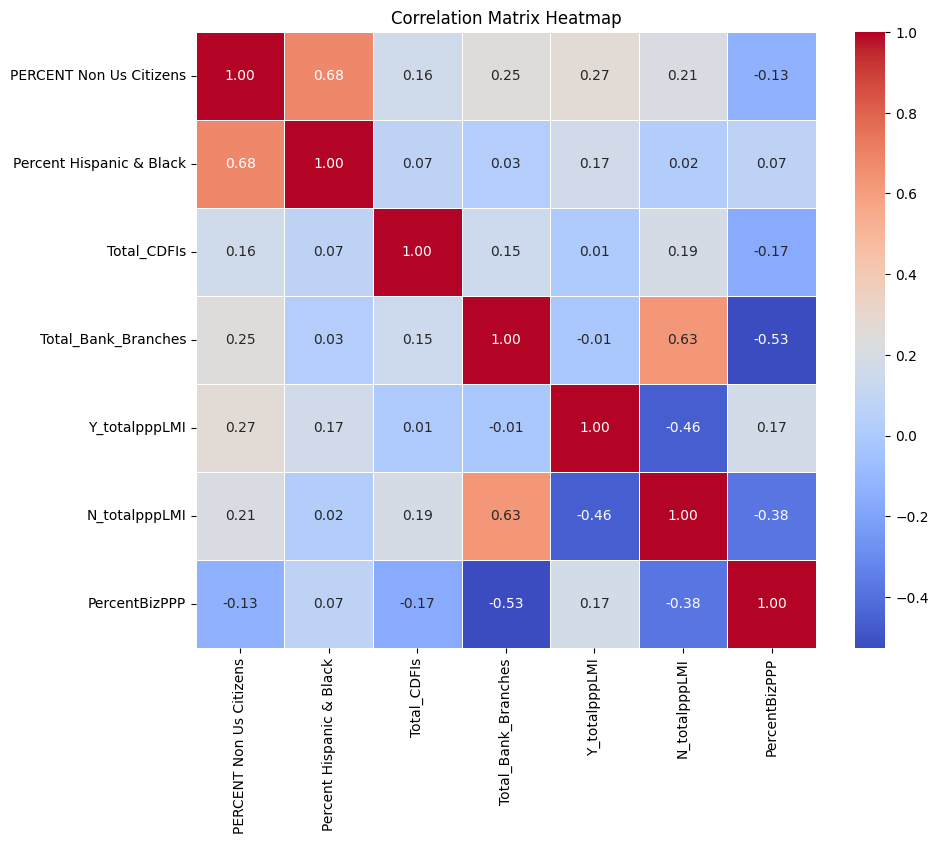

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame called 'df'

# Selecting the relevant columns for the correlation matrix
cols_to_include = [
    'PERCENT Non Us Citizens',
    'Percent Hispanic & Black',
    'Total_CDFIs',
    'Total_Bank_Branches',
    'Y_totalpppLMI',
    'N_totalpppLMI',
    'PercentBizPPP'
]

# Dropping any rows with missing values in the selected columns
df_corr = all_ppp_NYC_by_zip_merged[cols_to_include].dropna()

# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
corrMatrix = all_ppp_NYC.iloc[:,2:].corr().corr()
print (corrMatrix)

                             InitialApprovalAmount  LoanNumber  \
InitialApprovalAmount                     1.000000   -0.324914   
LoanNumber                               -0.324914    1.000000   
CurrentApprovalAmount                     0.999960   -0.324555   
UndisbursedAmount                        -0.267625   -0.216701   
LMIIndicator                             -0.502207   -0.151265   
OriginatingLenderLocationID              -0.589078   -0.071806   
NonUS_Citizen                                  NaN         NaN   

                             CurrentApprovalAmount  UndisbursedAmount  \
InitialApprovalAmount                     0.999960          -0.267625   
LoanNumber                               -0.324555          -0.216701   
CurrentApprovalAmount                     1.000000          -0.267311   
UndisbursedAmount                        -0.267311           1.000000   
LMIIndicator                             -0.502168          -0.214550   
OriginatingLenderLocationID      

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have loaded the data into a DataFrame called 'df'

# Convert 'CDFI' and 'High_Minority_NonUS_Citizen' columns to binary (0 or 1) indicators
df['CDFI_binary'] = df['CDFI'].map({'Yes': 1, 'No': 0})
df['High_Minority_NonUS_Citizen_binary'] = df['High_Minority_NonUS_Citizen'].map({'High': 1, 'Not High': 0})

# Define the dependent variable and the independent variables
Y = df['LoanAmount']
X = df[['CDFI_binary', 'High_Minority_NonUS_Citizen_binary']]

# Adding a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Performing the OLS regression
model = sm.OLS(Y, X).fit()

# Printing the summary of the regression results
print(model.summary())


NameError: ignored

In [ ]:
cdfis_minority = cdfis.loc[cdfis['Zipcode'].isin(majority_minority_zips)]
cdfis_minority.head()

In [ ]:
cdfis_Low_minority = cdfis.loc[cdfis['Zipcode'].isin(less_than_25perc_minority_zips)]
cdfis_Low_minority.head()

In [ ]:
branch_dataNY_minority = branch_dataNY.loc[branch_dataNY['ZIPBR'].isin(majority_minority_zips)]

In [ ]:
branch_dataNY_low_minority = branch_dataNY.loc[branch_dataNY['ZIPBR'].isin(less_than_25perc_minority_zips)]

In [ ]:
cdfis_minority.describe()

In [ ]:
cdfis_Low_minority.describe()

In [ ]:
all_ppp_NYC_minority = all_ppp_NYC.loc[all_ppp_NYC['BorrowerZip'].isin(majority_minority_zips)]
all_ppp_NYC_minority.describe()

In [ ]:
branch_dataNY_low_minority.describe()

In [ ]:
branch_dataNY_minority.describe()

In [ ]:
###Branch Banks and CDFIs in High Minority Zipcodes


In [ ]:
all_ppp_NYC_minority = all_ppp_NYC.loc[all_ppp_NYC['BorrowerZip'].isin(majority_minority_zips)]
all_ppp_NYC_minority.describe()

In [ ]:
all_ppp_NYC_low_minority = all_ppp_NYC.loc[all_ppp_NYC['BorrowerZip'].isin(less_than_25perc_minority_zips)]
all_ppp_NYC_low_minority.describe()

####Zipcode Shape File

In [ ]:
if not os.path.exists('Data'):
    !mkdir Data
if not os.path.exists('Data/ZIPCODE'):
    !mkdir Data/Zipcod

In [ ]:
url_zip = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'

urllib.request.urlretrieve(url_zip,'Data/ZIPCODE.zip')

('Data/ZIPCODE.zip', <http.client.HTTPMessage at 0x7b140c247af0>)

In [ ]:
import zipfile
with zipfile.ZipFile('Data/ZIPCODE.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/ZIPCODE')

In [ ]:
## zip codes map
zips = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zips.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2  POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3  POLYGON ((995908.365 183617.613, 996522.848 18...  
4  POLYGON ((991997.113 176307.496, 992042.798 17...

In [ ]:
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)

<Axes: >

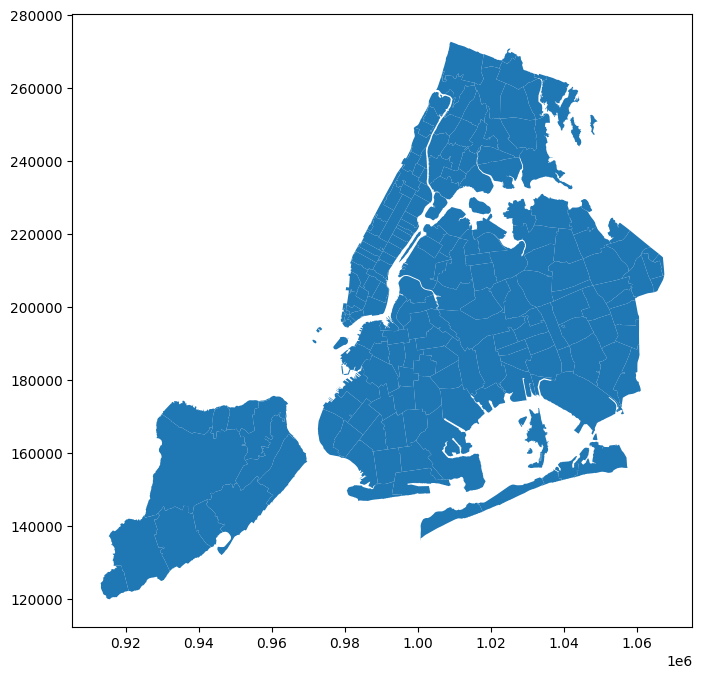

In [ ]:
zips.plot(figsize=(8,8))

In [ ]:
demographics = ['JURISDICTION NAME', 'COUNT PARTICIPANTS','COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO',
       'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN',
       'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC',
       'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC',
       'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC',
       'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY',
       'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN',
       'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN',
       'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS UNKNOWN', 'COUNT CITIZEN STATUS TOTAL',
       'PERCENT CITIZEN STATUS TOTAL']

In [ ]:
all_ppp_NYC_by_zip_merged

ZipCode  Change of Ownership_loanamount  \
0      10001                          9157.5   
1      10002                             NaN   
2      10003                       2017452.0   
3      10004                             NaN   
4      10005                             NaN   
..       ...                             ...   
201    11691                             NaN   
202    11692                          9692.5   
203    11693                             NaN   
204    11694                             NaN   
205    11697                             NaN   

     Existing or more than 2 years old_loanamount  \
0                                    1.452753e+09   
1                                    2.391930e+08   
2                                    5.301784e+08   
3                                    4.550852e+08   
4                                    3.308564e+08   
..                                            ...   
201                                  9.142563e+07   
202                                  1.996042e+07   
203                                  1.569192e+07   
204                                  2.299351e+07   
205                                  3.786390e+06   

     New Business or 2 years or less_loanamount  \
0                                   70216293.67   
1                                   16215670.90   
2                                   34610480.16   
3                                   25442442.01   
4                                   22224322.38   
..                                          ...   
201                                  3244198.79   
202                                  7068454.54   
203                                   171734.00   
204                                  1510108.08   
205                                   115000.00   

     Startup, Loan Funds will Open Business_loanamount  Unanswered_loanamount  \
0                                             526265.0            72785640.67   
1                                              21600.0             7100308.63   
2                                            1553070.0            40502331.66   
3                                            1010257.0            32835132.45   
4                                             108823.0            22302908.88   
..                                                 ...                    ...   
201                                                NaN             5056898.21   
202                                                NaN             2895851.51   
203                                                NaN              271412.50   
204                                                NaN             2648458.16   
205                                                NaN             2769916.96   

     Total_loanamount  Change of Ownership_totalppp  \
0        1.596290e+09                           1.0   
1        2.625306e+08                           NaN   
2        6.088618e+08                           2.0   
3        5.143731e+08                           NaN   
4        3.754925e+08                           NaN   
..                ...                           ...   
201      9.972672e+07                           NaN   
202      2.993442e+07                           1.0   
203      1.613507e+07                           NaN   
204      2.715207e+07                           NaN   
205      6.671307e+06                           NaN   

     Existing or more than 2 years old_totalppp  \
0                                        7556.0   
1                                        3204.0   
2                                        4216.0   
3                                        1579.0   
4                                        1404.0   
..                                          ...   
201                                      1387.0   
202                                       555.0   
203                                       265.0   
204                               

In [ ]:
jp_morgan_chase_pppamount_zip_highBLKLatin

High_BLK_Latin  BorrowerZip              0              1          Total
0                     10001            NaN  198351.766727  198351.766727
1                     10002   94408.159246            NaN   94408.159246
2                     10003  169413.049369            NaN  169413.049369
3                     10004  272917.670965            NaN  272917.670965
4                     10005  259557.451788            NaN  259557.451788
..                      ...            ...            ...            ...
197                   11691   80840.370000            NaN   80840.370000
198                   11692   53794.800000            NaN   53794.800000
199                   11693  173200.320417            NaN  173200.320417
200                   11694   92289.078261            NaN   92289.078261
201                   11697   96351.153571            NaN   96351.153571

[202 rows x 4 columns]

In [ ]:
jp_morgan_chase_pppamount_zip_highBLKLatin_shape= zips.join(jp_morgan_chase_pppamount_zip_highBLKLatin.set_index('BorrowerZip').reindex(zips['ZIPCODE'], fill_value=0), on='ZIPCODE')

<Axes: >

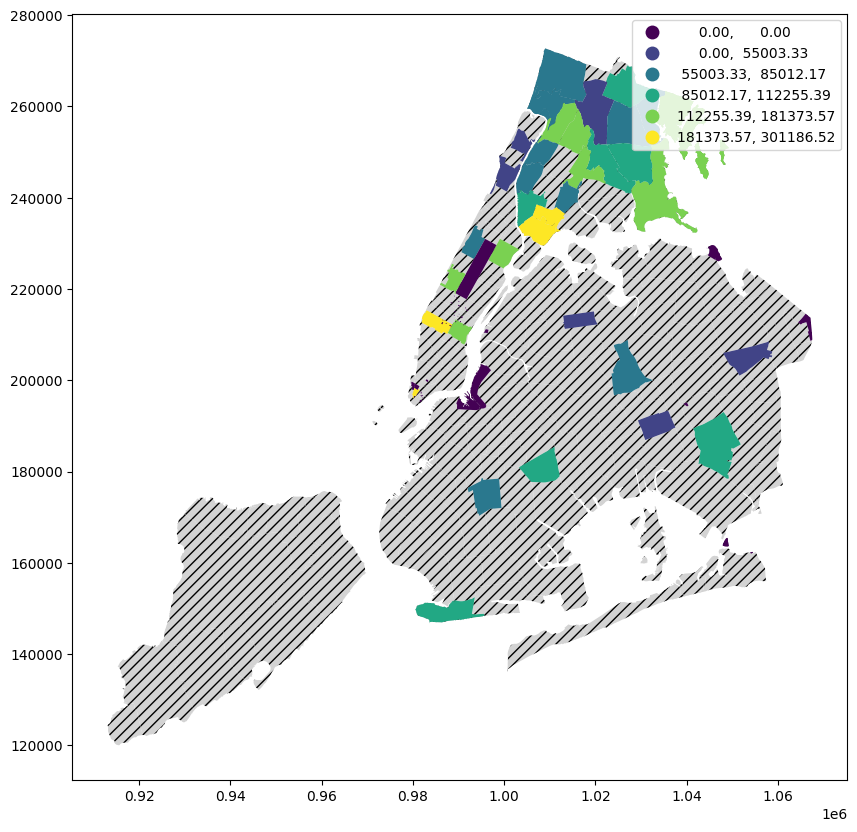

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
jp_morgan_chase_pppamount_zip_highBLKLatin_shape.plot(column=1, ax=ax, scheme='Quantiles', k=10, legend=True)

In [ ]:
zip_demographics = zip_demographics[demographics]

In [ ]:
biz_by_zip_nyc_demo_shape = zips.join(zip_demographics.set_index('JURISDICTION NAME').reindex(zips['ZIPCODE'], fill_value=0), on='ZIPCODE')
biz_by_zip_nyc_demo_shape['Percent Non White'] = biz_by_zip_nyc_demo_shape['PERCENT HISPANIC LATINO'] + biz_by_zip_nyc_demo_shape['PERCENT AMERICAN INDIAN'] + biz_by_zip_nyc_demo_shape['PERCENT ASIAN NON HISPANIC'] + biz_by_zip_nyc_demo_shape['PERCENT BLACK NON HISPANIC'] + biz_by_zip_nyc_demo_shape['PERCENT OTHER ETHNICITY']

In [ ]:
biz_by_zip_nyc_demo_shape['PERCENT Non Us Citizens'] = biz_by_zip_nyc_demo_shape['PERCENT CITIZEN STATUS TOTAL'] - biz_by_zip_nyc_demo_shape['PERCENT US CITIZEN']

In [ ]:
biz_by_zip_nyc_demo_shape_high.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'COUNT PARTICIPANTS', 'COUNT PACIFIC ISLANDER',
       'PERCENT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO',
       'PERCENT HISPANIC LATINO', 'COUNT AMERICAN INDIAN',
       'PERCENT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC',
       'PERCENT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC',
       'PERCENT WHITE NON HISPANIC', 'COUNT BLACK NON HISPANIC',
       'PERCENT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY',
       'PERCENT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN',
       'PERCENT ETHNICITY UNKNOWN', 'COUNT ETHNICITY TOTAL',
       'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN',
       'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN',
       'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS U

In [ ]:
biz_by_zip_nyc_demo_shape_high = biz_by_zip_nyc_demo_shape.loc[biz_by_zip_nyc_demo_shape['Percent Non White'] >= 0.70]
#biz_by_zip_nyc_demo_shape_high['ZIPCODE'].unique().tolist()

[11212,
 11226,
 10471,
 10466,
 10467,
 10463,
 10475,
 10464,
 10469,
 10468,
 10458,
 10462,
 10040,
 10453,
 10465,
 10461,
 10460,
 10032,
 10452,
 10456,
 10459,
 10451,
 10027,
 10455,
 10454,
 10025,
 10029,
 10023,
 11354,
 11368,
 11101,
 10018,
 10001,
 10011,
 10016,
 10003,
 10002,
 10009,
 10013,
 10007,
 10038,
 10006,
 10005,
 11201,
 11420,
 11203,
 11236,
 10306,
 11224,
 11372,
 11375,
 11427,
 11432,
 11418,
 11419,
 11434,
 11233,
 10022,
 10036]

In [ ]:
biz_by_zip_nyc_demo_shape_high['PO_NAME'].unique().tolist()

['Brooklyn',
 'Bronx',
 'New York',
 'Flushing',
 'Corona',
 'Long Island City',
 'South Ozone Park',
 'Staten Island',
 'Jackson Heights',
 'Forest Hills',
 'Queens Village',
 'Jamaica',
 'Richmond Hill',
 'South Richmond Hill']

In [ ]:
biz_by_zip_nyc_demo_shape_low = biz_by_zip_nyc_demo_shape.loc[biz_by_zip_nyc_demo_shape['Percent Non White'] <= 0.40]

In [ ]:
biz_by_zip_nyc_demo_shape_low['PO_NAME'].unique().tolist()

['Jamaica',
 'Brooklyn',
 'Bronx',
 'New York',
 'Whitestone',
 'Central Park',
 'College Point',
 'Bayside',
 'Astoria',
 'Little Neck',
 'East Elmhurst',
 'Flushing',
 'Woodside',
 'Oakland Gardens',
 'Floral Park',
 'Sunnyside',
 'Long Island City',
 'Maspeth',
 'Ridgewood',
 'Saint Albans',
 'Cambria Heights',
 'Springfield Gardens',
 'Rosedale',
 'Ozone Park',
 'Staten Island',
 'Far Rockaway',
 'Inwood',
 'Arverne',
 'Rockaway Park',
 'Breezy Point',
 'Glen Oaks',
 'New Hyde Park',
 'Bellerose',
 'Fresh Meadows',
 'Hollis',
 'Queens Village',
 'Middle Village',
 'Kew Gardens',
 'Woodhaven',
 'Elmhurst',
 'Howard Beach']

In [ ]:
biz_by_zip_nyc_demo_shape.describe()

ZIPCODE     POPULATION          AREA  SHAPE_AREA  SHAPE_LEN  \
count    307.000000     307.000000  3.070000e+02       307.0      307.0   
mean   10643.312704   29130.019544  2.914253e+07         0.0        0.0   
std      853.003889   29238.130545  4.243728e+07         0.0        0.0   
min       83.000000       0.000000  3.154825e+03         0.0        0.0   
25%    10105.500000    2187.000000  1.202708e+06         0.0        0.0   
50%    10463.000000   23477.000000  1.811842e+07         0.0        0.0   
75%    11237.500000   47292.000000  4.274008e+07         0.0        0.0   
max    11697.000000  109069.000000  4.739857e+08         0.0        0.0   

       COUNT PARTICIPANTS  COUNT PACIFIC ISLANDER  PERCENT PACIFIC ISLANDER  \
count          307.000000              307.000000                307.000000   
mean             8.211726                0.006515                  0.000130   
std             25.181254                0.080581                  0.001612   
min              0.000000                0.000000                  0.000000   
25%              0.000000                0.000000                  0.000000   
50%              0.000000                0.000000                  0.000000   
75%              2.000000                0.000000                  0.000000   
max            248.000000                1.000000                  0.020000   

       COUNT HISPANIC LATINO  PERCENT HISPANIC LATINO  ...  COUNT US CITIZEN  \
count             307.000000               307.000000  ...        307.000000   
mean                1.938111                 0.078860  ...          7.820847   
std                 6.358008                 0.182489  ...         24.308821   
min                 0.000000                 0.000000  ...          0.000000   
25%                 0.000000                 0.000000  ...          0.000000   
50%                 0.000000                 0.000000  ...          0.000000   
75%                 0.000000                 0.000000  ...          2.000000   
max                51.000000                 1.000000  ...        245.000000   

       PERCENT US CITIZEN  COUNT OTHER CITIZEN STATUS  \
count          307.000000                  307.000000   
mean             0.275961                    0.055375   
std              0.432670                    0.291820   
min              0.000000                    0.000000   
25%              0.000000                    0.000000   
50%              0.000000                    0.000000   
75%              0.895000                    0.000000   
max              1.000000                    2.000000   

       PERCENT OTHER CITIZEN STATUS  COUNT CITIZEN STATUS UNKNOWN  \
count                    307.000000                         307.0   
mean                       0.001889                           0.0   
std                        0.019344                           0.0   
min                        0.000000                           0.0   
25%                        0.000000                           0.0   
50%                        0.000000                           0.0   
75%                        0.000000                           0.0   
max                        0.330000                           0.0   

       PERCENT CITIZEN STATUS UNKNOWN  COUNT CITIZEN STATUS TOTAL  \
count                           307.0                  307.000000   
mean                              0.0                    8.211726   
std                               0.0                   25.181254   
min                               0.0                    0.000000   
25%                               0.0                    0.000000   
50%                               0.0                    0.000000   
75%                               0.0                    2.000000   
max                               0.0                  248.000000   

       PERCENT CITIZEN STATUS TOTAL  Percent Non White  \
count                    307.000000         307.000000   
mean                      29.

In [ ]:
print(len(zip_demographics) , len(zips))

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

def create_3mile_radius(shapefile_path, output_shapefile_path):
    # Load the input shapefile
    gdf = gpd.read_file(shapefile_path)

    # Create a new GeoDataFrame to store the output data
    output_gdf = gpd.GeoDataFrame(columns=gdf.columns)

    # Iterate over each row in the input GeoDataFrame
    for index, row in gdf.iterrows():
        # Get the zipcode geometry
        zipcode_geometry = row.geometry

        # Calculate the center point of the zipcode geometry
        center_point = zipcode_geometry.centroid

        # Create a 3-mile buffer around the center point
        radius_buffer = center_point.buffer(3 * 1609.34)  # 1 mile = 1609.34 meters

        # Find all zipcodes that intersect with the radius buffer
        intersecting_zipcodes = gdf[gdf.intersects(radius_buffer)]

        # Append the intersecting zipcodes to the output GeoDataFrame
        output_gdf = output_gdf.append(intersecting_zipcodes)

    # Save the output GeoDataFrame to a new shapefile
    output_gdf.to_file(output_shapefile_path, driver='ESRI Shapefile')

# Usage example
input_shapefile = './Data/ZIPCODE/ZIP_CODE_040114.shp'
output_shapefile = 'nyc_zipcodes_with_3mile_radius.shp'

create_3mile_radius(input_shapefile, output_shapefile)

In [ ]:
#nyc_zipcodes_with_3mile_radius = gpd.read_file('/content/nyc_zipcodes_with_3mile_radius.shp')
biz_by_zip_nyc_demo_shape.plot(figsize=(8,8))

In [ ]:
nyc_zipcodes_with_3mile_radius = gpd.read_file('/content/nyc_zipcodes_with_3mile_radius.shp')


In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
nyc_zipcodes_with_3mile_radius.plot(column='POPULATION', ax=ax, scheme='Quantiles', k=10, legend=True)

####Data Exploration

In [ ]:
all_ppp_NYC_by_zip_merged.columns

Index(['ZipCode', 'Change of Ownership_loanamount',
       'Existing or more than 2 years old_loanamount',
       'New Business or 2 years or less_loanamount',
       'Startup, Loan Funds will Open Business_loanamount',
       'Unanswered_loanamount', 'Total_loanamount',
       'Change of Ownership_totalppp',
       'Existing or more than 2 years old_totalppp',
       'New Business or 2 years or less_totalppp',
       'Startup, Loan Funds will Open Business_totalppp',
       'Unanswered_totalppp', 'Total_totalppp', 'j100_249_bizsize',
       'j10_19_bizsize', 'j20_49_bizsize', 'j250_499_bizsize',
       'j50_99_bizsize', 'j5_9_bizsize', 'j<5_bizsize', 'uknown_bizsize',
       'Total_bizsize', 'N_totalpppLMI', 'Y_totalpppLMI', 'Total_totalpppLMI',
       'est', 'n<5', 'n5_9', 'n10_19', 'n20_49', 'n50_99', 'n100_249',
       'n250_499', 'n500_999', 'n1000', 'PercentBizPPP', 'COUNT PARTICIPANTS',
       'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 

In [ ]:
zips

ZIPCODE BLDGZIP        PO_NAME  POPULATION          AREA STATE    COUNTY  \
0      11436       0        Jamaica     18681.0  2.269930e+07    NY    Queens   
1      11213       0       Brooklyn     62426.0  2.963100e+07    NY     Kings   
2      11212       0       Brooklyn     83866.0  4.197210e+07    NY     Kings   
3      11225       0       Brooklyn     56527.0  2.369863e+07    NY     Kings   
4      11218       0       Brooklyn     72280.0  3.686880e+07    NY     Kings   
..       ...     ...            ...         ...           ...   ...       ...   
258    10310       0  Staten Island     25003.0  5.346328e+07    NY  Richmond   
259    11693       0   Far Rockaway     11052.0  3.497516e+06    NY     Kings   
260    11249       0       Brooklyn     28481.0  1.777221e+07    NY     Kings   
261    10162       1       New York         0.0  2.103489e+04    NY  New York   
262    10119       1       New York         0.0  1.263930e+05    NY  New York   

    ST_FIPS CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0        36      081  http://www.usps.com/         0.0        0.0   
1        36      047  http://www.usps.com/         0.0        0.0   
2        36      047  http://www.usps.com/         0.0        0.0   
3        36      047  http://www.usps.com/         0.0        0.0   
4        36      047  http://www.usps.com/         0.0        0.0   
..      ...      ...                   ...         ...        ...   
258      36      085  http://www.usps.com/         0.0        0.0   
259      36      047  http://www.usps.com/         0.0        0.0   
260      36      047  http://www.usps.com/         0.0        0.0   
261      36      061  http://www.usps.com/         0.0        0.0   
262      36      061  http://www.usps.com/         0.0        0.0   

                                              geometry  
0    POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1    POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2    POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3    POLYGON ((995908.365 183617.613, 996522.848 18...  
4    POLYGON ((991997.113 176307.496, 992042.798 17...  
..                                                 ...  
258  POLYGON ((950767.507 172848.969, 950787.510 17...  
259  POLYGON ((1028453.995 167153.410, 1027813.010 ...  
260  POLYGON ((995877.318 203206.075, 995968.511 20...  
261  POLYGON ((997731.761 219560.922, 997641.948 21...  
262  POLYGON ((986038.661 213051.063, 986135.314 21...  

[263 rows x 13 columns]

In [ ]:
biz_by_zip_nyc_shape = biz_by_zip_nyc_demo_shape.join(biz_by_zip_nyc.set_index('zip').reindex(biz_by_zip_nyc_demo_shape['ZIPCODE'], fill_value=0), on='ZIPCODE')

In [ ]:
biz_by_zip_nyc_shape2 = zips.join(all_ppp_NYC_by_zip_merged.set_index('ZipCode').reindex(zips['ZIPCODE'], fill_value=0), on='ZIPCODE')

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:931: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:953: RuntimeWarning: invalid value encountered in subtract
  ycd = np.abs(yc - yc_med)


<Axes: >

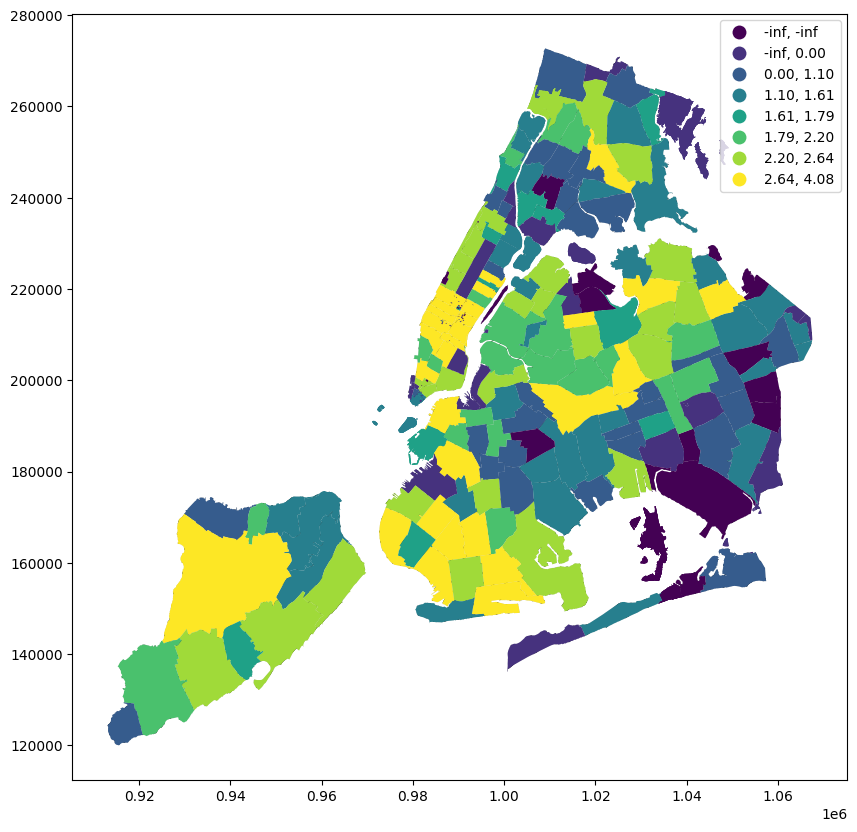

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
biz_by_zip_nyc_shape2.plot(column='Total_Bank_Branches', ax=ax, scheme='Quantiles', k=10, legend=True)

In [ ]:
len(biz_by_zip_nyc_shape2)

307

<Axes: >

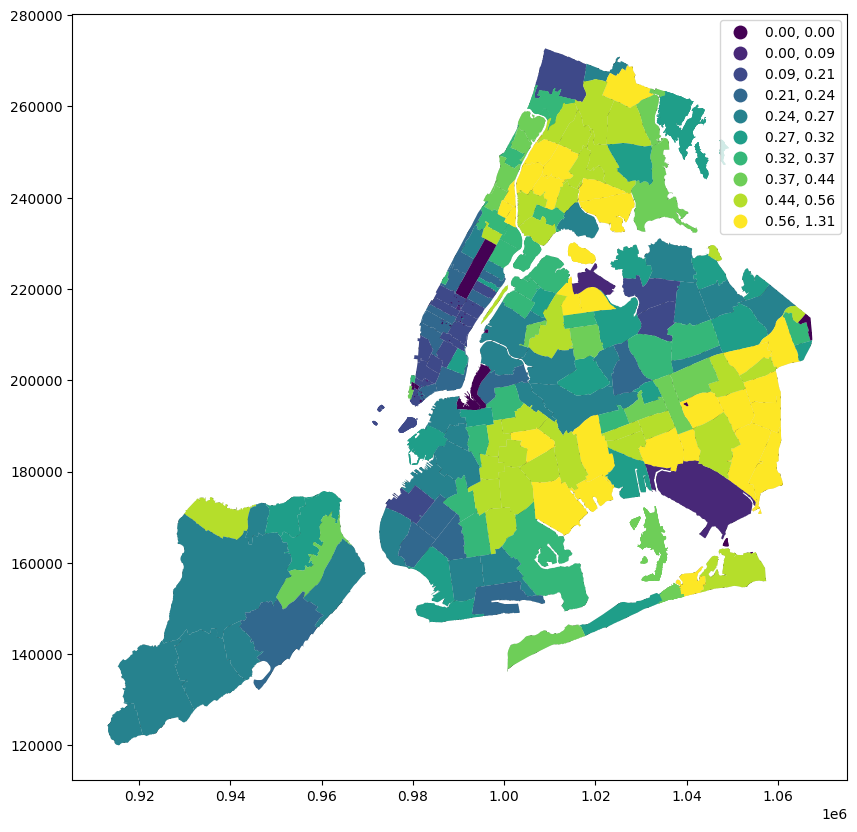

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
biz_by_zip_nyc_shape2.plot(column='PercentBizPPP', ax=ax, scheme='Quantiles', k=10, legend=True)

<Axes: >

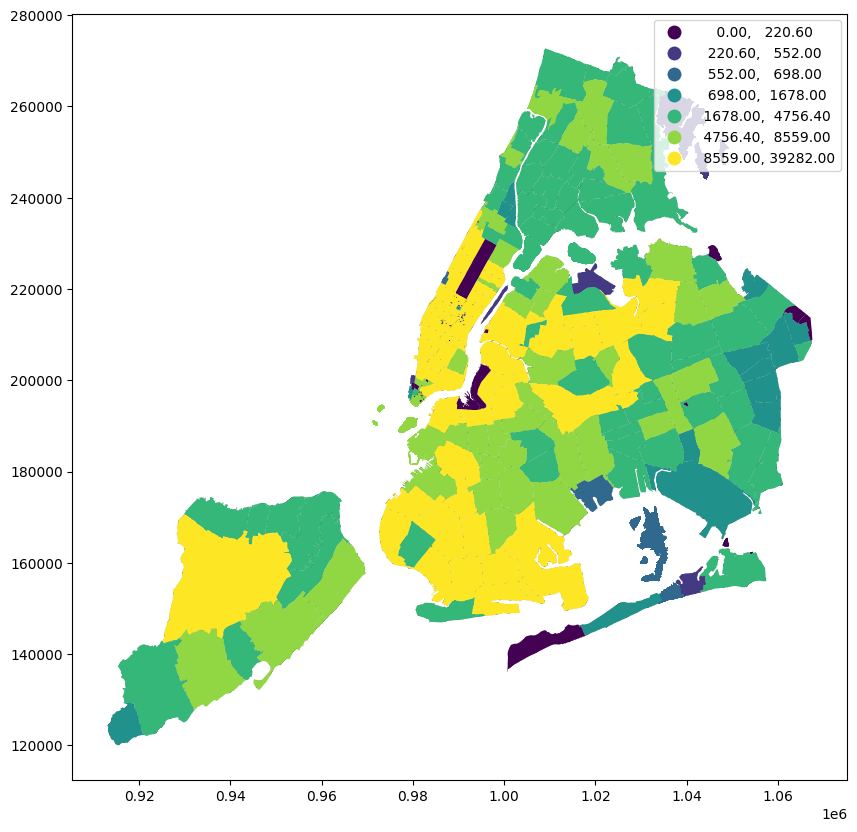

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
biz_by_zip_nyc_shape.plot(column='est', ax=ax, scheme='Quantiles', k=10, legend=True)

In [ ]:
#biz_by_zip_nyc_shape = zips.merge(biz_by_zip_nyc, left_on='ZIPCODE', right_on='zip').fillna(0)

In [ ]:
all_ppp_NYC_by_zip_shape = biz_by_zip_nyc_shape.join(all_ppp_NYC_by_zip.set_index('BorrowerZip').reindex(biz_by_zip_nyc_shape['ZIPCODE'], fill_value=0), on='ZIPCODE')

In [ ]:
all_ppp_NYC_by_zip_shape.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'COUNT PARTICIPANTS', 'COUNT PACIFIC ISLANDER',
       'PERCENT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO',
       'PERCENT HISPANIC LATINO', 'COUNT AMERICAN INDIAN',
       'PERCENT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC',
       'PERCENT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC',
       'PERCENT WHITE NON HISPANIC', 'COUNT BLACK NON HISPANIC',
       'PERCENT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY',
       'PERCENT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN',
       'PERCENT ETHNICITY UNKNOWN', 'COUNT ETHNICITY TOTAL',
       'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN',
       'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN',
       'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS U

<Axes: >

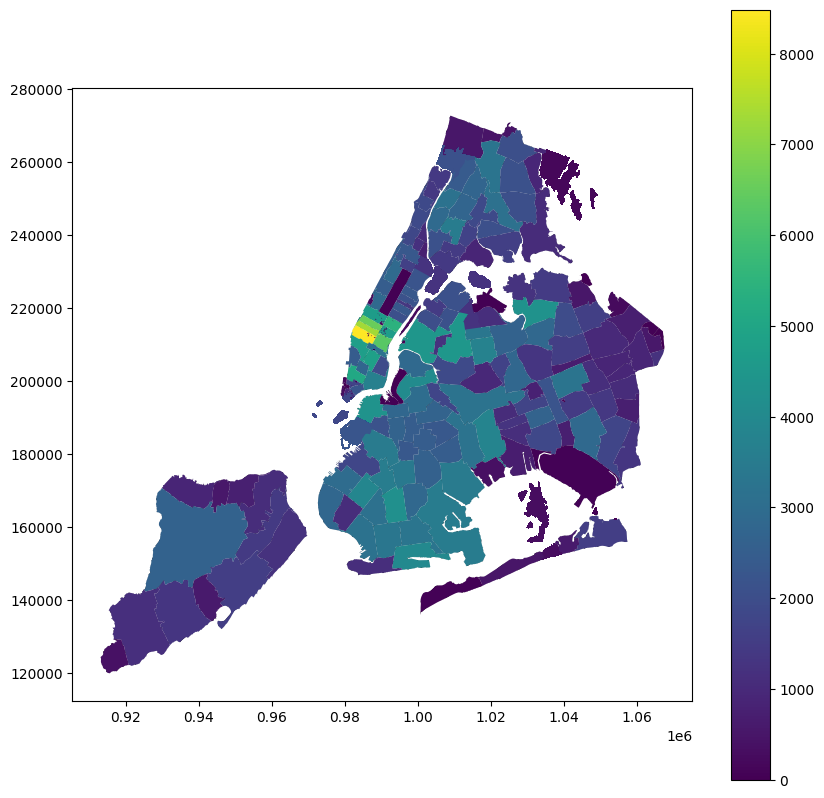

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
all_ppp_NYC_by_zip_shape.plot(column='TotalBusinesses', ax=ax, legend=True)

<Axes: >

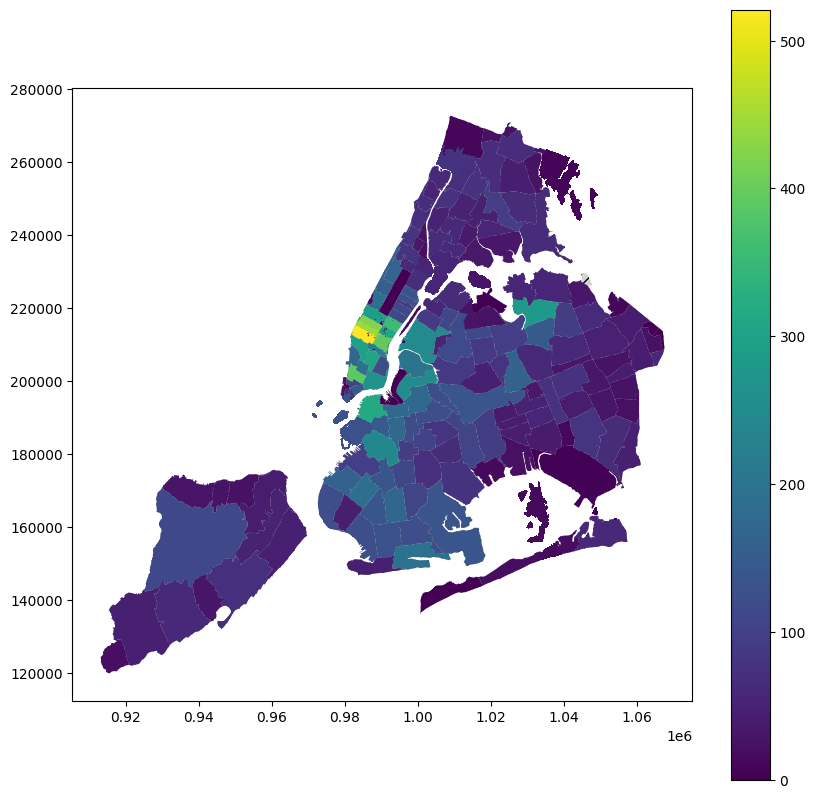

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
all_ppp_NYC_by_zip_shape.plot(column='New Business or 2 years or less', ax=ax, legend=True)

<Axes: >

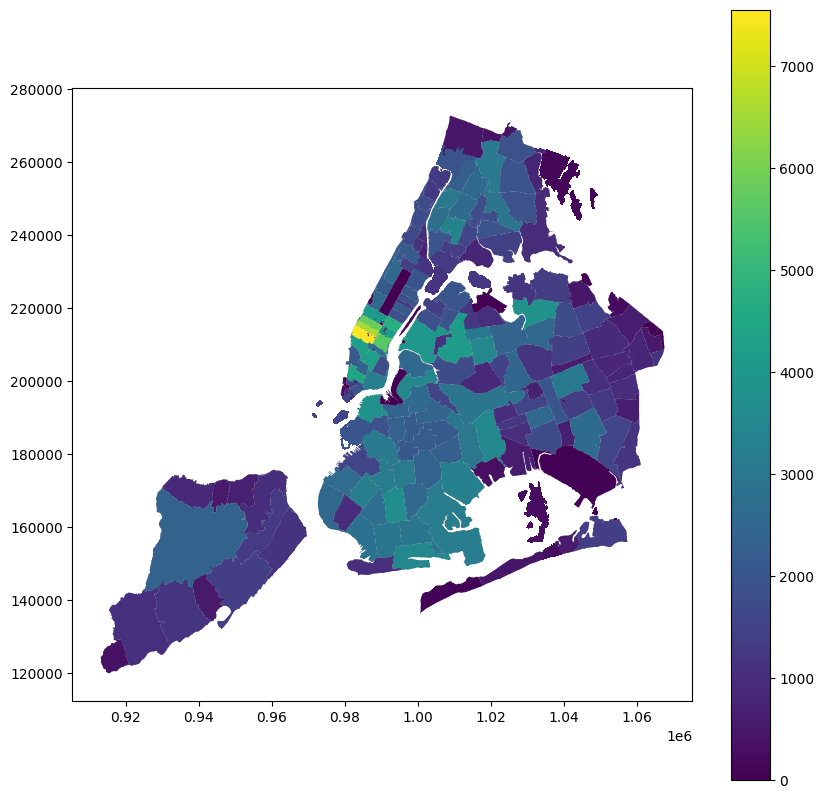

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
all_ppp_NYC_by_zip_shape.plot(column='Existing or more than 2 years old', ax=ax, legend=True)

In [ ]:
all_ppp_NYC_by_zip_shape['PercentBizPPP'] = all_ppp_NYC_by_zip_shape['TotalBusinesses']/all_ppp_NYC_by_zip_shape['est']

In [ ]:
all_ppp_NYC_by_zip_shape['PercentNewBizPPP'] = all_ppp_NYC_by_zip_shape['New Business or 2 years or less']/all_ppp_NYC_by_zip_shape['TotalBusinesses']

In [ ]:
all_ppp_NYC_by_zip_shape['PercentBizOver2PPP'] = all_ppp_NYC_by_zip_shape['Existing or more than 2 years old']/all_ppp_NYC_by_zip_shape['TotalBusinesses']

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
all_ppp_NYC_by_zip_shape.plot(column='PercentBizPPP', ax=ax, scheme='Quantiles', k=40, legend=True)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
all_ppp_NYC_by_zip_shape.plot(column='PercentNewBizPPP', ax=ax, scheme='Quantiles', legend=True)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
all_ppp_NYC_by_zip_shape.plot(column='PercentBizOver2PPP', ax=ax, scheme='Quantiles', k=10, legend=True)

In [ ]:
#cdfis_total_byzip_shape = zips.join(cdfis_total_byzip.set_index('Zipcode').reindex(zips['ZIPCODE'], fill_value=0), on='ZIPCODE')

In [ ]:
all_ppp_cdfi_NYC_by_zip_shape = all_ppp_NYC_by_zip_shape.join(cdfis_total_byzip.set_index('Zipcode').reindex(all_ppp_NYC_by_zip_shape['ZIPCODE'], fill_value=0), on='ZIPCODE')

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
cdfis_total_byzip_shape.plot(column='Total_CDFIs', ax=ax,scheme='Quantiles', k=10, legend=True)

In [ ]:
all_ppp_cdfi_NYC_by_zip_shape = all_ppp_cdfi_NYC_by_zip_shape.join(branch_dataNY_byzip.set_index('ZIPBR').reindex(all_ppp_cdfi_NYC_by_zip_shape['ZIPCODE'], fill_value=0), on='ZIPCODE')

In [ ]:
#cdfis_total_byzip_shape = cdfis_total_byzip_shape.join(branch_dataNY_byzip.set_index('ZIPBR').reindex(cdfis_total_byzip_shape['ZIPCODE'], fill_value=0), on='ZIPCODE')

In [ ]:
all_ppp_cdfi_NYC_by_zip_shape['Percent_Banks_CDFIs'] = all_ppp_cdfi_NYC_by_zip_shape['Total_CDFIs']/all_ppp_cdfi_NYC_by_zip_shape['Total_Bank_Branches']

In [ ]:
all_ppp_cdfi_NYC_by_zip_shape['PercentBizPPP'] = all_ppp_cdfi_NYC_by_zip_shape['TotalBusinesses']/all_ppp_cdfi_NYC_by_zip_shape['est']

In [ ]:
all_ppp_cdfi_NYC_by_zip_shape['PercentBizPPP','Percent_Banks_CDFIs','Total_Bank_Branches','Percent Non White','PERCENT Non Us Citizens','PercentNewBizPPP',
       'PercentBizOver2PPP'].corr()

In [ ]:
#cdfis_total_byzip_shape['Percent_Banks_CDFIs'] = cdfis_total_byzip_shape['Total_CDFIs']/cdfis_total_byzip_shape['Total_Bank_Branches']

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
cdfis_total_byzip_shape.plot(column='Total_Bank_Branches', ax=ax,scheme='Quantiles', k=10, legend=True)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
cdfis_total_byzip_shape.plot(column='Percent_Banks_CDFIs', ax=ax, scheme='Quantiles', k=20,legend=True)

In [ ]:
#cdfis_total_byzip_shape.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'Total_CDFIs', 'Total_Bank_Branches',
       'Percent_Banks_CDFIs'],
      dtype='object')

In [ ]:
#all_ppp_NYC_by_zip_shape.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'COUNT PARTICIPANTS', 'COUNT PACIFIC ISLANDER',
       'PERCENT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO',
       'PERCENT HISPANIC LATINO', 'COUNT AMERICAN INDIAN',
       'PERCENT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC',
       'PERCENT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC',
       'PERCENT WHITE NON HISPANIC', 'COUNT BLACK NON HISPANIC',
       'PERCENT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY',
       'PERCENT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN',
       'PERCENT ETHNICITY UNKNOWN', 'COUNT ETHNICITY TOTAL',
       'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN',
       'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN',
       'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS U

In [ ]:
#biz_by_zip_nyc_shape.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'COUNT PARTICIPANTS', 'COUNT PACIFIC ISLANDER',
       'PERCENT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO',
       'PERCENT HISPANIC LATINO', 'COUNT AMERICAN INDIAN',
       'PERCENT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC',
       'PERCENT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC',
       'PERCENT WHITE NON HISPANIC', 'COUNT BLACK NON HISPANIC',
       'PERCENT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY',
       'PERCENT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN',
       'PERCENT ETHNICITY UNKNOWN', 'COUNT ETHNICITY TOTAL',
       'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN',
       'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN',
       'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS U

In [ ]:
#biz_by_zip_nyc_shape['Percent_Banks_CDFIs'] = biz_by_zip_nyc_shape['Total_CDFIs']/biz_by_zip_nyc_shape['Total_Bank_Branches']

In [ ]:
#biz_by_zip_nyc_shape['PercentBizPPP'] = biz_by_zip_nyc_shape['TotalBusinesses']/biz_by_zip_nyc_shape['est']

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
biz_by_zip_nyc_shape.plot(column='est', ax=ax, scheme='Quantiles', k=10, legend=True)

<Axes: >

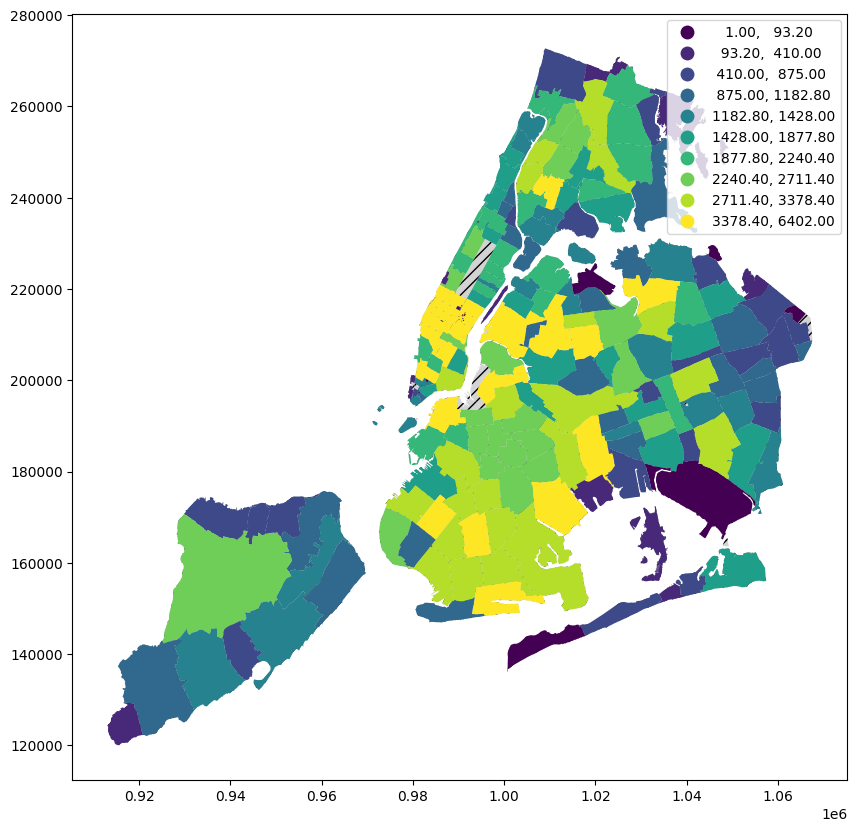

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
biz_by_zip_nyc_shape.plot(column='TotalBusiness', ax=ax, scheme='Quantiles', k=10, legend=True)

In [ ]:
biz_by_zip_nyc_shape.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'zip', 'est', 'n<5', 'n5_9', 'n10_19', 'n20_49', 'n50_99',
       'n100_249', 'n250_499', 'n500_999', 'n1000', 'BorrowerZip',
       'Change of Ownership', 'Existing or more than 2 years old',
       'New Business or 2 years or less',
       'Startup, Loan Funds will Open Business', 'Unanswered',
       'TotalBusiness'],
      dtype='object')

<Axes: >

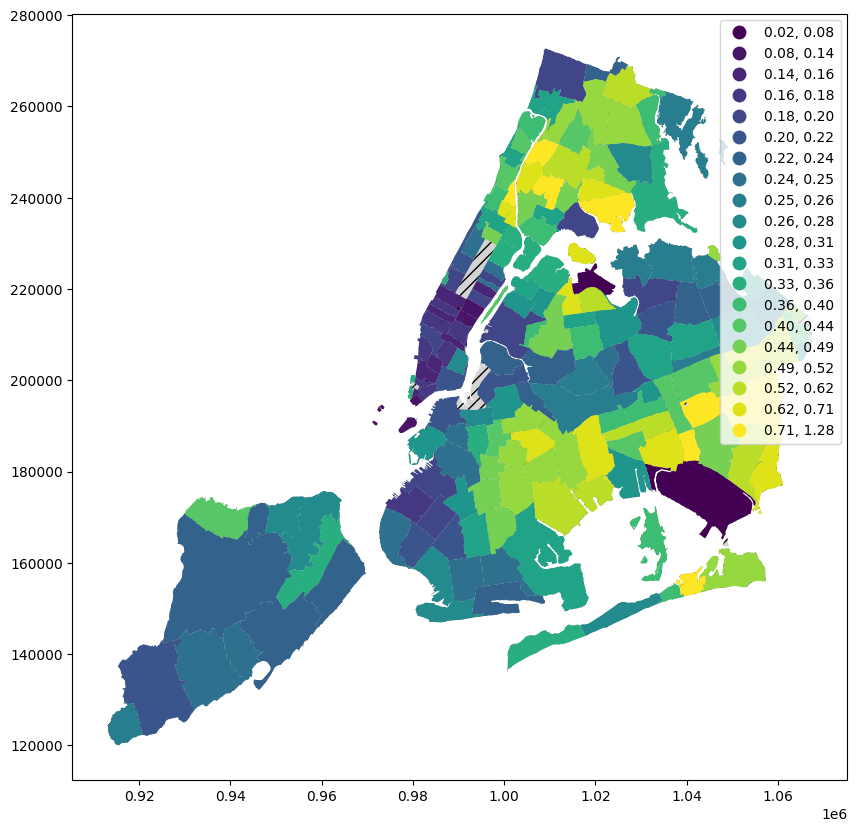

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
biz_by_zip_nyc_shape.plot(column='PercentBizPPP', ax=ax, scheme='Quantiles', k=20, legend=True)

<Axes: >

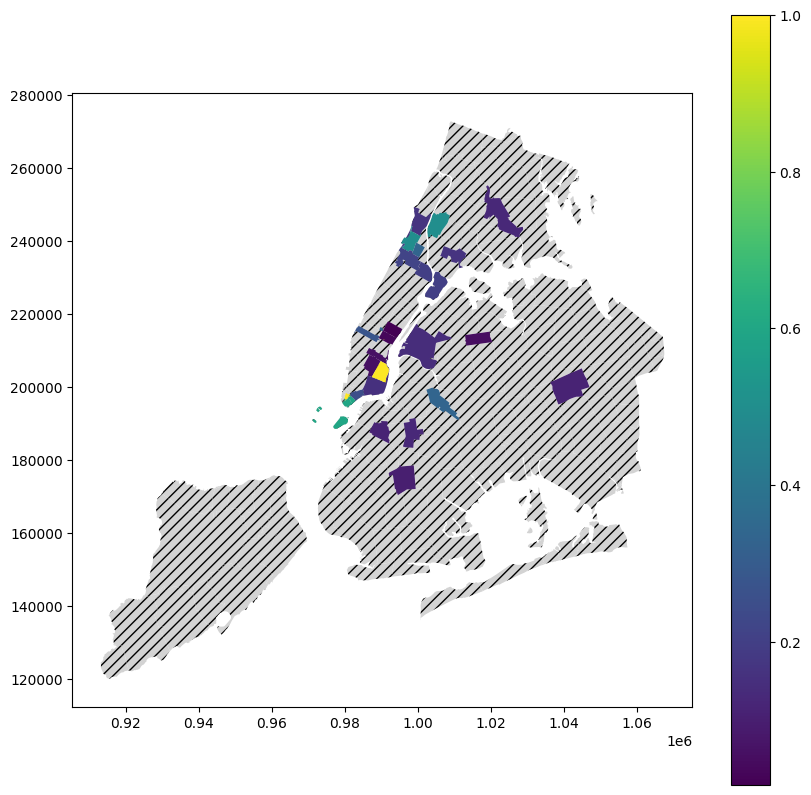

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
zips.plot(facecolor='lightgrey',hatch='///',ax=ax)
biz_by_zip_nyc_shape.plot(column='Percent_Banks_CDFIs', ax=ax,legend=True)

In [ ]:
print(public_up_to_150k_NY_230331['BusinessType'].value_counts().to_string())

Corporation                            241895
Sole Proprietorship                    223710
Limited  Liability Company(LLC)        192519
Subchapter S Corporation                90158
Independent Contractors                 72377
Self-Employed Individuals               65015
Non-Profit Organization                 15932
Partnership                             10753
Limited Liability Partnership            5364
Single Member LLC                        4995
Professional Association                 3235
Cooperative                              1808
501(c)3 – Non Profit                     1014
Housing Co-op                             394
501(c)6 – Non Profit Membership           237
Non-Profit Childcare Center               159
Joint Venture                              98
Trust                                      83
Qualified Joint-Venture (spouses)          59
Employee Stock Ownership Plan(ESOP)        36
501(c)19 – Non Profit Veterans             25
Tenant in Common                  

In [ ]:
print(public_up_to_150k_NY_230331['NAICSCode'].value_counts().to_string())

485310.0    62691
722511.0    27120
812112.0    24516
812990.0    22413
541110.0    20978
621111.0    19093
531210.0    18514
484110.0    16977
621210.0    16102
722513.0    14889
541990.0    13141
453998.0    12208
236118.0    12153
524210.0    10528
624410.0    10453
711510.0     9972
236115.0     9897
813110.0     9104
999990.0     8803
492110.0     8494
541611.0     8249
812113.0     8148
238220.0     7603
485320.0     7596
541613.0     7282
541618.0     7230
561730.0     7138
812111.0     7083
811111.0     7080
531390.0     6562
561720.0     6422
541211.0     6161
238990.0     5992
238210.0     5950
541219.0     5805
621340.0     5626
713940.0     5495
236220.0     5305
621399.0     5230
445110.0     5145
812199.0     4905
722320.0     4872
812320.0     4566
721199.0     4515
492210.0     4259
541430.0     4123
485999.0     4020
541213.0     4014
621310.0     4012
531311.0     3854
445120.0     3828
611710.0     3779
621330.0     3758
721110.0     3734
541310.0     3724
512110.0  

In [ ]:
print(public_up_to_150k_NY_230331['ServicingLenderName'].value_counts().to_string())

JPMorgan Chase Bank, National Association                                             101422
Cross River Bank                                                                       83941
TD Bank, National Association                                                          62178
Harvest Small Business Finance, LLC                                                    51851
Bank of America, National Association                                                  47941
Customers Bank                                                                         46079
Manufacturers and Traders Trust Company                                                27330
Benworth Capital                                                                       25629
Loan Source Incorporated                                                               24919
Prestamos CDFI, LLC                                                                    23183
Fountainhead SBF LLC                                                  

In [ ]:
print(public_up_to_150k_NY_230331['Race'].value_counts().to_string())

Unanswered                                   738691
White                                        102589
Asian                                         44780
Black or African American                     41728
American Indian or Alaska Native               1673
Native Hawaiian or Other Pacific Islander       638
Puerto Rican                                     22
Multi Group                                      10
Eskimo & Aleut                                    5


In [ ]:
print(public_up_to_150k_NY_230331['Ethnicity'].value_counts().to_string())

Unknown/NotStated         697719
Not Hispanic or Latino    200772
Hispanic or Latino         31645


In [ ]:
print(public_up_to_150k_NY_230331['LoanStatus'].value_counts().to_string())

Paid in Full           854106
Exemption 4             45009
Charged Off             30987
Active Un-Disbursed        34


In [ ]:
print(public_up_to_150k_NY_230331['BorrowerZip'].value_counts().to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
lending_by_zipcode = public_up_to_150k_NY_230331.groupby(['BorrowerZip'], as_index= True).agg({'BorrowerName': 'count','ForgivenessAmount': 'mean'})
lending_by_zipcode = lending_by_zipcode.reset_index()
lending_by_zipcode

BorrowerZip  BorrowerName  ForgivenessAmount
0            00885             1           11497.85
1            01427             1            9621.81
2            02134             1            4169.69
3            02701             1           22354.70
4            03801             1            2120.92
...            ...           ...                ...
357648       70803             1           25839.29
357649       85201             1           31746.90
357650       97421             1           65540.41
357651       97869             1            8582.88
357652       98857             1           16730.30

[357653 rows x 3 columns]

In [ ]:
lending_by_zipcode

In [ ]:
lm = smf.ols(formula='No Broadband (Percentage of Households)~Below poverty households (percentage)', data = income_adoption_new).fit()
income_adoption_new['predicted_nobroadband_poverty']=lm.predict()

In [ ]:
income_adoption_new.plot(x='Median_household_income',y='Home Broadband Adoption (Percentage of Households)', kind='scatter')

#####Install Packages for Section

In [ ]:
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyunpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyunpack import Archive

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
#from google.colab import files
#uploaded_2 = files.upload()

ZipCode Shape File

In [ ]:
if not os.path.exists('Data'):
    !mkdir Data
if not os.path.exists('Data/ZIPCODE'):
    !mkdir Data/Zipcode

In [ ]:
url_zip = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'

urllib.request.urlretrieve(url_zip,'Data/ZIPCODE.zip')

('Data/ZIPCODE.zip', <http.client.HTTPMessage at 0x7efd7a88e4a0>)

In [ ]:
import zipfile
with zipfile.ZipFile('Data/ZIPCODE.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/ZIPCODE')

In [ ]:
## zip codes map
zips = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zips.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2  POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3  POLYGON ((995908.365 183617.613, 996522.848 18...  
4  POLYGON ((991997.113 176307.496, 992042.798 17...

In [ ]:
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)

<Axes: >

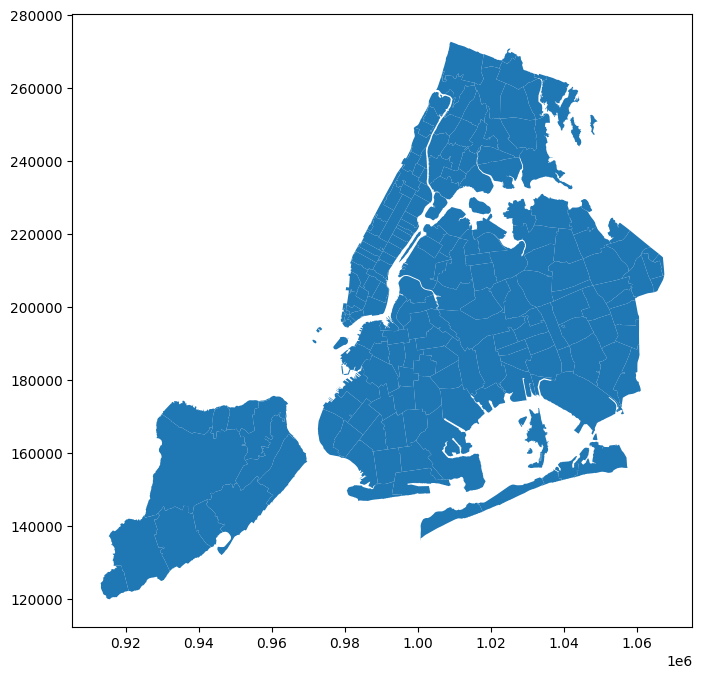

In [ ]:
zips.plot(figsize=(8,8))

In [ ]:
url_zip_nj = 'https://www2.census.gov/geo/tiger/TIGER2016/COUSUB/tl_2016_34_cousub.zip'

urllib.request.urlretrieve(url_zip,'Data/tl_2016_34_cousub.zip')

('Data/tl_2016_34_cousub.zip', <http.client.HTTPMessage at 0x7efd7a7d5e40>)

In [ ]:
import zipfile
with zipfile.ZipFile('Data/tl_2016_34_cousub.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/ZIPCODENJ')